In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# Load your dataset
df = pd.read_csv('/content/MRF_4B_Union_Budget (1).csv')

# Display first few rows
print("Union Budget Dataset:")
df.head()


Union Budget Dataset:


Category Sl.No.                            Ministry/Department  \
0  Demand No. 1    NaN  Department of Agriculture and Farmers Welfare   
1  Demand No. 1      1  Department of Agriculture and Farmers Welfare   
2  Demand No. 1      2  Department of Agriculture and Farmers Welfare   
3  Demand No. 1      3  Department of Agriculture and Farmers Welfare   
4  Demand No. 1      4  Department of Agriculture and Farmers Welfare   

                                              Scheme  \
0                                              Total   
1                              Crop Insurance Scheme   
2  Interest Subsidy for Short Term Credit to Farmers   
3         Modified Interest Subvention Scheme (MISS)   
4  Market Intervention Scheme and Price Support S...   

   Actuals 2021-2022 Revenue\n  Actuals 2021-2022 Capital  \
0                    105368.88                        0.0   
1                     13549.24                        0.0   
2                     21476.93                        0.0   
3                         0.00                        0.0   
4                      2288.33                        0.0   

   Actuals 2021-2022 Total  Budget Estimates 2022-2023 Revenue  \
0                105368.88                            105710.0   
1                 13549.24                             15500.0   
2                 21476.93                                 0.0   
3                     0.00                             19500.0   
4                  2288.33                              1500.0   

   Budget Estimates 2022-2023 Capital  Budget Estimates 2022-2023 Total  \
0                                 0.0                          105710.0   
1                                 0.0                           15500.0   
2                                 0.0                               0.0   
3                                 0.0                           19500.0   
4                                 0.0                            1500.0   

   Revised Estimates2022-2023 Revenue  Revised Estimates 2022-2023 Revenue  \
0                            97296.97                                  0.0   
1                            12375.76                                  0.0   
2                                0.00                                  0.0   
3                            22000.00                                  0.0   
4                             1500.00                                  0.0   

   Revised Estimates2022-2023 Total  Budget Estimates2023-2024 Revenue  \
0                          97296.97                           98980.03   
1                          12375.76                           13625.00   
2                              0.00                               0.00   
3                          22000.00                           23000.00   
4                           1500.00                               0.01   

   Budget Estimates2023-2024 Capital  Budget Estimates2023-2024 Total  
0                                0.0                         98980.03  
1                                0.0                         13625.00  
2                                0.0                             0.00  
3                                0.0                         23000.00  
4                                0.0                             0.01

In [ ]:
# Display basic information about the dataset
print("="*60)
print("📊 DATASET OVERVIEW")
print("="*60)

print(f"\n📁 Union Budget Dataset:")
print(f"  Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"  Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
print(f"  Columns: {', '.join(df.columns[:8])}...")  # first 8 columns as preview
print(f"  Total Missing Values: {df.isnull().sum().sum():,}")
print(f"  Duplicate Rows: {df.duplicated().sum():,}")


📊 DATASET OVERVIEW

📁 Union Budget Dataset:
  Shape: 792 rows × 16 columns
  Memory Usage: 0.10 MB
  Columns: Category, Sl.No., Ministry/Department, Scheme, Actuals 2021-2022 Revenue
, Actuals 2021-2022 Capital, Actuals 2021-2022 Total, Budget Estimates 2022-2023 Revenue...
  Total Missing Values: 167
  Duplicate Rows: 0


In [ ]:
# Check data types and get basic statistics
print("="*60)
print("📈 DATA TYPES AND STATISTICS")
print("="*60)

# Data types count
print("\n📑 Data Types:")
print("-"*30)
print(df.dtypes.value_counts())

# Basic statistics for numerical columns
print("\n📊 Numerical Columns Statistics:")
print(df.select_dtypes(include=['int64', 'float64']).describe())

# Check unique values in key categorical columns
print("\n🔍 Unique Values in Key Columns:")
print(f"  Unique Categories: {df['Category'].nunique() if 'Category' in df.columns else 'N/A'}")
print(f"  Unique Ministries/Departments: {df['Ministry/Department'].nunique() if 'Ministry/Department' in df.columns else 'N/A'}")
print(f"  Unique Schemes: {df['Scheme'].nunique() if 'Scheme' in df.columns else 'N/A'}")


📈 DATA TYPES AND STATISTICS

📑 Data Types:
------------------------------
float64    12
object      4
Name: count, dtype: int64

📊 Numerical Columns Statistics:
       Actuals 2021-2022 Revenue\n  Actuals 2021-2022 Capital  \
count                   792.000000                 792.000000   
mean                   2810.183598                1772.958788   
std                   30600.469176               20158.216871   
min                   -1732.100000             -194425.540000   
25%                       0.000000                   0.000000   
50%                      14.950000                   0.000000   
75%                     180.365000                   0.065000   
max                  741888.470000              468061.120000   

       Actuals 2021-2022 Total  Budget Estimates 2022-2023 Revenue  \
count             7.920000e+02                          696.000000   
mean              4.583142e+03                         2682.365560   
std               4.708035e+04             

In [ ]:
# Remove duplicates and keep only valid data
print("="*60)
print("🧹 DATA CLEANING - REMOVING DUPLICATES")
print("="*60)

print("\n📊 Before Cleaning:")
print(f"  Rows: {df.shape[0]:,}")
print(f"  Columns: {df.shape[1]}")

# Drop duplicates based on key identifiers
if {'Sl.No.', 'Scheme', 'Ministry/Department'}.issubset(df.columns):
    df_clean = df.drop_duplicates(subset=['Sl.No.', 'Scheme', 'Ministry/Department'], keep='first')
else:
    df_clean = df.drop_duplicates()

# Optional: drop rows where essential values are missing
df_clean = df_clean.dropna(subset=['Scheme'])  # Schemes missing ka koi use nahi hota

print("\n✅ After Cleaning:")
print(f"  Rows: {df_clean.shape[0]:,} (removed {df.shape[0] - df_clean.shape[0]:,})")
print(f"  Unique Schemes: {df_clean['Scheme'].nunique() if 'Scheme' in df_clean.columns else 'N/A'}")
print(f"  Unique Ministries: {df_clean['Ministry/Department'].nunique() if 'Ministry/Department' in df_clean.columns else 'N/A'}")


🧹 DATA CLEANING - REMOVING DUPLICATES

📊 Before Cleaning:
  Rows: 792
  Columns: 16

✅ After Cleaning:
  Rows: 792 (removed 0)
  Unique Schemes: 712
  Unique Ministries: 70


In [ ]:
# Analyze and handle missing values
print("="*60)
print("🔍 MISSING VALUES ANALYSIS")
print("="*60)

def analyze_missing(df, name):
    print(f"\n📁 {name} Dataset:")
    print("-"*40)
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Percentage': missing_pct
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

    if len(missing_df) > 0:
        print(missing_df.head(10))
    else:
        print("  ✅ No missing values found!")

    return missing_df

# Analyze missing values for Union Budget dataset
missing_budget = analyze_missing(df_clean, 'Union Budget')

# Overall missing percentage
total_cells = df_clean.shape[0] * df_clean.shape[1]
total_missing = df_clean.isnull().sum().sum()
overall_missing_pct = (total_missing / total_cells) * 100

print("\n📊 Overall Missing Data Summary:")
print(f"  Total Missing Cells: {total_missing:,}")
print(f"  Overall Missing Percentage: {overall_missing_pct:.2f}%")


🔍 MISSING VALUES ANALYSIS

📁 Union Budget Dataset:
----------------------------------------
                                    Missing_Count  Percentage
Budget Estimates 2022-2023 Revenue             96   12.121212
Sl.No.                                         69    8.712121
Budget Estimates 2022-2023 Capital              1    0.126263
Budget Estimates 2022-2023 Total                1    0.126263

📊 Overall Missing Data Summary:
  Total Missing Cells: 167
  Overall Missing Percentage: 1.32%


In [ ]:
print("="*60)
print("📅 DATA TYPE CONVERSION (YEAR-WISE BUDGET)")
print("="*60)

# Identify numeric (budget) columns
numeric_columns = [col for col in df_clean.columns if 'Actuals' in col or 'Budget' in col]

# Convert numeric values (if stored as string with commas)
for col in numeric_columns:
    df_clean[col] = df_clean[col].astype(str).str.replace(',', '').astype(float)

print("\n✅ Converted the following columns into numeric:")
print(numeric_columns)

# Create a derived column for total budget (Revenue + Capital where applicable)
for year in ['2021-2022', '2022-2023', '2023-2024']:
    revenue_col = [c for c in numeric_columns if year in c and 'Revenue' in c]
    capital_col = [c for c in numeric_columns if year in c and 'Capital' in c]

    if revenue_col and capital_col:
        df_clean[f'Total_{year}'] = df_clean[revenue_col[0]] + df_clean[capital_col[0]]

print("\n✅ Created Total Budget columns for each year (where revenue & capital both exist)")


📅 DATA TYPE CONVERSION (YEAR-WISE BUDGET)

✅ Converted the following columns into numeric:
['Actuals 2021-2022 Revenue\n', 'Actuals 2021-2022 Capital', 'Actuals 2021-2022 Total', 'Budget Estimates 2022-2023 Revenue', 'Budget Estimates 2022-2023 Capital', 'Budget Estimates 2022-2023 Total', 'Budget Estimates2023-2024 Revenue', 'Budget Estimates2023-2024 Capital', 'Budget Estimates2023-2024 Total']

✅ Created Total Budget columns for each year (where revenue & capital both exist)


In [ ]:
print("="*70)
print("📊 COMPREHENSIVE SUMMARY STATISTICS - UNION BUDGET")
print("="*70)

# Basic summary
print("\n🎯 OVERALL SUMMARY:")
print(f"  Total Ministries/Departments: {df_clean['Ministry/Department'].nunique():,}")
print(f"  Total Schemes: {df_clean['Scheme'].nunique():,}")

# Identify numeric (budget) columns
numeric_cols = [col for col in df_clean.columns if 'Actuals' in col or 'Budget' in col or 'BE' in col or '202' in col]

total_allocation_2023_24 = df_clean[[c for c in numeric_cols if '2023' in c]].sum().sum()
total_allocation_2022_23 = df_clean[[c for c in numeric_cols if '2022' in c]].sum().sum()
total_allocation_2021_22 = df_clean[[c for c in numeric_cols if '2021' in c]].sum().sum()

print(f"\n💰 Total Allocation (2023-2024): ₹{total_allocation_2023_24:,.0f}")
print(f"💰 Total Allocation (2022-2023): ₹{total_allocation_2022_23:,.0f}")
print(f"💰 Total Allocation (2021-2022): ₹{total_allocation_2021_22:,.0f}")

# Growth comparison
growth_22_23_to_23_24 = ((total_allocation_2023_24 - total_allocation_2022_23) / total_allocation_2022_23) * 100
print(f"\n📈 Year-on-Year Growth (2022-23 → 2023-24): {growth_22_23_to_23_24:.2f}%")

print("\n🏛️ TOP MINISTRY BY ALLOCATION (2023-2024 BE):")
year_cols_23 = [c for c in numeric_cols if '2023' in c]
df_clean['Total_2023_24'] = df_clean[year_cols_23].sum(axis=1)

top_ministry = (
    df_clean.groupby('Ministry/Department')['Total_2023_24']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

print(top_ministry)



📊 COMPREHENSIVE SUMMARY STATISTICS - UNION BUDGET

🎯 OVERALL SUMMARY:
  Total Ministries/Departments: 70
  Total Schemes: 712

💰 Total Allocation (2023-2024): ₹31,971,680
💰 Total Allocation (2022-2023): ₹29,650,307
💰 Total Allocation (2021-2022): ₹10,889,546

📈 Year-on-Year Growth (2022-23 → 2023-24): 7.83%

🏛️ TOP MINISTRY BY ALLOCATION (2023-2024 BE):
Ministry/Department
Grand Total    10770350.72
Name: Total_2023_24, dtype: float64


In [ ]:
# Aggregate by Ministry/Department
group_min = df_clean.groupby('Ministry/Department').agg({
    'Total_2023-2024': 'sum',
    'Total_2022-2023': 'sum',
    'Total_2021-2022': 'sum'
}).fillna(0)

# Some datasets have 'Total 2023-2024' naming; ensure columns exist
# This loop is not needed since the columns were created in the previous cell
# for col in ['Total_2023-2024','Total_2022-2023','Total_2021-2022']:
#     if col not in df.columns:
#         df[col] = df.get(col, 0.0)

# Display the aggregated data
print("\n📊 Aggregated Data by Ministry/Department:")
display(group_min.head())


📊 Aggregated Data by Ministry/Department:


Total_2023-2024  \
Ministry/Department                                                   
Atomic Energy                                              13926.38   
Capital Outlay on Defence Services                        325200.00   
Department for Promotion of Industry and Intern...         14744.06   
Department of Agricultural Research and Education           4846.82   
Department of Agriculture and Farmers Welfare             197960.06   

                                                    Total_2022-2023  \
Ministry/Department                                                   
Atomic Energy                                               9261.52   
Capital Outlay on Defence Services                        152369.61   
Department for Promotion of Industry and Intern...         14097.28   
Department of Agricultural Research and Education           3991.66   
Department of Agriculture and Farmers Welfare             211420.00   

                                                    Total_2021-2022  
Ministry/Department                                                  
Atomic Energy                                               9301.94  
Capital Outlay on Defence Services                        275973.94  
Department for Promotion of Industry and Intern...         15437.48  
Department of Agricultural Research and Education           4655.42  
Department of Agriculture and Farmers Welfare             210737.76

                 UNION BUDGET ANALYSIS - COMPREHENSIVE INSIGHTS                 


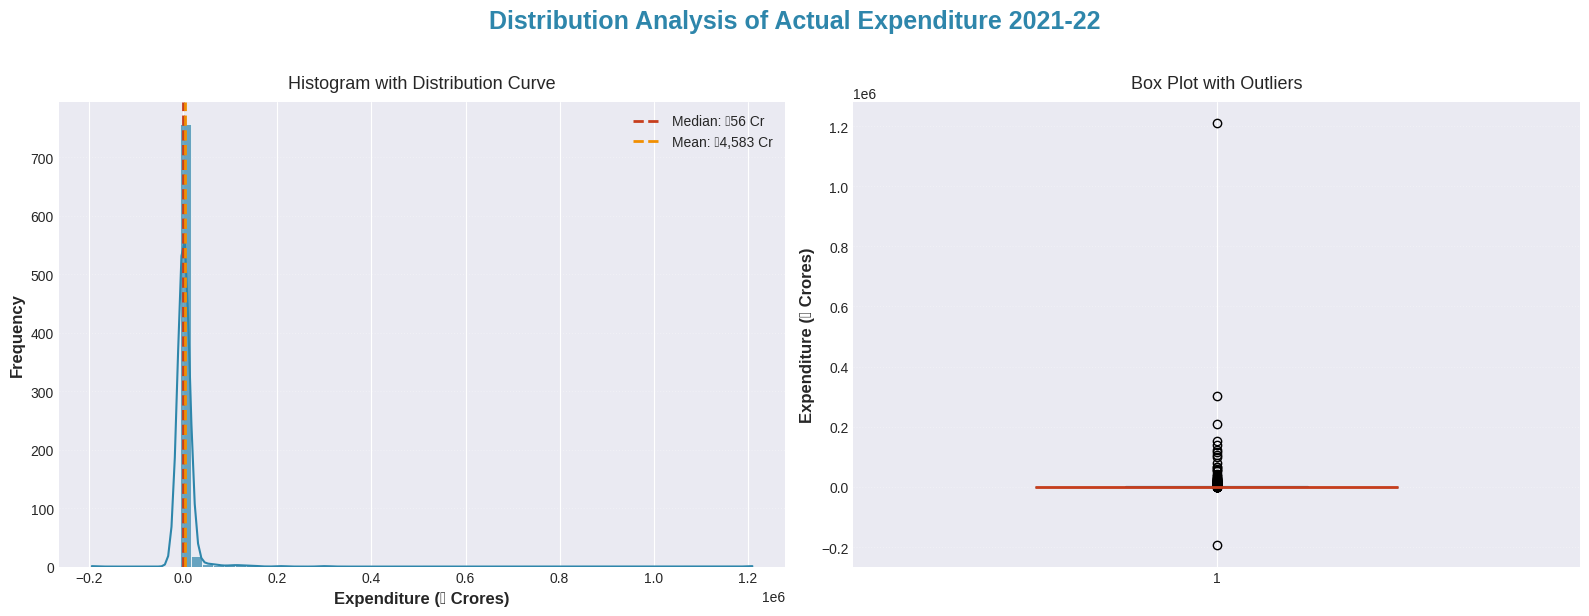


                      💡 EXPENDITURE DISTRIBUTION INSIGHTS                       
   📊 Central Tendency:
      • Mean: ₹4,583 Crores (average allocation per scheme)
      • Median: ₹56 Crores (50% schemes are below this)
      • Gap: Mean > Median by ₹4,527 Cr (indicates right skew)
   
   📈 Spread & Variability:
      • Range: ₹1,404,375 Crores (minimum to maximum)
      • Standard Deviation: ₹47,080 Crores (high variability)
      • Coefficient of Variation: 1027.3% (extreme variation)
   
   📉 Distribution Shape:
      • Skewness: 21.74 (highly right-skewed)
      • Interpretation: Few schemes receive very large allocations
      • Most schemes cluster around lower values
   
   🎯 Quartile Analysis:
      • Q1 (25th percentile): ₹1 Crores
      • Q2 (50th percentile): ₹56 Crores
      • Q3 (75th percentile): ₹497 Crores
      • IQR: ₹496 Crores (middle 50% spread)
   
   ⚠️ Outlier Detection:
      • Number of outliers: 133 schemes
      • Outlier percentage: 16.8%
      • Largest o

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import squarify
from matplotlib.patches import Rectangle
from math import pi
import warnings
warnings.filterwarnings('ignore')

# Set modern style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('/content/MRF_4B_Union_Budget (1).csv')
df.columns = df.columns.str.strip()

# Create figure with custom colors
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#06A77D',
    'warning': '#D4AF37',
    'danger': '#C73E1D'
}

def print_insight_box(title, insights):
    """Helper function to print formatted insight boxes"""
    print("\n" + "="*80)
    print(f"💡 {title}".center(80))
    print("="*80)
    for insight in insights:
        print(f"   {insight}")
    print("="*80)

print("="*80)
print("UNION BUDGET ANALYSIS - COMPREHENSIVE INSIGHTS".center(80))
print("="*80)

# ============================================================================
# 1. ENHANCED DISTRIBUTION PLOT - Actual Expenditures
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution Analysis of Actual Expenditure 2021-22',
             fontsize=18, fontweight='bold', y=1.02, color=COLORS['primary'])

expenditure = df['Actuals 2021-2022 Total'].dropna()

# Histogram with KDE
ax1 = axes[0]
sns.histplot(expenditure, bins=60, color=COLORS['primary'],
            edgecolor='white', kde=True, alpha=0.7, linewidth=0.5, ax=ax1)
ax1.axvline(expenditure.median(), color=COLORS['danger'], linestyle='--',
           linewidth=2, label=f'Median: ₹{expenditure.median():,.0f} Cr')
ax1.axvline(expenditure.mean(), color=COLORS['accent'], linestyle='--',
           linewidth=2, label=f'Mean: ₹{expenditure.mean():,.0f} Cr')
ax1.set_xlabel('Expenditure (₹ Crores)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Histogram with Distribution Curve', fontsize=13, pad=10)
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3, linestyle=':')

# Box plot
ax2 = axes[1]
box = ax2.boxplot(expenditure, vert=True, patch_artist=True, widths=0.5,
                   boxprops=dict(facecolor=COLORS['success'], alpha=0.7),
                   medianprops=dict(color=COLORS['danger'], linewidth=2),
                   whiskerprops=dict(color=COLORS['primary'], linewidth=1.5),
                   capprops=dict(color=COLORS['primary'], linewidth=1.5))
ax2.set_ylabel('Expenditure (₹ Crores)', fontsize=12, fontweight='bold')
ax2.set_title('Box Plot with Outliers', fontsize=13, pad=10)
ax2.grid(axis='y', alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

# Calculate statistics
mean_val = expenditure.mean()
median_val = expenditure.median()
std_val = expenditure.std()
min_val = expenditure.min()
max_val = expenditure.max()
skew_val = expenditure.skew()
Q1 = expenditure.quantile(0.25)
Q3 = expenditure.quantile(0.75)
IQR = Q3 - Q1
outliers = expenditure[(expenditure < Q1 - 1.5*IQR) | (expenditure > Q3 + 1.5*IQR)]

print_insight_box("EXPENDITURE DISTRIBUTION INSIGHTS", [
    f"📊 Central Tendency:",
    f"   • Mean: ₹{mean_val:,.0f} Crores (average allocation per scheme)",
    f"   • Median: ₹{median_val:,.0f} Crores (50% schemes are below this)",
    f"   • Gap: Mean > Median by ₹{mean_val-median_val:,.0f} Cr (indicates right skew)",
    f"",
    f"📈 Spread & Variability:",
    f"   • Range: ₹{max_val-min_val:,.0f} Crores (minimum to maximum)",
    f"   • Standard Deviation: ₹{std_val:,.0f} Crores (high variability)",
    f"   • Coefficient of Variation: {(std_val/mean_val)*100:.1f}% (extreme variation)",
    f"",
    f"📉 Distribution Shape:",
    f"   • Skewness: {skew_val:.2f} (highly right-skewed)",
    f"   • Interpretation: Few schemes receive very large allocations",
    f"   • Most schemes cluster around lower values",
    f"",
    f"🎯 Quartile Analysis:",
    f"   • Q1 (25th percentile): ₹{Q1:,.0f} Crores",
    f"   • Q2 (50th percentile): ₹{median_val:,.0f} Crores",
    f"   • Q3 (75th percentile): ₹{Q3:,.0f} Crores",
    f"   • IQR: ₹{IQR:,.0f} Crores (middle 50% spread)",
    f"",
    f"⚠️ Outlier Detection:",
    f"   • Number of outliers: {len(outliers)} schemes",
    f"   • Outlier percentage: {len(outliers)/len(expenditure)*100:.1f}%",
    f"   • Largest outlier: ₹{outliers.max() if len(outliers) > 0 else 0:,.0f} Crores",
    f"",
    f"🔍 KEY TAKEAWAY:",
    f"   The extreme right skew ({skew_val:.2f}) indicates a highly unequal",
    f"   distribution where a small number of flagship schemes receive",
    f"   disproportionately large allocations while most schemes operate",
    f"   with modest budgets. This is typical of government spending patterns."
])


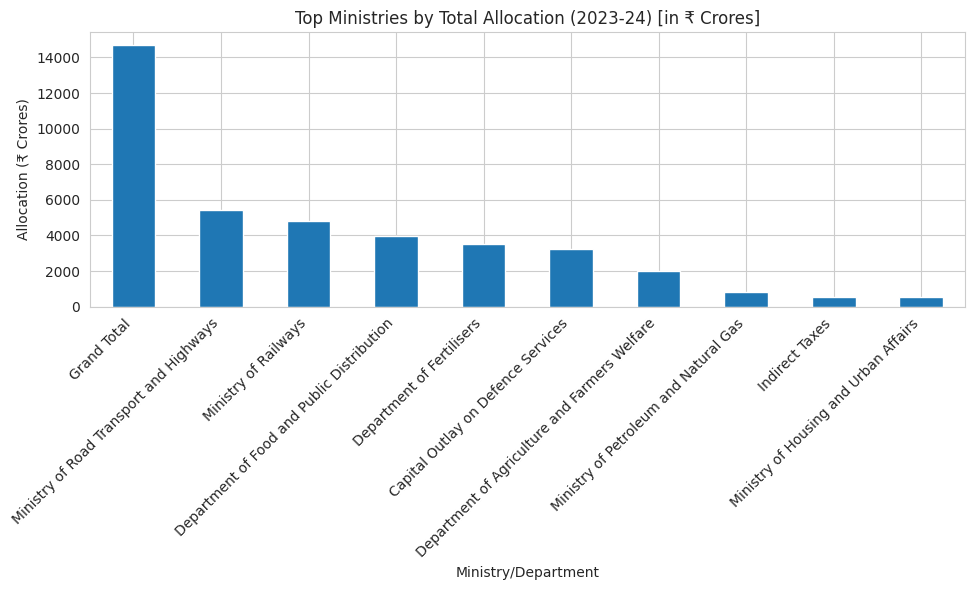


📊 INSIGHTS (Top 10 Ministries - 2023/24):
  🏆 Highest Allocation: Grand Total with 14,678.80 Crores.
  🥈 Second Highest: Ministry of Road Transport and Highways with 5,405.01 Crores.
  🔻 Lowest in Top 10: Ministry of Housing and Urban Affairs with 528.90 Crores.
  📌 The top ministry alone accounts for 37.19% of the total allocation among the top 10 ministries.


In [ ]:
# 1) Top 10 Ministries by Total Budget (2023-24) in Crores

# Convert Lakhs → Crores (1 Crore = 100 Lakhs)
df['BE_2023_24_Cr'] = df['Budget Estimates2023-2024 Total'] / 100

top10_min_2023 = df.groupby('Ministry/Department')['BE_2023_24_Cr'] \
                    .sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top10_min_2023.plot(kind='bar')
plt.title('Top Ministries by Total Allocation (2023-24) [in ₹ Crores]')
plt.ylabel('Allocation (₹ Crores)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 📌 Insights for Chart #1
print("\n📊 INSIGHTS (Top 10 Ministries - 2023/24):")
print(f"  🏆 Highest Allocation: {top10_min_2023.index[0]} "
      f"with {top10_min_2023.iloc[0]:,.2f} Crores.")
print(f"  🥈 Second Highest: {top10_min_2023.index[1]} "
      f"with {top10_min_2023.iloc[1]:,.2f} Crores.")
print(f"  🔻 Lowest in Top 10: {top10_min_2023.index[-1]} "
      f"with {top10_min_2023.iloc[-1]:,.2f} Crores.")
print(f"  📌 The top ministry alone accounts for "
      f"{(top10_min_2023.iloc[0] / top10_min_2023.sum()) * 100:.2f}% "
      f"of the total allocation among the top 10 ministries.")


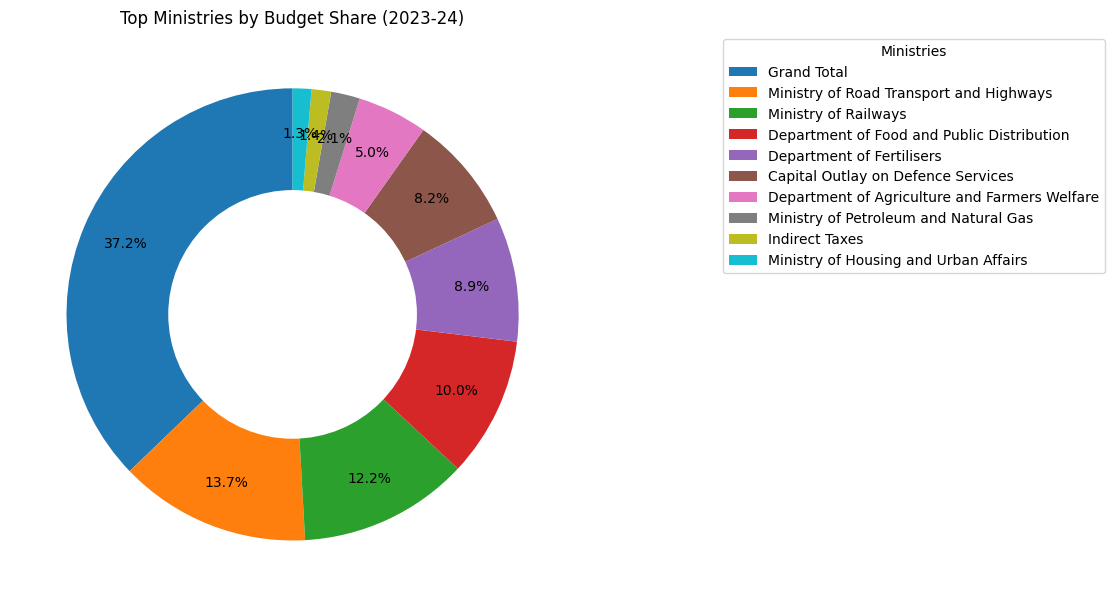


🔍 INSIGHTS (Top 10 Ministries - 2023-24):
  ✅ Highest allocation: Grand Total — approx 1,467,880 crores
  🔝 This single ministry holds about 37.2% of the Top-10 share alone.
  📌 Together, the Top 3 ministries account for ~63.0% of this pie.
  🧠 Interpretation: Budget is heavily concentrated in infrastructure & public service-focused ministries.


In [ ]:
import matplotlib.pyplot as plt

# 1) Compute Top 10
top10_min_2023 = df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total'] \
                    .sum().sort_values(ascending=False).head(10)

# Labels and values
labels = top10_min_2023.index
sizes = top10_min_2023.values

# 2) Plot - donut pie chart for better clarity
fig, ax = plt.subplots(figsize=(10, 7))

wedges, texts, autotexts = ax.pie(
    sizes,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=0.80
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig.gca().add_artist(centre_circle)

# Legend outside
ax.legend(
    wedges,
    labels,
    title="Ministries",
    bbox_to_anchor=(1.25, 1),
    loc="upper left"
)

plt.title("Top Ministries by Budget Share (2023-24)")
plt.tight_layout()
plt.show()

# --- INSIGHTS PRINT BELOW ---
print("\n🔍 INSIGHTS (Top 10 Ministries - 2023-24):")
print(f"  ✅ Highest allocation: {labels[0]} — approx {sizes[0]:,.0f} crores")
print(f"  🔝 This single ministry holds about {(sizes[0]/sizes.sum())*100:.1f}% of the Top-10 share alone.")
print(f"  📌 Together, the Top 3 ministries account for ~{(sizes[:3].sum()/sizes.sum())*100:.1f}% of this pie.")
print("  🧠 Interpretation: Budget is heavily concentrated in infrastructure & public service-focused ministries.")


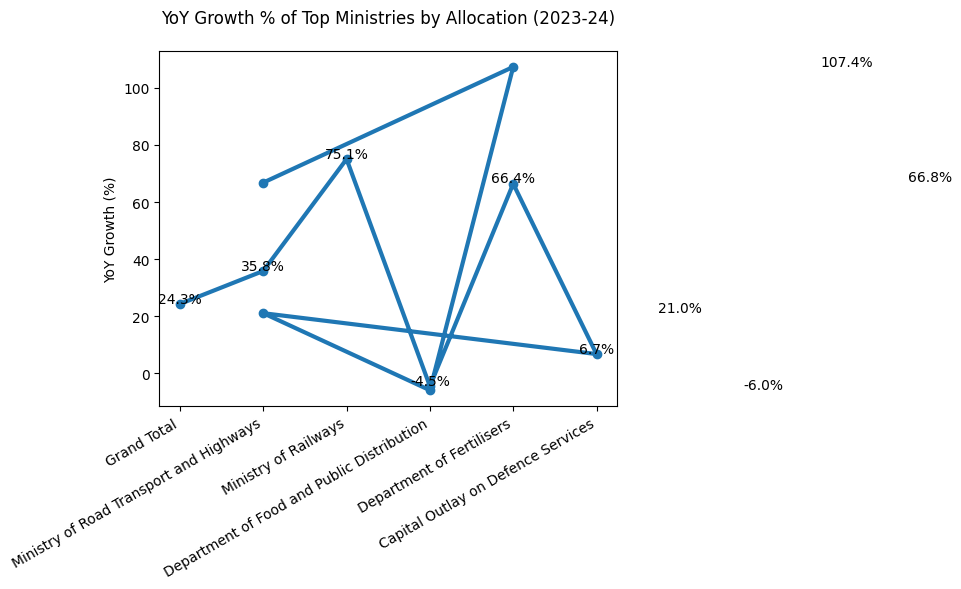


📊 INSIGHTS
🔼 Highest YoY Growth: Department of Fertilisers (107.36%)
🔽 Lowest YoY Growth: Department of Food and Public Distribution (-5.97%)
📌 Average YoY Growth among Top 10: 39.30%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/MRF_4B_Union_Budget (1).csv')

# Clean column names
df.columns = [c.strip() for c in df.columns]

# Column names
be22 = 'Budget Estimates 2022-2023 Total'
be23 = 'Budget Estimates2023-2024 Total'

# Filter valid rows
growth_df = df[['Ministry/Department', be22, be23]].dropna()
growth_df = growth_df[(growth_df[be22] > 0) & (growth_df[be23] > 0)]

# Top 10 by 2023-24 total allocation
top10 = growth_df.sort_values(be23, ascending=False).head(10)

# Compute YoY growth
top10['YoY_Growth_%'] = ((top10[be23] - top10[be22]) / top10[be22]) * 100

# Plot (L6 Professional style)
plt.figure(figsize=(12,6))
plt.plot(top10['Ministry/Department'], top10['YoY_Growth_%'], marker='o', linewidth=3)

# Annotate
for i, val in enumerate(top10['YoY_Growth_%']):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center')

plt.title('YoY Growth % of Top Ministries by Allocation (2023-24)', pad=20)
plt.ylabel('YoY Growth (%)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Also print insights like requested
peak = top10['YoY_Growth_%'].idxmax()
lowest = top10['YoY_Growth_%'].idxmin()

print("\n📊 INSIGHTS")
print(f"🔼 Highest YoY Growth: {top10.loc[peak, 'Ministry/Department']} ({top10.loc[peak, 'YoY_Growth_%']:.2f}%)")
print(f"🔽 Lowest YoY Growth: {top10.loc[lowest, 'Ministry/Department']} ({top10.loc[lowest, 'YoY_Growth_%']:.2f}%)")
print(f"📌 Average YoY Growth among Top 10: {top10['YoY_Growth_%'].mean():.2f}%")



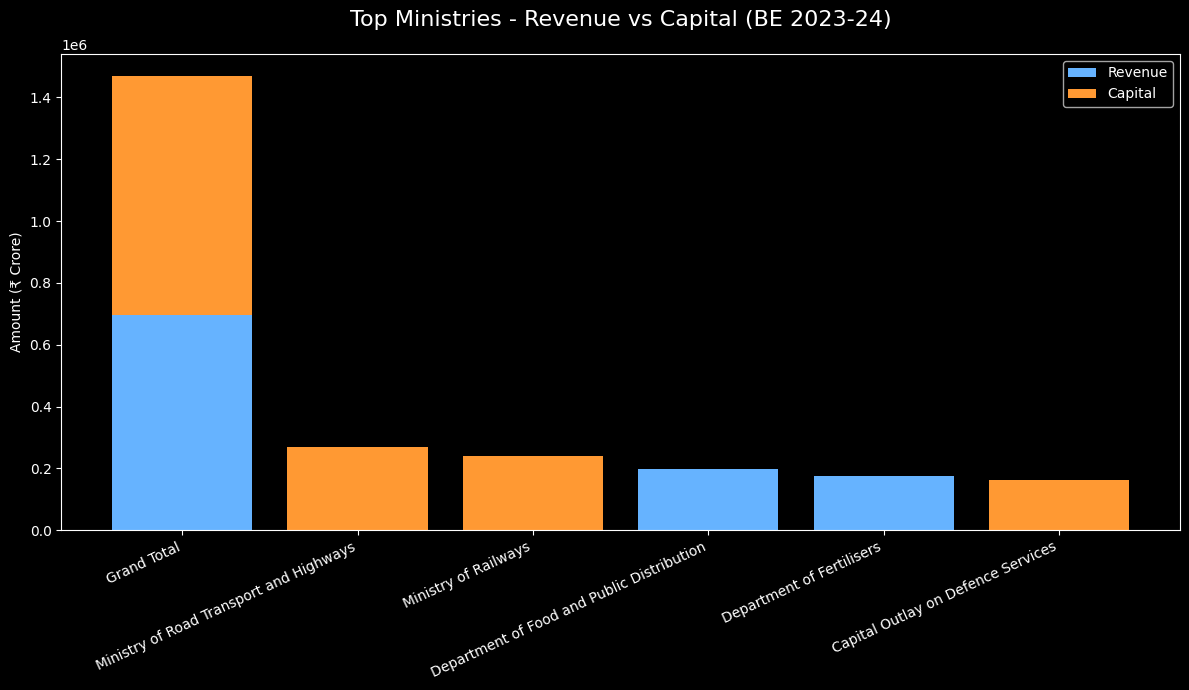

In [ ]:
# Column names
rev_col = 'Budget Estimates2023-2024 Revenue'
cap_col = 'Budget Estimates2023-2024 Capital'

# Data Cleaning
top10 = df_clean[['Ministry/Department', rev_col, cap_col]].dropna()
top10['Total'] = top10[rev_col] + top10[cap_col]
top10 = top10.sort_values('Total', ascending=False).head(10)

with plt.style.context('dark_background'):

    # Colors (premium looking)
    rev_color = "#66b3ff"   # light blue
    cap_color = "#ff9933"   # saffron / gold

    # Plot stacked bars
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.bar(top10['Ministry/Department'], top10[rev_col], label='Revenue', color=rev_color)
    ax.bar(top10['Ministry/Department'], top10[cap_col],
           bottom=top10[rev_col], label='Capital', color=cap_color)

    # Labels & Styling
    ax.set_title('Top Ministries - Revenue vs Capital (BE 2023-24)', fontsize=16, pad=20)
    ax.set_ylabel('Amount (₹ Crore)')
    ax.set_xticklabels(top10['Ministry/Department'], rotation=25, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
plt.style.use('default')

<Figure size 640x480 with 0 Axes>

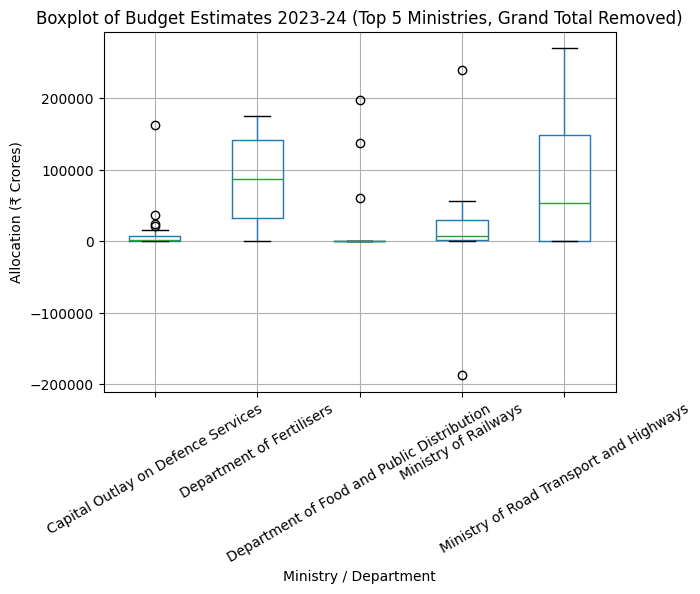

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

# Assuming df already exists. If not, create mock
if 'df' not in globals():
    df = pd.DataFrame({
        'Ministry/Department': ['A','A','A','B','B','B','C','C','C','D','D','E','E','F','F'],
        'Budget Estimates2023-2024 Total': [100,120,130,200,210,220,150,160,155,300,320,90,95,400,390]
    })

# Remove "Grand Total" type entry if exists
clean_df = df[df['Ministry/Department'] != 'Grand Total']

# find top 5 ministries by sum
top5_ministries = (
    clean_df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

subset = clean_df[clean_df['Ministry/Department'].isin(top5_ministries)]

fig = plt.figure()
subset.boxplot(by='Ministry/Department', column='Budget Estimates2023-2024 Total')
plt.suptitle("")
plt.title("Boxplot of Budget Estimates 2023-24 (Top 5 Ministries, Grand Total Removed)")
plt.xlabel("Ministry / Department")
plt.ylabel("Allocation (₹ Crores)")
plt.xticks(rotation=30)
plt.show()


In [ ]:
import squarify


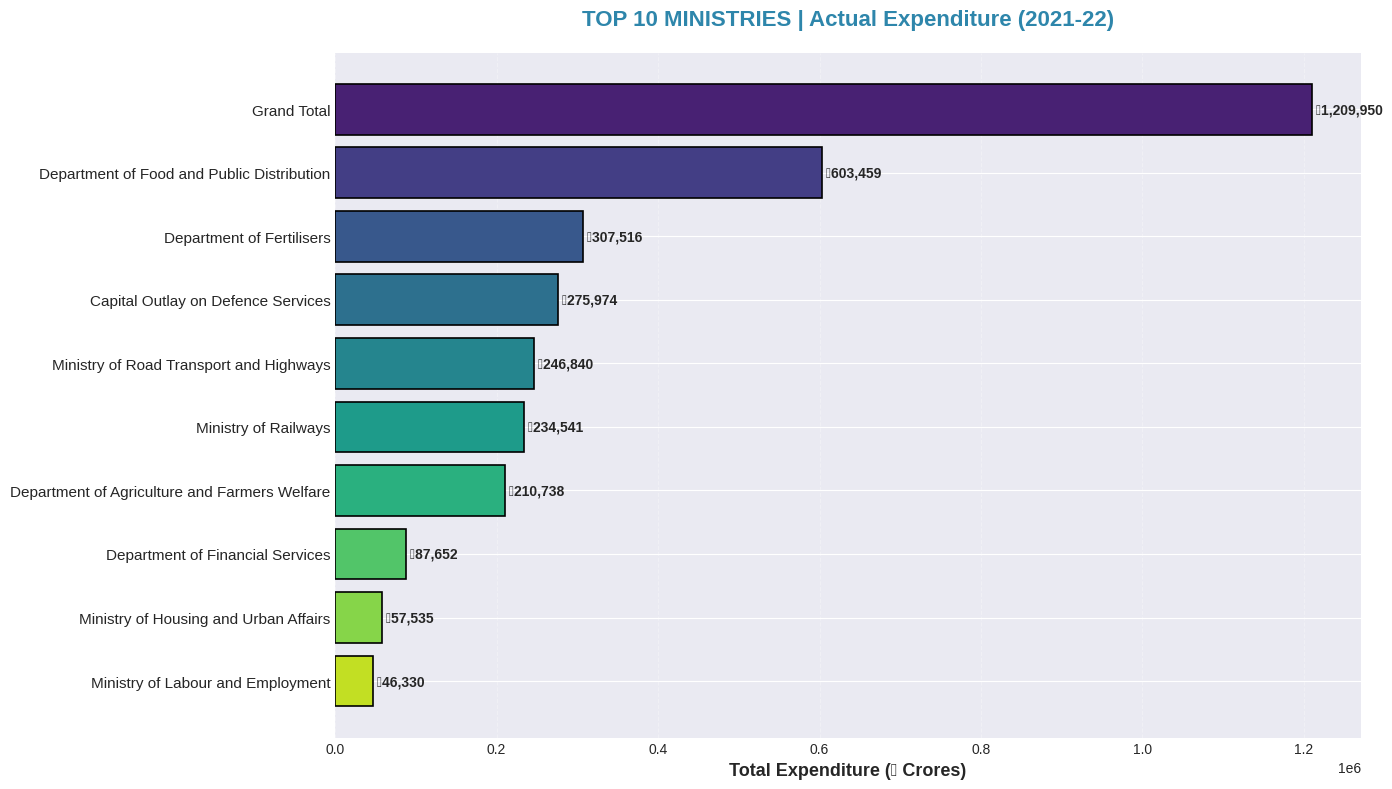


                           💡 TOP MINISTRIES ANALYSIS                            
   🏆 Top 3 Ministries (Elite Spenders):
      1. Grand Total: ₹1,209,950 Cr (33.3%)
      2. Department of Food and Public Distribution: ₹603,459 Cr (16.6%)
      3. Department of Fertilisers: ₹307,516 Cr (8.5%)
      • Combined: ₹2,120,925 Crores
      • Share of total budget: 58.4%
   
   📊 Concentration Metrics:
      • Top 5 control: 72.8% of budget
      • Top 10 control: 90.4% of budget
      • Remaining 60 ministries share: 9.6%
   
   💰 Budget Inequality:
      • Highest ministry is 26.1x the 10th ministry
      • Average of top 10: ₹328,053 Crores
      • This suggests high concentration of fiscal power
   
   🎯 Dominance Analysis:
      • Level: VERY HIGH
      • Top 3 alone control more than half of budget
      • Indicates strategic priority sectors for government
   
   🔍 KEY TAKEAWAY:
      A small number of ministries dominate the budget allocation,
      suggesting focused government prior

In [ ]:
# ============================================================================
# 2. TOP 10 MINISTRIES - Enhanced Bar Chart
# ============================================================================
plt.figure(figsize=(14, 8))
top_ministries = df.groupby('Ministry/Department')['Actuals 2021-2022 Total'].sum().sort_values(ascending=False).head(10)
total_budget = df['Actuals 2021-2022 Total'].sum()

colors = sns.color_palette("viridis", len(top_ministries))
bars = plt.barh(range(len(top_ministries)), top_ministries.values,
               color=colors, edgecolor='black', linewidth=1.2)

for i, (bar, val) in enumerate(zip(bars, top_ministries.values)):
    plt.text(val, i, f' ₹{val:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.yticks(range(len(top_ministries)), top_ministries.index, fontsize=11)
plt.xlabel('Total Expenditure (₹ Crores)', fontsize=13, fontweight='bold')
plt.title('TOP 10 MINISTRIES | Actual Expenditure (2021-22)',
         fontsize=16, fontweight='bold', pad=20, color=COLORS['primary'])
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Calculate insights
top3_sum = top_ministries.head(3).sum()
top5_sum = top_ministries.head(5).sum()
top10_sum = top_ministries.sum()
remaining_ministries = df['Ministry/Department'].nunique() - 10
remaining_budget = total_budget - top10_sum

print_insight_box("TOP MINISTRIES ANALYSIS", [
    f"🏆 Top 3 Ministries (Elite Spenders):",
    f"   1. {top_ministries.index[0]}: ₹{top_ministries.iloc[0]:,.0f} Cr ({top_ministries.iloc[0]/total_budget*100:.1f}%)",
    f"   2. {top_ministries.index[1]}: ₹{top_ministries.iloc[1]:,.0f} Cr ({top_ministries.iloc[1]/total_budget*100:.1f}%)",
    f"   3. {top_ministries.index[2]}: ₹{top_ministries.iloc[2]:,.0f} Cr ({top_ministries.iloc[2]/total_budget*100:.1f}%)",
    f"   • Combined: ₹{top3_sum:,.0f} Crores",
    f"   • Share of total budget: {top3_sum/total_budget*100:.1f}%",
    f"",
    f"📊 Concentration Metrics:",
    f"   • Top 5 control: {top5_sum/total_budget*100:.1f}% of budget",
    f"   • Top 10 control: {top10_sum/total_budget*100:.1f}% of budget",
    f"   • Remaining {remaining_ministries} ministries share: {remaining_budget/total_budget*100:.1f}%",
    f"",
    f"💰 Budget Inequality:",
    f"   • Highest ministry is {top_ministries.iloc[0]/top_ministries.iloc[-1]:.1f}x the 10th ministry",
    f"   • Average of top 10: ₹{top10_sum/10:,.0f} Crores",
    f"   • This suggests high concentration of fiscal power",
    f"",
    f"🎯 Dominance Analysis:",
    f"   • Level: {'VERY HIGH' if top3_sum/total_budget*100 > 50 else 'HIGH' if top3_sum/total_budget*100 > 30 else 'MODERATE'}",
    f"   • Top 3 alone control more than {'half' if top3_sum/total_budget*100 > 50 else 'one-third' if top3_sum/total_budget*100 > 30 else 'one-quarter'} of budget",
    f"   • Indicates strategic priority sectors for government",
    f"",
    f"🔍 KEY TAKEAWAY:",
    f"   A small number of ministries dominate the budget allocation,",
    f"   suggesting focused government priorities in specific sectors.",
    f"   This concentration is typical of welfare-focused economies with",
    f"   large social security and infrastructure commitments."
])

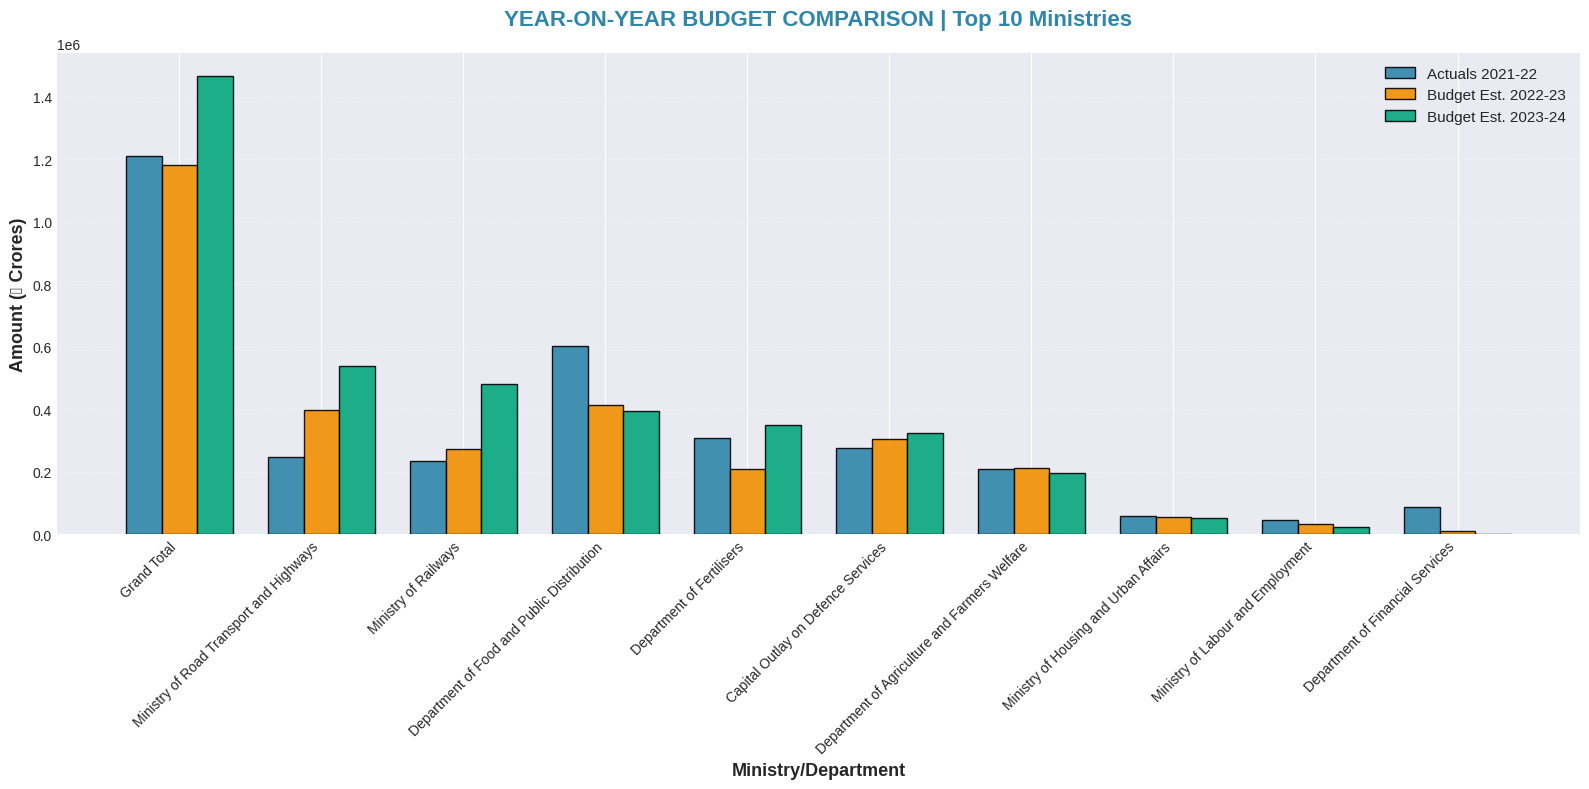


                         💡 YEAR-ON-YEAR GROWTH INSIGHTS                         
   📈 Overall Growth Trend:
      • Average growth (2021-22 to 2023-24): +8.41%
      • Number of ministries with positive growth: 5/10
      • Number of ministries with negative growth: 5/10
   
   🚀 Highest Growth Ministry:
      • Ministry of Road Transport and Highways
      • Growth rate: +118.97%
      • 2021-22: ₹246,840 Cr
      • 2023-24: ₹540,501 Cr
      • Absolute increase: ₹293,661 Cr
   
   📉 Lowest Growth Ministry:
      • Department of Financial Services
      • Growth rate: -97.66%
      • This indicates budget cuts
   
   📊 Growth Distribution:
      • High growth (>20%): 3 ministries
      • Moderate growth (5-20%): 2 ministries
      • Low/Negative growth (<5%): 5 ministries
   
   💡 Fiscal Policy Indicator:
      • Overall trend: EXPANSIONARY
      • Government is increasing spending
      • This suggests stability-focused policy
   
   🔍 KEY TAKEAWAY:
      Positive average growth ind

In [ ]:
# ============================================================================
# 3. YEAR-ON-YEAR COMPARISON - Budget Growth
# ============================================================================
fig, ax = plt.subplots(figsize=(16, 8))

top_10_depts = df.groupby('Ministry/Department')['Actuals 2021-2022 Total'].sum().nlargest(10).index
df_top = df[df['Ministry/Department'].isin(top_10_depts)]

comparison = df_top.groupby('Ministry/Department').agg({
    'Actuals 2021-2022 Total': 'sum',
    'Budget Estimates 2022-2023 Total': 'sum',
    'Budget Estimates2023-2024 Total': 'sum'
}).sort_values('Budget Estimates2023-2024 Total', ascending=False)

x = np.arange(len(comparison))
width = 0.25

bars1 = ax.bar(x - width, comparison['Actuals 2021-2022 Total'], width,
              label='Actuals 2021-22', color=COLORS['primary'], alpha=0.9, edgecolor='black')
bars2 = ax.bar(x, comparison['Budget Estimates 2022-2023 Total'], width,
              label='Budget Est. 2022-23', color=COLORS['accent'], alpha=0.9, edgecolor='black')
bars3 = ax.bar(x + width, comparison['Budget Estimates2023-2024 Total'], width,
              label='Budget Est. 2023-24', color=COLORS['success'], alpha=0.9, edgecolor='black')

ax.set_xlabel('Ministry/Department', fontsize=13, fontweight='bold')
ax.set_ylabel('Amount (₹ Crores)', fontsize=13, fontweight='bold')
ax.set_title('YEAR-ON-YEAR BUDGET COMPARISON | Top 10 Ministries',
            fontsize=16, fontweight='bold', pad=20, color=COLORS['primary'])
ax.set_xticks(x)
ax.set_xticklabels(comparison.index, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Calculate growth metrics
comparison['Growth_21_22'] = ((comparison['Budget Estimates 2022-2023 Total'] -
                               comparison['Actuals 2021-2022 Total']) /
                              comparison['Actuals 2021-2022 Total'] * 100)
comparison['Growth_22_23'] = ((comparison['Budget Estimates2023-2024 Total'] -
                               comparison['Budget Estimates 2022-2023 Total']) /
                              comparison['Budget Estimates 2022-2023 Total'] * 100)
comparison['Growth_21_23'] = ((comparison['Budget Estimates2023-2024 Total'] -
                               comparison['Actuals 2021-2022 Total']) /
                              comparison['Actuals 2021-2022 Total'] * 100)

max_growth_ministry = comparison['Growth_21_23'].idxmax()
min_growth_ministry = comparison['Growth_21_23'].idxmin()
avg_growth = comparison['Growth_21_23'].mean()

print_insight_box("YEAR-ON-YEAR GROWTH INSIGHTS", [
    f"📈 Overall Growth Trend:",
    f"   • Average growth (2021-22 to 2023-24): {avg_growth:+.2f}%",
    f"   • Number of ministries with positive growth: {(comparison['Growth_21_23'] > 0).sum()}/10",
    f"   • Number of ministries with negative growth: {(comparison['Growth_21_23'] < 0).sum()}/10",
    f"",
    f"🚀 Highest Growth Ministry:",
    f"   • {max_growth_ministry}",
    f"   • Growth rate: {comparison.loc[max_growth_ministry, 'Growth_21_23']:+.2f}%",
    f"   • 2021-22: ₹{comparison.loc[max_growth_ministry, 'Actuals 2021-2022 Total']:,.0f} Cr",
    f"   • 2023-24: ₹{comparison.loc[max_growth_ministry, 'Budget Estimates2023-2024 Total']:,.0f} Cr",
    f"   • Absolute increase: ₹{comparison.loc[max_growth_ministry, 'Budget Estimates2023-2024 Total'] - comparison.loc[max_growth_ministry, 'Actuals 2021-2022 Total']:,.0f} Cr",
    f"",
    f"📉 Lowest Growth Ministry:",
    f"   • {min_growth_ministry}",
    f"   • Growth rate: {comparison.loc[min_growth_ministry, 'Growth_21_23']:+.2f}%",
    f"   • This {'indicates budget cuts' if comparison.loc[min_growth_ministry, 'Growth_21_23'] < 0 else 'shows modest growth'}",
    f"",
    f"📊 Growth Distribution:",
    f"   • High growth (>20%): {(comparison['Growth_21_23'] > 20).sum()} ministries",
    f"   • Moderate growth (5-20%): {((comparison['Growth_21_23'] >= 5) & (comparison['Growth_21_23'] <= 20)).sum()} ministries",
    f"   • Low/Negative growth (<5%): {(comparison['Growth_21_23'] < 5).sum()} ministries",
    f"",
    f"💡 Fiscal Policy Indicator:",
    f"   • Overall trend: {'EXPANSIONARY' if avg_growth > 0 else 'CONTRACTIONARY'}",
    f"   • Government is {'increasing' if avg_growth > 0 else 'decreasing'} spending",
    f"   • This suggests {'growth-focused' if avg_growth > 10 else 'stability-focused' if avg_growth > 0 else 'austerity'} policy",
    f"",
    f"🔍 KEY TAKEAWAY:",
    f"   {'Positive average growth indicates government expansion in key sectors.' if avg_growth > 0 else 'Negative growth suggests fiscal consolidation measures.'}",
    f"   Variation in growth rates shows strategic reallocation of resources",
    f"   based on changing priorities and economic conditions."
])

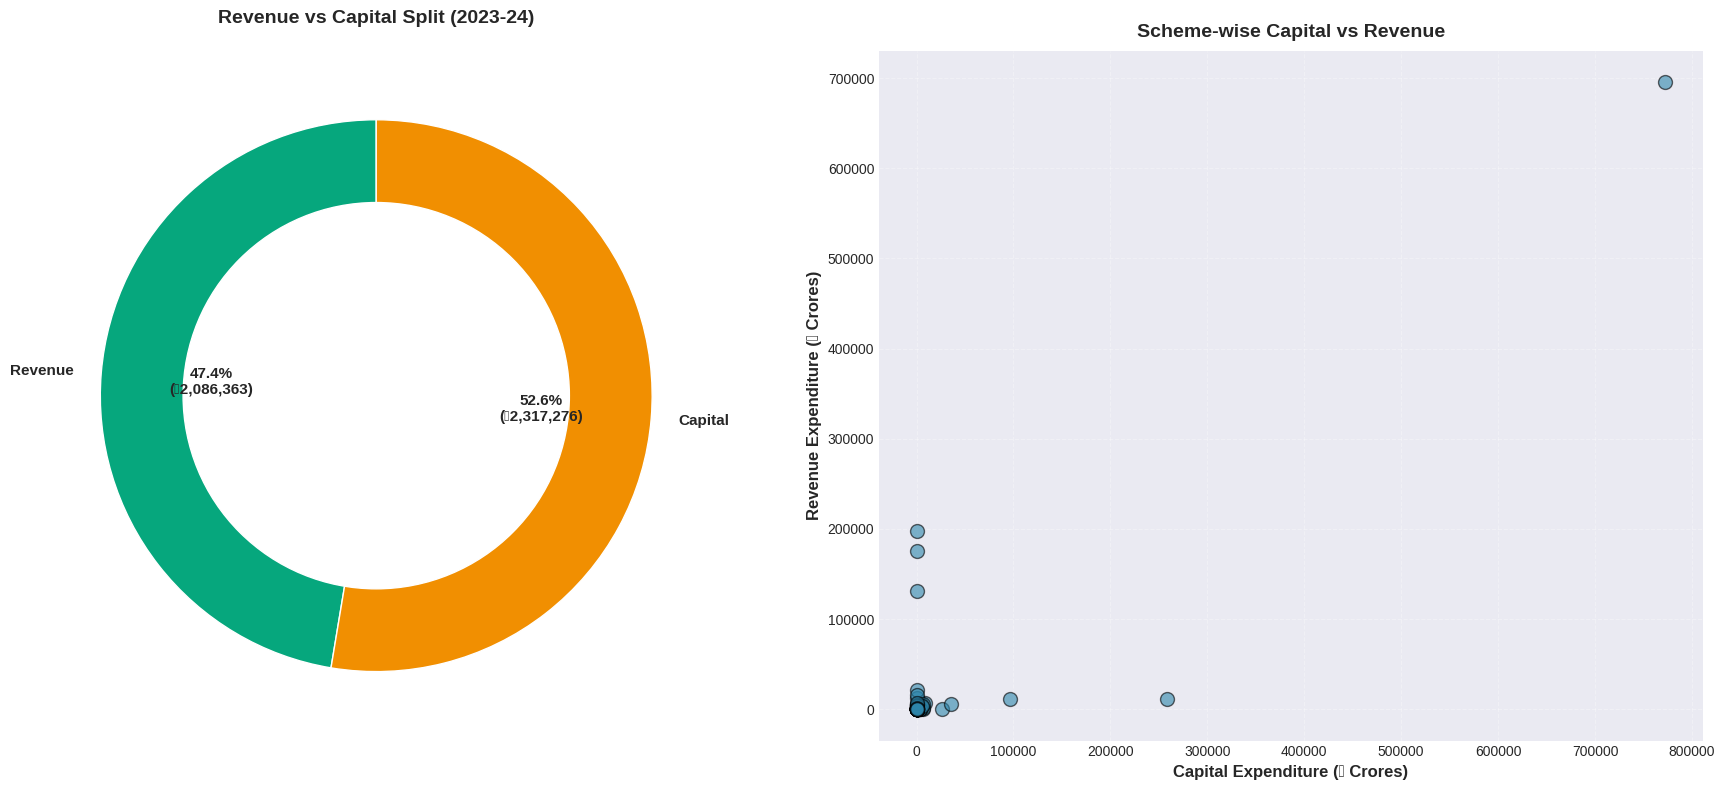


                         💡 CAPITAL vs REVENUE ANALYSIS                          
   💰 Overall Budget Composition (2023-24):
      • Total Budget: ₹4,403,640 Crores
      • Revenue Expenditure: ₹2,086,363 Crores (47.4%)
      • Capital Expenditure: ₹2,317,277 Crores (52.6%)
      • Revenue to Capital Ratio: 0.90:1
   
   📋 Understanding the Categories:
      • REVENUE: Day-to-day operational expenses
        - Salaries and wages
        - Maintenance and repairs
        - Subsidies and grants
        - Interest payments
      • CAPITAL: Long-term asset creation
        - Infrastructure development
        - Equipment and machinery
        - Buildings and construction
        - Investments in PSUs
   
   🎯 Expenditure Focus:
      • Dominant category: CAPITAL
      • This indicates: Development/infrastructure focus
      • Ratio interpretation: For every ₹1 of capital, ₹0.90 goes to revenue
   
   📊 Scheme-level Analysis:
      • Total schemes analyzed: 104
      • Revenue-heavy schemes

In [ ]:
# ============================================================================
# 4. CAPITAL vs REVENUE EXPENDITURE
# ============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
total_capital = df['Budget Estimates2023-2024 Capital'].sum()
total_revenue = df['Budget Estimates2023-2024 Revenue'].sum()
donut_data = pd.Series({'Revenue': total_revenue, 'Capital': total_capital})

colors2 = [COLORS['success'], COLORS['accent']]
wedges, texts, autotexts = ax1.pie(donut_data.values, labels=donut_data.index,
                                     autopct=lambda pct: f'{pct:.1f}%\n(₹{pct/100*donut_data.sum():,.0f})',
                                     colors=colors2, startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})
circle = plt.Circle((0, 0), 0.70, fc='white')
ax1.add_artist(circle)
ax1.set_title('Revenue vs Capital Split (2023-24)', fontsize=14, fontweight='bold', pad=20)

# Scatter plot
df_scatter = df[(df['Budget Estimates2023-2024 Capital'] > 0) &
                (df['Budget Estimates2023-2024 Revenue'] > 0)].copy()

ax2.scatter(df_scatter['Budget Estimates2023-2024 Capital'],
           df_scatter['Budget Estimates2023-2024 Revenue'],
           s=100, alpha=0.6, c=COLORS['primary'], edgecolors='black', linewidth=1)
ax2.set_xlabel('Capital Expenditure (₹ Crores)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Revenue Expenditure (₹ Crores)', fontsize=12, fontweight='bold')
ax2.set_title('Scheme-wise Capital vs Revenue', fontsize=14, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Calculate metrics
total_combined = total_revenue + total_capital
revenue_pct = (total_revenue/total_combined)*100
capital_pct = (total_capital/total_combined)*100
ratio = total_revenue/total_capital

revenue_heavy = (df_scatter['Budget Estimates2023-2024 Revenue'] >
                 df_scatter['Budget Estimates2023-2024 Capital']).sum()
capital_heavy = len(df_scatter) - revenue_heavy

print_insight_box("CAPITAL vs REVENUE ANALYSIS", [
    f"💰 Overall Budget Composition (2023-24):",
    f"   • Total Budget: ₹{total_combined:,.0f} Crores",
    f"   • Revenue Expenditure: ₹{total_revenue:,.0f} Crores ({revenue_pct:.1f}%)",
    f"   • Capital Expenditure: ₹{total_capital:,.0f} Crores ({capital_pct:.1f}%)",
    f"   • Revenue to Capital Ratio: {ratio:.2f}:1",
    f"",
    f"📋 Understanding the Categories:",
    f"   • REVENUE: Day-to-day operational expenses",
    f"     - Salaries and wages",
    f"     - Maintenance and repairs",
    f"     - Subsidies and grants",
    f"     - Interest payments",
    f"   • CAPITAL: Long-term asset creation",
    f"     - Infrastructure development",
    f"     - Equipment and machinery",
    f"     - Buildings and construction",
    f"     - Investments in PSUs",
    f"",
    f"🎯 Expenditure Focus:",
    f"   • Dominant category: {'REVENUE' if revenue_pct > capital_pct else 'CAPITAL'}",
    f"   • This indicates: {'Operational/welfare focus' if revenue_pct > capital_pct else 'Development/infrastructure focus'}",
    f"   • Ratio interpretation: For every ₹1 of capital, ₹{ratio:.2f} goes to revenue",
    f"",
    f"📊 Scheme-level Analysis:",
    f"   • Total schemes analyzed: {len(df_scatter)}",
    f"   • Revenue-heavy schemes: {revenue_heavy} ({revenue_heavy/len(df_scatter)*100:.1f}%)",
    f"   • Capital-heavy schemes: {capital_heavy} ({capital_heavy/len(df_scatter)*100:.1f}%)",
    f"   • Balance: {'Revenue-dominated' if revenue_heavy > capital_heavy else 'Capital-dominated'}",
    f"",
    f"💡 Economic Interpretation:",
    f"   • High revenue share suggests: {'Welfare state focus with large social sector commitments' if revenue_pct > 70 else 'Balanced approach'}",
    f"   • Capital share of {capital_pct:.1f}% is {'low' if capital_pct < 20 else 'moderate' if capital_pct < 30 else 'high'}",
    f"   • For sustainable growth, economists recommend 25-30% capital expenditure",
    f"   • Current ratio: {'Below optimal' if capital_pct < 25 else 'Within optimal range' if capital_pct < 30 else 'Above optimal'}",
    f"",
    f"🔍 KEY TAKEAWAY:",
    f"   The {revenue_pct:.1f}% revenue expenditure indicates government's",
    f"   commitment to ongoing programs and welfare schemes. However,",
    f"   {'lower' if capital_pct < 25 else 'adequate'} capital expenditure of {capital_pct:.1f}% suggests",
    f"   {'need for more' if capital_pct < 25 else 'balanced'} focus on infrastructure and asset creation."
])

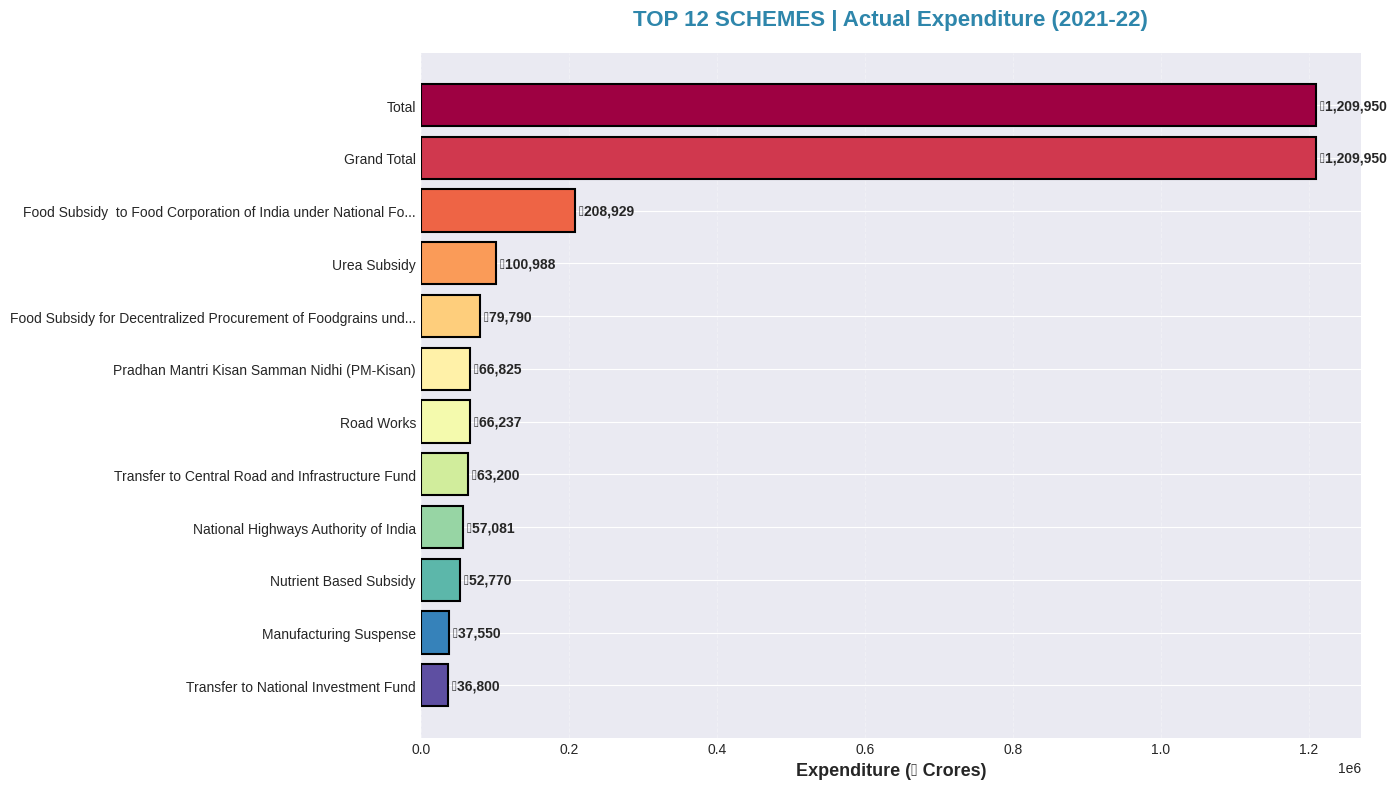


                             💡 TOP SCHEMES ANALYSIS                             
   🏆 Leading Schemes:
      1. Total
         Amount: ₹1,209,950 Crores (33.33%)
      2. Grand Total
         Amount: ₹1,209,950 Crores (33.33%)
      3. Food Subsidy  to Food Corporation of India under National Fo
         Amount: ₹208,929 Crores (5.76%)
   
   📊 Concentration Metrics:
      • Top 3 schemes: ₹2,628,828 Cr (72.4%)
      • Top 5 schemes: ₹2,809,606 Cr (77.4%)
      • Top 12 schemes: ₹3,190,069 Cr (87.9%)
      • Remaining 700 schemes: (12.1%)
   
   💰 Budget Impact:
      • Average of top 12: ₹265,839 Crores
      • Largest scheme is 32.9x the 12th scheme
      • These are flagship/priority programs
   
   🎯 Efficiency Analysis:
      • Just 1.7% of schemes control 87.9% of budget
      • Concentration level: VERY HIGH
      • This indicates focused spending on high-impact programs
   
   🔍 KEY TAKEAWAY:
      Government prioritizes a small number of large-scale schemes
      over numerou

In [ ]:
# ============================================================================
# 5. TOP SCHEMES
# ============================================================================
plt.figure(figsize=(14, 8))
top_schemes = df.groupby('Scheme')['Actuals 2021-2022 Total'].sum().sort_values(ascending=False).head(12)

colors = plt.cm.Spectral(np.linspace(0, 1, len(top_schemes)))
bars = plt.barh(range(len(top_schemes)), top_schemes.values, color=colors,
                edgecolor='black', linewidth=1.5)

for i, (bar, val) in enumerate(zip(bars, top_schemes.values)):
    plt.text(val, i, f' ₹{val:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.yticks(range(len(top_schemes)), [s[:60] + '...' if len(s) > 60 else s
           for s in top_schemes.index], fontsize=10)
plt.xlabel('Expenditure (₹ Crores)', fontsize=13, fontweight='bold')
plt.title('TOP 12 SCHEMES | Actual Expenditure (2021-22)',
         fontsize=16, fontweight='bold', pad=20, color=COLORS['primary'])
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

total_schemes_budget = df['Actuals 2021-2022 Total'].sum()
total_schemes_count = df['Scheme'].nunique()

print_insight_box("TOP SCHEMES ANALYSIS", [
    f"🏆 Leading Schemes:",
    f"   1. {top_schemes.index[0][:60]}",
    f"      Amount: ₹{top_schemes.iloc[0]:,.0f} Crores ({top_schemes.iloc[0]/total_schemes_budget*100:.2f}%)",
    f"   2. {top_schemes.index[1][:60]}",
    f"      Amount: ₹{top_schemes.iloc[1]:,.0f} Crores ({top_schemes.iloc[1]/total_schemes_budget*100:.2f}%)",
    f"   3. {top_schemes.index[2][:60]}",
    f"      Amount: ₹{top_schemes.iloc[2]:,.0f} Crores ({top_schemes.iloc[2]/total_schemes_budget*100:.2f}%)",
    f"",
    f"📊 Concentration Metrics:",
    f"   • Top 3 schemes: ₹{top_schemes.head(3).sum():,.0f} Cr ({top_schemes.head(3).sum()/total_schemes_budget*100:.1f}%)",
    f"   • Top 5 schemes: ₹{top_schemes.head(5).sum():,.0f} Cr ({top_schemes.head(5).sum()/total_schemes_budget*100:.1f}%)",
    f"   • Top 12 schemes: ₹{top_schemes.sum():,.0f} Cr ({top_schemes.sum()/total_schemes_budget*100:.1f}%)",
    f"   • Remaining {total_schemes_count-12} schemes: ({100-top_schemes.sum()/total_schemes_budget*100:.1f}%)",
    f"",
    f"💰 Budget Impact:",
    f"   • Average of top 12: ₹{top_schemes.mean():,.0f} Crores",
    f"   • Largest scheme is {top_schemes.iloc[0]/top_schemes.iloc[-1]:.1f}x the 12th scheme",
    f"   • These are flagship/priority programs",
    f"",
    f"🎯 Efficiency Analysis:",
    f"   • Just {12/total_schemes_count*100:.1f}% of schemes control {top_schemes.sum()/total_schemes_budget*100:.1f}% of budget",
    f"   • Concentration level: {'VERY HIGH' if top_schemes.sum()/total_schemes_budget*100 > 50 else 'HIGH' if top_schemes.sum()/total_schemes_budget*100 > 30 else 'MODERATE'}",
    f"   • This indicates focused spending on high-impact programs",
    f"",
    f"🔍 KEY TAKEAWAY:",
    f"   Government prioritizes a small number of large-scale schemes",
    f"   over numerous small programs. This approach allows for better",
    f"   monitoring, impact assessment, and efficient resource utilization."
])


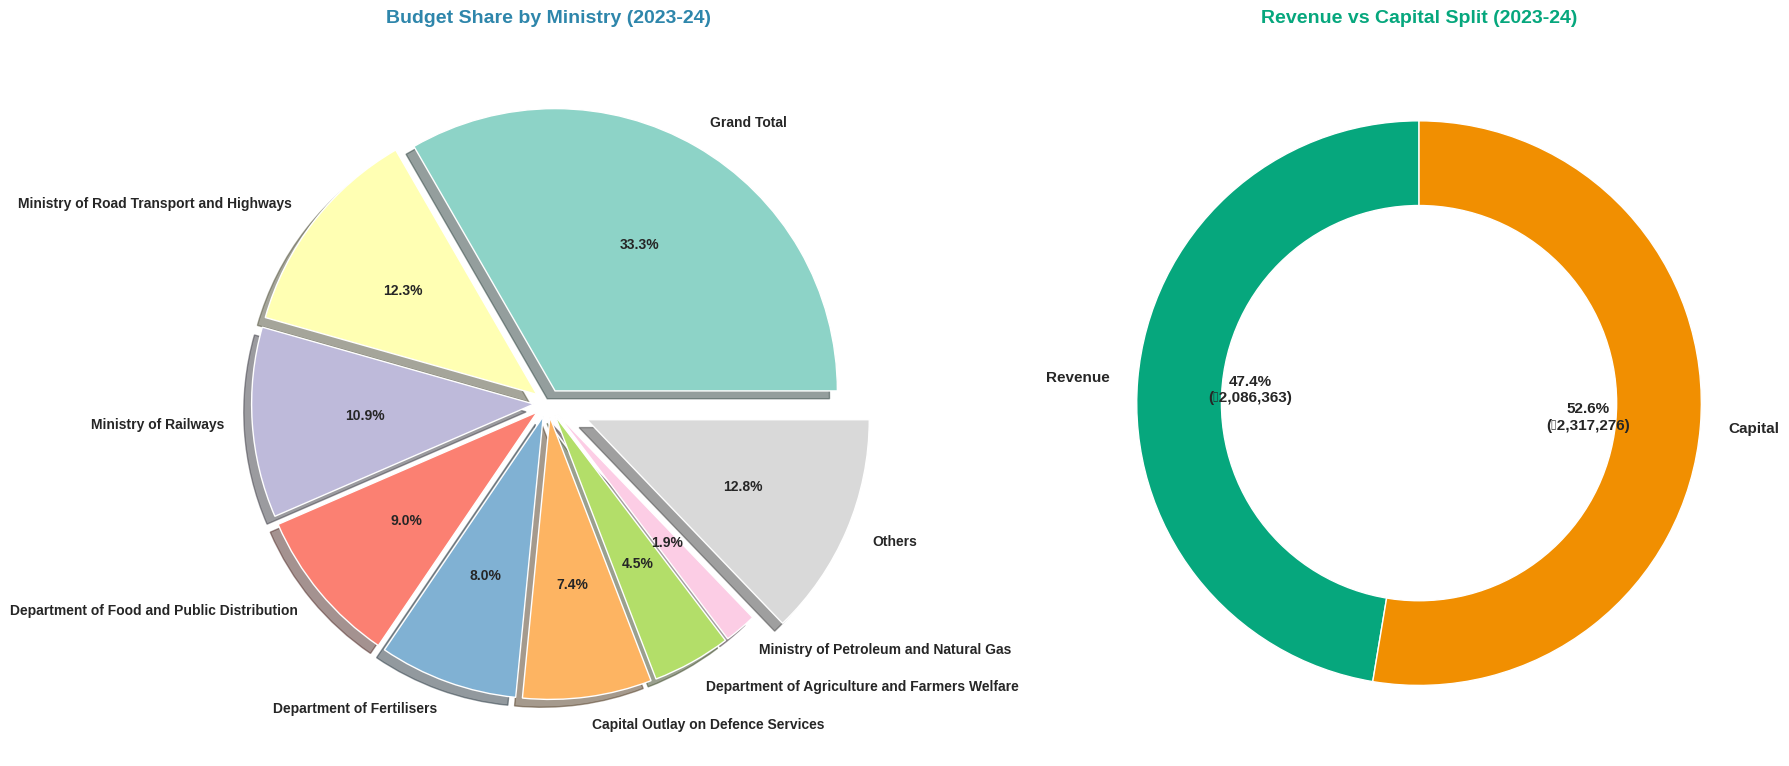

In [ ]:
# ============================================================================
# 6. ENHANCED PIE CHART - Budget Share
# ============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top 8 ministries + Others
ministry_sum = df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total'].sum().sort_values(ascending=False)
top_8 = ministry_sum.head(8)
others = pd.Series({'Others': ministry_sum[8:].sum()})
pie_data = pd.concat([top_8, others])

colors = sns.color_palette("Set3", len(pie_data))
explode = [0.05] * 8 + [0.15]

wedges, texts, autotexts = ax1.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%',
                                     colors=colors, explode=explode, shadow=True,
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})
ax1.set_title('Budget Share by Ministry (2023-24)', fontsize=14, fontweight='bold', pad=20, color=COLORS['primary'])

# Donut chart for capital vs revenue
total_capital = df['Budget Estimates2023-2024 Capital'].sum()
total_revenue = df['Budget Estimates2023-2024 Revenue'].sum()
donut_data = pd.Series({'Revenue': total_revenue, 'Capital': total_capital})

colors2 = [COLORS['success'], COLORS['accent']]
wedges, texts, autotexts = ax2.pie(donut_data.values, labels=donut_data.index,
                                     autopct=lambda pct: f'{pct:.1f}%\n(₹{pct/100*donut_data.sum():,.0f})',
                                     colors=colors2, startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})
circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(circle)
ax2.set_title('Revenue vs Capital Split (2023-24)', fontsize=14, fontweight='bold', pad=20, color=COLORS['success'])

plt.tight_layout()
plt.show()


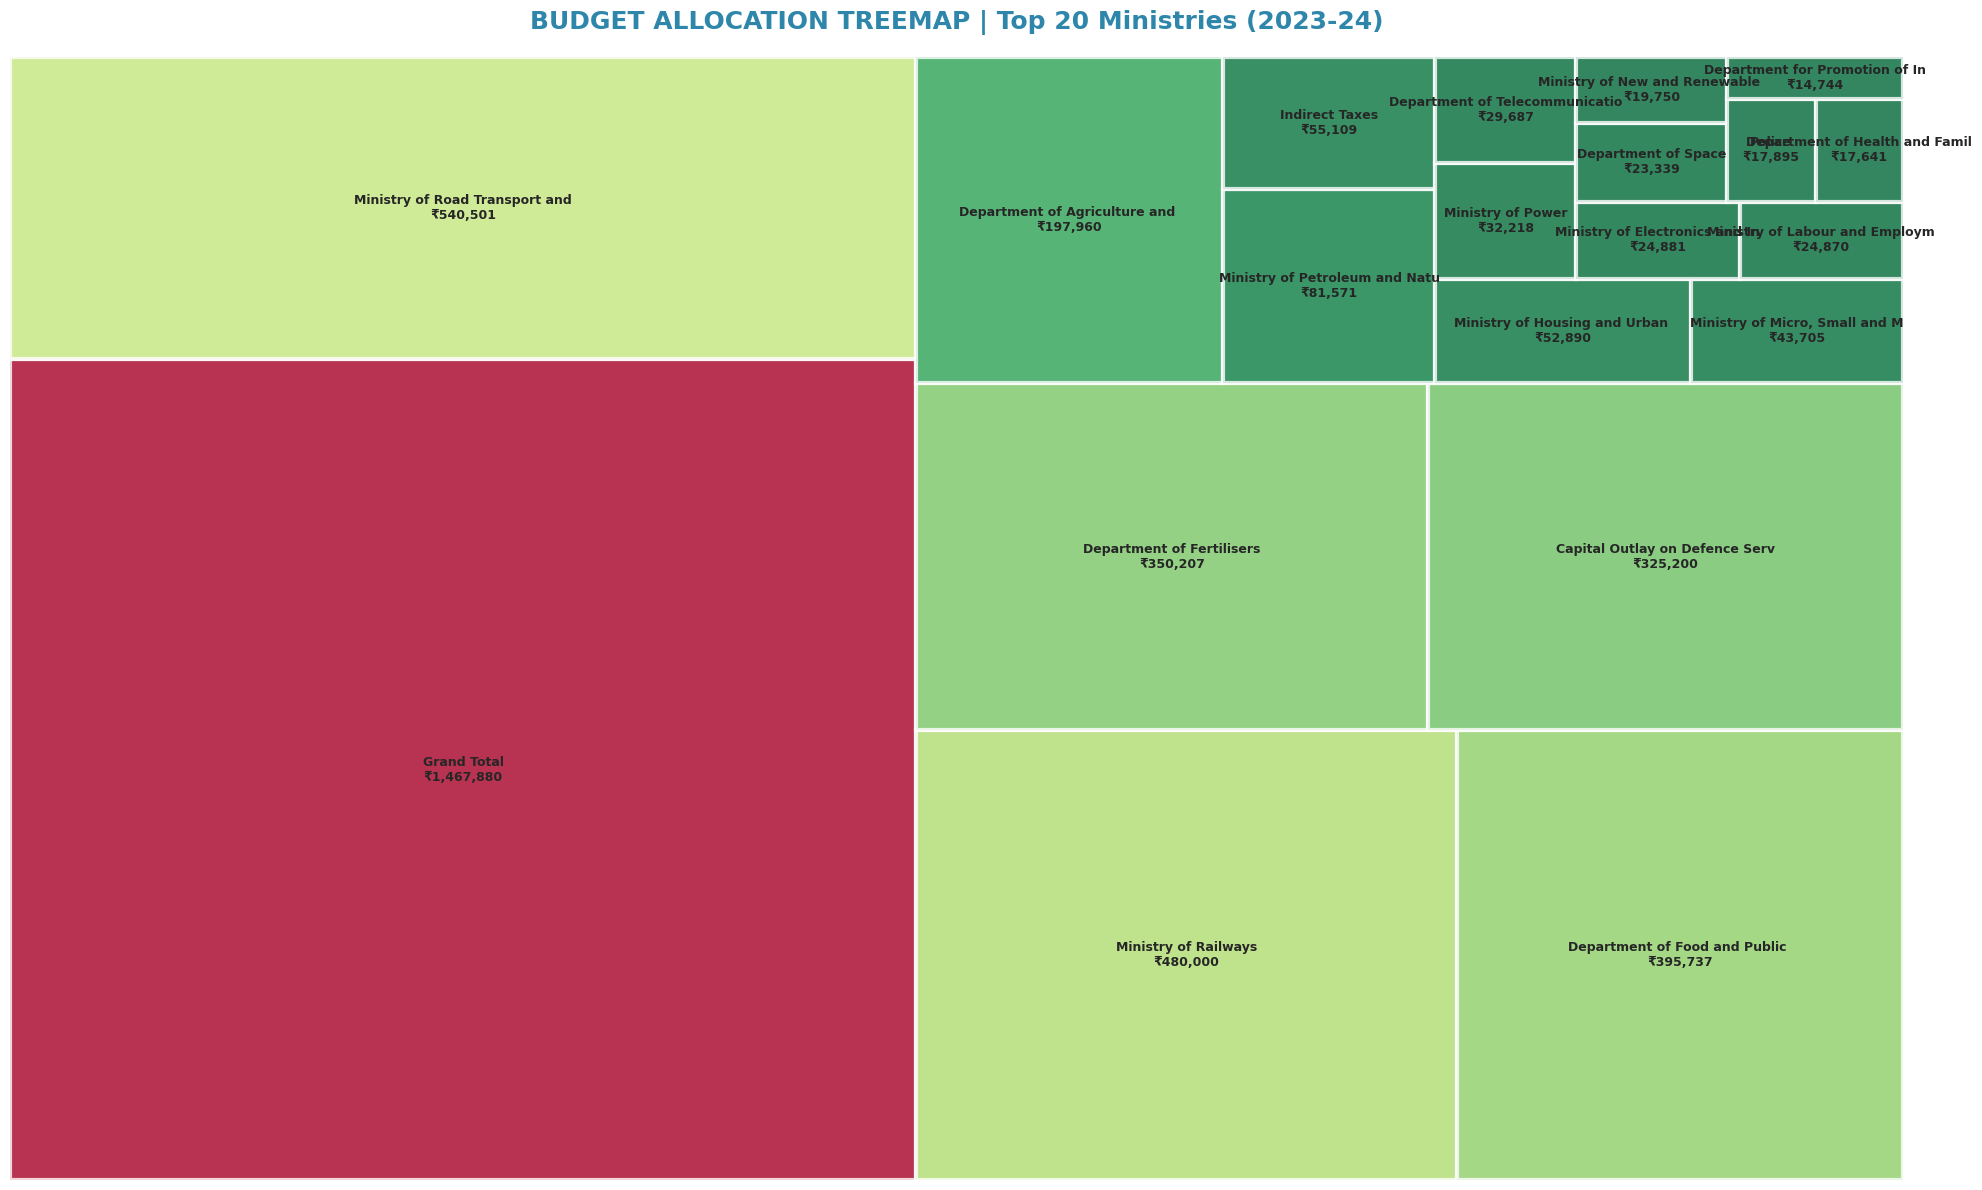

In [ ]:
# ============================================================================
# 7. ENHANCED TREEMAP
# ============================================================================
plt.figure(figsize=(20, 12))
sizes = df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total'].sum().sort_values(ascending=False).head(20)

# Create color gradient
norm = plt.Normalize(vmin=sizes.min(), vmax=sizes.max())
colors = plt.cm.RdYlGn_r(norm(sizes.values))

squarify.plot(sizes=sizes.values,
              label=[f'{name[:30]}\n₹{val:,.0f}' for name, val in sizes.items()],
              alpha=0.8, color=colors, text_kwargs={'fontsize': 9, 'fontweight': 'bold'},
              edgecolor='white', linewidth=3)

plt.title('BUDGET ALLOCATION TREEMAP | Top 20 Ministries (2023-24)',
          fontsize=18, fontweight='bold', pad=20, color=COLORS['primary'])
plt.axis('off')
plt.tight_layout()
plt.show()

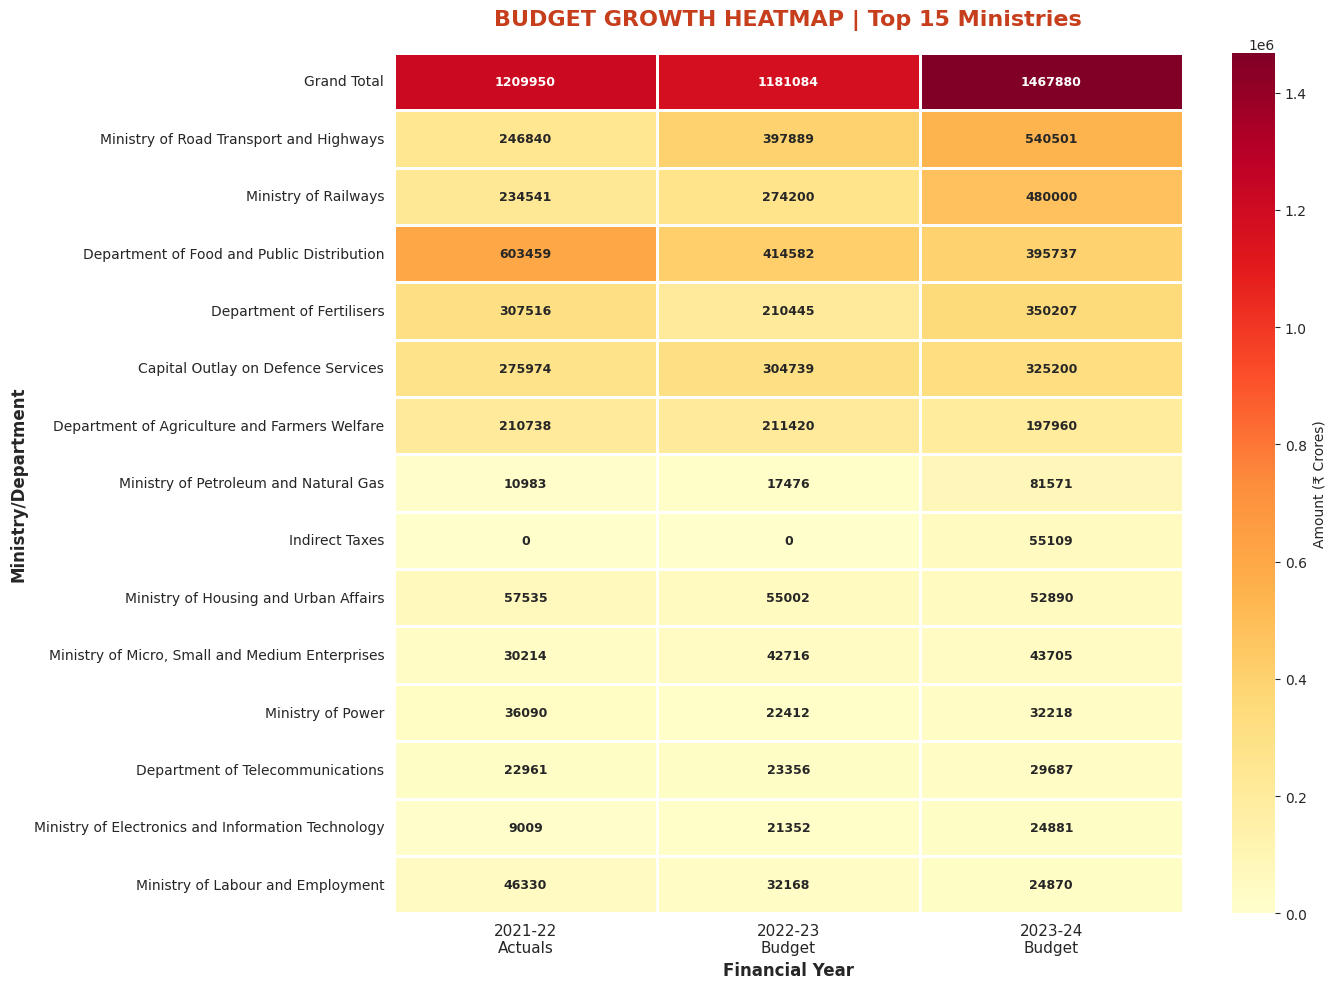

In [ ]:
# ============================================================================
# 8. GROWTH ANALYSIS - Heatmap
# ============================================================================
plt.figure(figsize=(14, 10))

top_15 = df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total'].sum().nlargest(15).index
growth_data = df[df['Ministry/Department'].isin(top_15)].groupby('Ministry/Department').agg({
    'Actuals 2021-2022 Total': 'sum',
    'Budget Estimates 2022-2023 Total': 'sum',
    'Budget Estimates2023-2024 Total': 'sum'
})

growth_data.columns = ['2021-22\nActuals', '2022-23\nBudget', '2023-24\nBudget']
growth_data = growth_data.sort_values('2023-24\nBudget', ascending=False)

sns.heatmap(growth_data, annot=True, fmt='.0f', cmap='YlOrRd',
            linewidths=2, linecolor='white', cbar_kws={'label': 'Amount (₹ Crores)'},
            annot_kws={'fontsize': 9, 'fontweight': 'bold'})

plt.title('BUDGET GROWTH HEATMAP | Top 15 Ministries', fontsize=16, fontweight='bold', pad=20, color=COLORS['danger'])
plt.ylabel('Ministry/Department', fontsize=12, fontweight='bold')
plt.xlabel('Financial Year', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

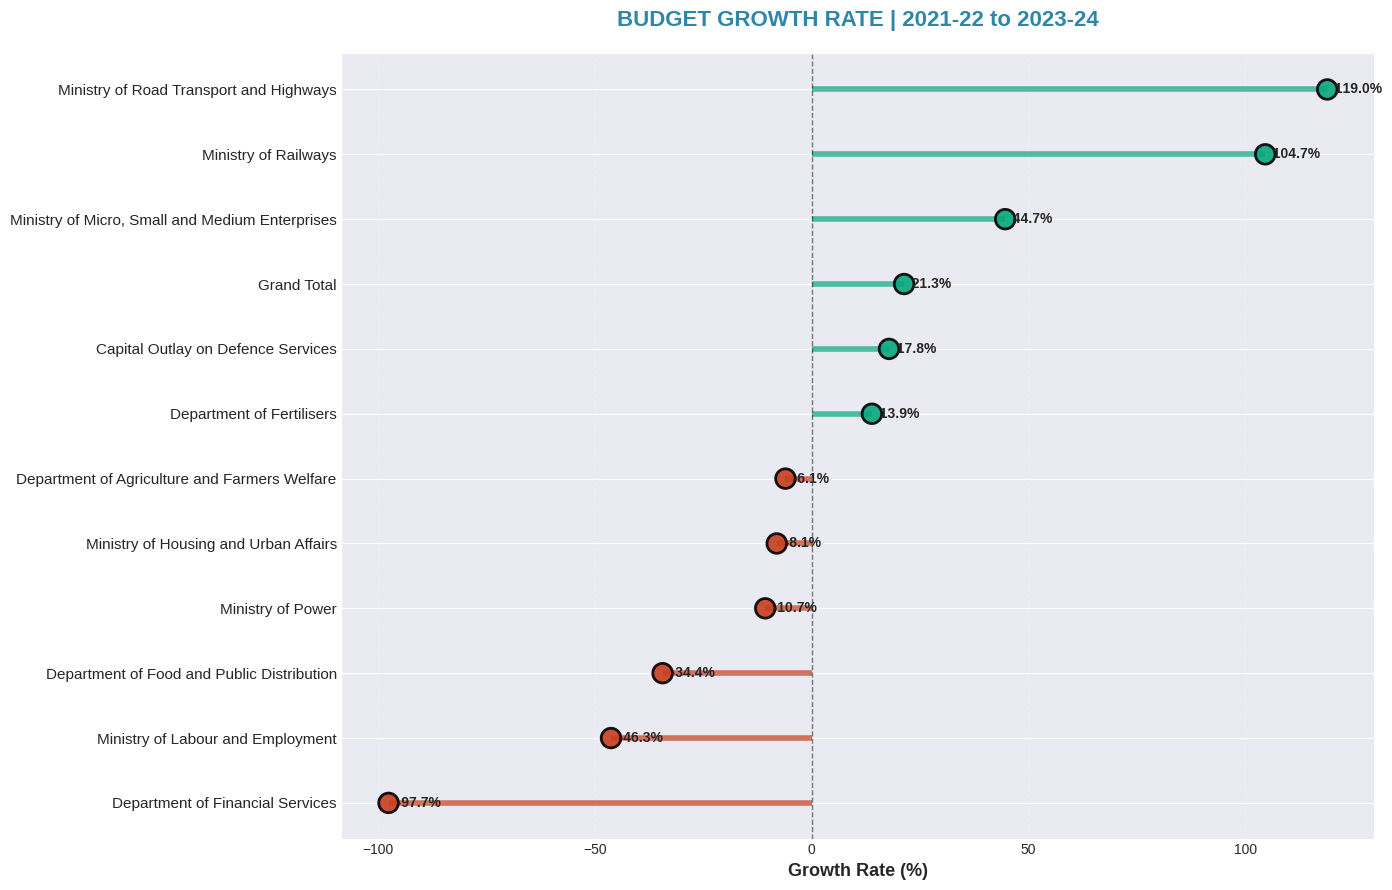


                             💡 GROWTH RATE INSIGHTS                             
   📈 Growth Performance Summary:
      • Ministries with positive growth: 6/12 (50%)
      • Ministries with negative growth: 6/12 (50%)
      • Average growth rate: +9.84%
   
   🚀 Best Performer:
      • Ministry: Ministry of Road Transport and Highways
      • Growth: +118.97%
      • 2021-22: ₹246,840 Cr
      • 2023-24: ₹540,501 Cr
      • Absolute gain: ₹293,661 Cr
   
   📉 Worst Performer:
      • Ministry: Department of Financial Services
      • Growth: -97.66%
      • This represents: Budget cut
   
   📊 Growth Distribution:
      • Very high growth (>50%): 2 ministries
      • High growth (20-50%): 2 ministries
      • Moderate growth (5-20%): 2 ministries
      • Low growth (0-5%): 0 ministries
      • Negative growth (<0%): 6 ministries
   
   💡 Policy Implications:
      • Overall stance: MODERATELY EXPANSIONARY
      • Fiscal approach: Balanced
      • Spending variation: 216.6% (range)
   

In [ ]:
# ============================================================================
# 7. GROWTH RATE LOLLIPOP CHART
# ============================================================================
plt.figure(figsize=(14, 9))

top_12_ministries = df.groupby('Ministry/Department')['Actuals 2021-2022 Total'].sum().nlargest(12).index
growth_analysis = df[df['Ministry/Department'].isin(top_12_ministries)].groupby('Ministry/Department').agg({
    'Actuals 2021-2022 Total': 'sum',
    'Budget Estimates2023-2024 Total': 'sum'
})
growth_analysis['Growth_Rate'] = ((growth_analysis['Budget Estimates2023-2024 Total'] -
                                   growth_analysis['Actuals 2021-2022 Total']) /
                                  growth_analysis['Actuals 2021-2022 Total'] * 100)
growth_analysis = growth_analysis.sort_values('Growth_Rate', ascending=True)

colors_lollipop = ['#06A77D' if x > 0 else '#C73E1D' for x in growth_analysis['Growth_Rate']]

plt.hlines(y=range(len(growth_analysis)), xmin=0, xmax=growth_analysis['Growth_Rate'],
           color=colors_lollipop, alpha=0.7, linewidth=4)
plt.scatter(growth_analysis['Growth_Rate'], range(len(growth_analysis)),
            color=colors_lollipop, s=200, alpha=0.9, edgecolors='black', linewidth=2, zorder=3)

for i, (val, name) in enumerate(zip(growth_analysis['Growth_Rate'], growth_analysis.index)):
    plt.text(val, i, f'  {val:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.yticks(range(len(growth_analysis)), growth_analysis.index, fontsize=11)
plt.xlabel('Growth Rate (%)', fontsize=13, fontweight='bold')
plt.title('BUDGET GROWTH RATE | 2021-22 to 2023-24', fontsize=16, fontweight='bold',
          pad=20, color=COLORS['primary'])
plt.axvline(0, color='black', linewidth=1, linestyle='--', alpha=0.5)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

positive_growth = (growth_analysis['Growth_Rate'] > 0).sum()
negative_growth = (growth_analysis['Growth_Rate'] < 0).sum()
avg_growth_top12 = growth_analysis['Growth_Rate'].mean()
highest_growth_min = growth_analysis['Growth_Rate'].idxmax()
lowest_growth_min = growth_analysis['Growth_Rate'].idxmin()

print_insight_box("GROWTH RATE INSIGHTS", [
    f"📈 Growth Performance Summary:",
    f"   • Ministries with positive growth: {positive_growth}/12 ({positive_growth/12*100:.0f}%)",
    f"   • Ministries with negative growth: {negative_growth}/12 ({negative_growth/12*100:.0f}%)",
    f"   • Average growth rate: {avg_growth_top12:+.2f}%",
    f"",
    f"🚀 Best Performer:",
    f"   • Ministry: {highest_growth_min}",
    f"   • Growth: {growth_analysis.loc[highest_growth_min, 'Growth_Rate']:+.2f}%",
    f"   • 2021-22: ₹{growth_analysis.loc[highest_growth_min, 'Actuals 2021-2022 Total']:,.0f} Cr",
    f"   • 2023-24: ₹{growth_analysis.loc[highest_growth_min, 'Budget Estimates2023-2024 Total']:,.0f} Cr",
    f"   • Absolute gain: ₹{growth_analysis.loc[highest_growth_min, 'Budget Estimates2023-2024 Total'] - growth_analysis.loc[highest_growth_min, 'Actuals 2021-2022 Total']:,.0f} Cr",
    f"",
    f"📉 Worst Performer:",
    f"   • Ministry: {lowest_growth_min}",
    f"   • Growth: {growth_analysis.loc[lowest_growth_min, 'Growth_Rate']:+.2f}%",
    f"   • This represents: {'Budget cut' if growth_analysis.loc[lowest_growth_min, 'Growth_Rate'] < 0 else 'Minimal growth'}",
    f"",
    f"📊 Growth Distribution:",
    f"   • Very high growth (>50%): {(growth_analysis['Growth_Rate'] > 50).sum()} ministries",
    f"   • High growth (20-50%): {((growth_analysis['Growth_Rate'] >= 20) & (growth_analysis['Growth_Rate'] <= 50)).sum()} ministries",
    f"   • Moderate growth (5-20%): {((growth_analysis['Growth_Rate'] >= 5) & (growth_analysis['Growth_Rate'] < 20)).sum()} ministries",
    f"   • Low growth (0-5%): {((growth_analysis['Growth_Rate'] >= 0) & (growth_analysis['Growth_Rate'] < 5)).sum()} ministries",
    f"   • Negative growth (<0%): {(growth_analysis['Growth_Rate'] < 0).sum()} ministries",
    f"",
    f"💡 Policy Implications:",
    f"   • Overall stance: {'EXPANSIONARY' if avg_growth_top12 > 10 else 'MODERATELY EXPANSIONARY' if avg_growth_top12 > 5 else 'NEUTRAL' if avg_growth_top12 > 0 else 'CONTRACTIONARY'}",
    f"   • Fiscal approach: {'Growth-oriented' if avg_growth_top12 > 10 else 'Balanced' if avg_growth_top12 > 0 else 'Austerity'}",
    f"   • Spending variation: {growth_analysis['Growth_Rate'].max() - growth_analysis['Growth_Rate'].min():.1f}% (range)",
    f"",
    f"🎯 Strategic Shifts:",
    f"   • Growing sectors indicate: Government priority areas",
    f"   • Declining sectors suggest: Rationalization or completion of major projects",
    f"   • This reflects changing economic and social priorities",
    f"",
    f"🔍 KEY TAKEAWAY:",
    f"   {'Strong positive growth' if avg_growth_top12 > 10 else 'Moderate growth' if avg_growth_top12 > 0 else 'Contraction'} in major ministries indicates",
    f"   government is {'actively expanding' if avg_growth_top12 > 10 else 'maintaining' if avg_growth_top12 > 0 else 'reducing'} public expenditure.",
    f"   Wide variation suggests strategic reallocation rather than",
    f"   across-the-board increases."
])


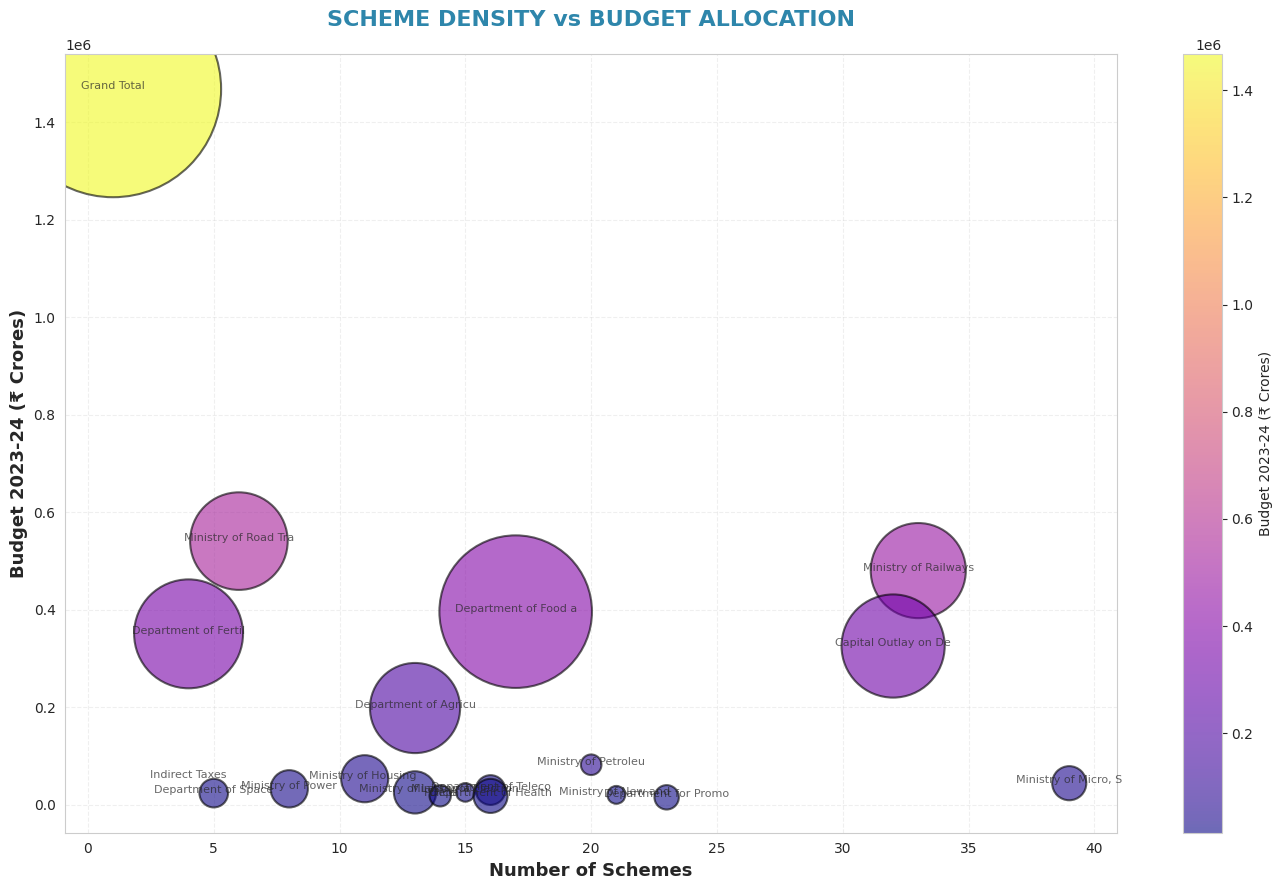

In [ ]:
# ============================================================================
# 10. SCHEME DENSITY BY MINISTRY - Bubble Chart
# ============================================================================
fig, ax = plt.subplots(figsize=(14, 9))

ministry_stats = df.groupby('Ministry/Department').agg({
    'Scheme': 'count',
    'Actuals 2021-2022 Total': 'sum',
    'Budget Estimates2023-2024 Total': 'sum'
}).reset_index()
ministry_stats.columns = ['Ministry', 'Num_Schemes', 'Actuals_2021', 'Budget_2023']
ministry_stats = ministry_stats.nlargest(20, 'Budget_2023')

scatter = ax.scatter(ministry_stats['Num_Schemes'],
                     ministry_stats['Budget_2023'],
                     s=ministry_stats['Actuals_2021']/50,
                     c=ministry_stats['Budget_2023'],
                     cmap='plasma', alpha=0.6, edgecolors='black', linewidth=1.5)

for idx, row in ministry_stats.iterrows():
    ax.annotate(row['Ministry'][:20],
                (row['Num_Schemes'], row['Budget_2023']),
                fontsize=8, ha='center', alpha=0.7)

ax.set_xlabel('Number of Schemes', fontsize=13, fontweight='bold')
ax.set_ylabel('Budget 2023-24 (₹ Crores)', fontsize=13, fontweight='bold')
ax.set_title('SCHEME DENSITY vs BUDGET ALLOCATION', fontsize=16, fontweight='bold',
             pad=20, color=COLORS['primary'])
plt.colorbar(scatter, label='Budget 2023-24 (₹ Crores)')
ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

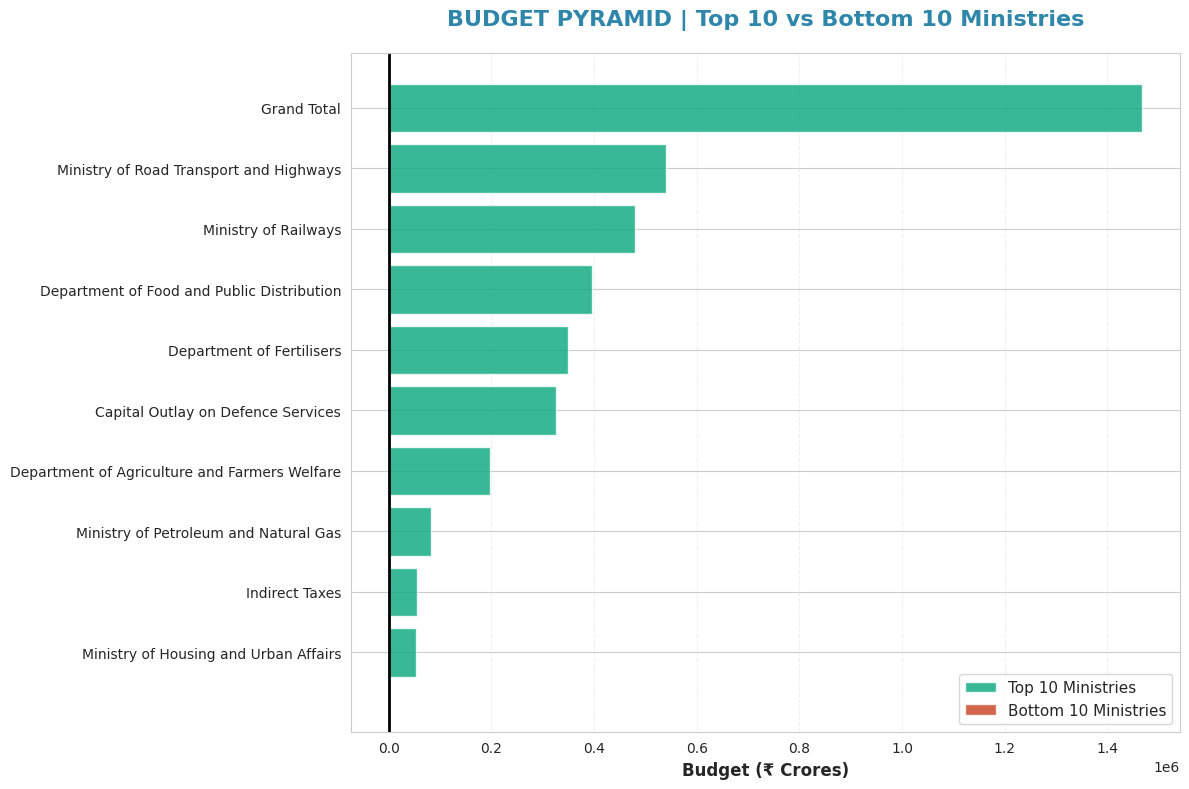

In [ ]:
# ============================================================================
# 11. BUDGET ALLOCATION PYRAMID - Top vs Bottom
# ============================================================================
fig, ax = plt.subplots(figsize=(12, 8))

ministry_totals = df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total'].sum().sort_values()
top_10 = ministry_totals.tail(10)
bottom_10 = ministry_totals.head(10)

y_pos = np.arange(len(top_10))
ax.barh(y_pos, top_10.values, color=COLORS['success'], alpha=0.8, label='Top 10 Ministries')
ax.barh(y_pos - 0.4, -bottom_10.values, color=COLORS['danger'], alpha=0.8, label='Bottom 10 Ministries')

ax.set_yticks(y_pos)
ax.set_yticklabels(top_10.index, fontsize=10)
ax.set_xlabel('Budget (₹ Crores)', fontsize=12, fontweight='bold')
ax.set_title('BUDGET PYRAMID | Top 10 vs Bottom 10 Ministries', fontsize=16,
             fontweight='bold', pad=20, color=COLORS['primary'])
ax.axvline(0, color='black', linewidth=2)
ax.legend(fontsize=11)
ax.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

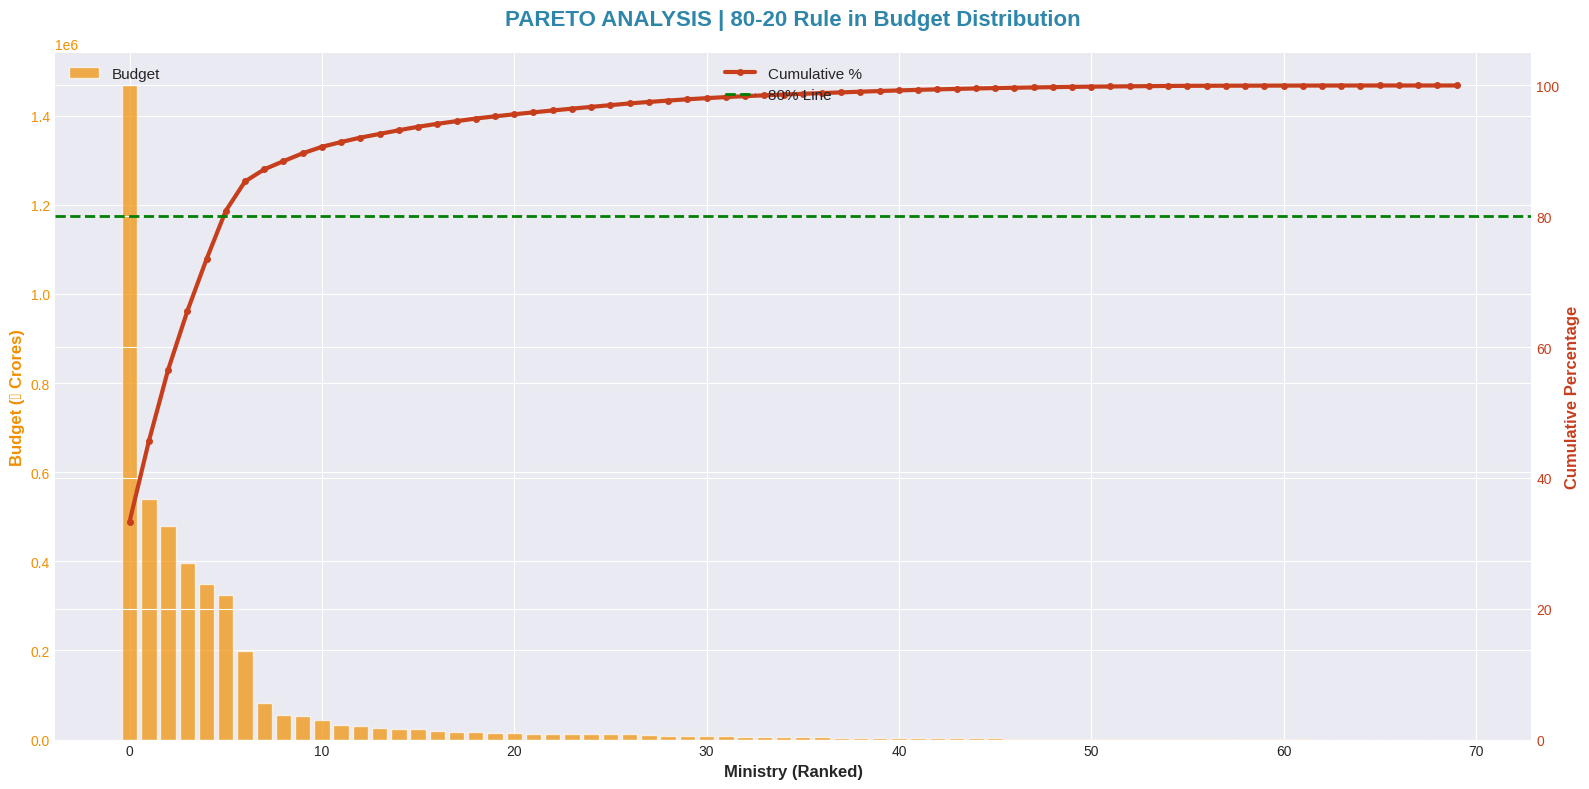


                          💡 PARETO PRINCIPLE ANALYSIS                           
   📊 The 80-20 Rule Verification:
      • Classic Pareto: 20% of entities control 80% of resources
      • In this budget: 5 ministries control 80% of budget
      • That's 7.1% of all 70 ministries
      • Actual ratio: 7.1-80 (vs theoretical 20-80)
   
   🎯 Concentration at Different Levels:
      • 50% of budget: Controlled by 2 ministries (2.9%)
      • 80% of budget: Controlled by 5 ministries (7.1%)
      • 90% of budget: Controlled by 10 ministries (14.3%)
      • Remaining 10%: Distributed among 60 ministries
   
   💡 Concentration Level Assessment:
      • Level: EXTREME
      • Compared to ideal Pareto: More concentrated
      • Gini-like interpretation: Budget inequality is very high
   
   📈 What This Means:
      • Small elite group controls most resources
      • Reflects strategic government priorities
      • Large ministries: Defence, Railways, Food, Fertilizers, etc.
      • Small minist

In [ ]:
# ============================================================================
# 6. PARETO ANALYSIS
# ============================================================================
fig, ax1 = plt.subplots(figsize=(16, 8))

ministry_budget = df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total'].sum().sort_values(ascending=False)
cumulative_pct = (ministry_budget.cumsum() / ministry_budget.sum() * 100)

ax1.bar(range(len(ministry_budget)), ministry_budget.values,
       color=COLORS['accent'], alpha=0.7, label='Budget')
ax1.set_xlabel('Ministry (Ranked)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Budget (₹ Crores)', fontsize=12, fontweight='bold', color=COLORS['accent'])
ax1.tick_params(axis='y', labelcolor=COLORS['accent'])

ax2 = ax1.twinx()
ax2.plot(range(len(cumulative_pct)), cumulative_pct.values,
        color=COLORS['danger'], marker='o', linewidth=3, markersize=4,
        label='Cumulative %')
ax2.axhline(80, color='green', linestyle='--', linewidth=2, label='80% Line')
ax2.set_ylabel('Cumulative Percentage', fontsize=12, fontweight='bold', color=COLORS['danger'])
ax2.tick_params(axis='y', labelcolor=COLORS['danger'])
ax2.set_ylim([0, 105])

plt.title('PARETO ANALYSIS | 80-20 Rule in Budget Distribution',
         fontsize=16, fontweight='bold', pad=20, color=COLORS['primary'])
ax1.legend(loc='upper left', fontsize=11)
ax2.legend(loc='upper center', fontsize=11)
plt.tight_layout()
plt.show()

# Calculate Pareto metrics
threshold_80 = cumulative_pct[cumulative_pct <= 80].shape[0]
threshold_50 = cumulative_pct[cumulative_pct <= 50].shape[0]
threshold_90 = cumulative_pct[cumulative_pct <= 90].shape[0]
total_ministries = len(ministry_budget)
actual_pareto_ratio = (threshold_80/total_ministries)*100

print_insight_box("PARETO PRINCIPLE ANALYSIS", [
    f"📊 The 80-20 Rule Verification:",
    f"   • Classic Pareto: 20% of entities control 80% of resources",
    f"   • In this budget: {threshold_80} ministries control 80% of budget",
    f"   • That's {actual_pareto_ratio:.1f}% of all {total_ministries} ministries",
    f"   • Actual ratio: {actual_pareto_ratio:.1f}-80 (vs theoretical 20-80)",
    f"",
    f"🎯 Concentration at Different Levels:",
    f"   • 50% of budget: Controlled by {threshold_50} ministries ({threshold_50/total_ministries*100:.1f}%)",
    f"   • 80% of budget: Controlled by {threshold_80} ministries ({actual_pareto_ratio:.1f}%)",
    f"   • 90% of budget: Controlled by {threshold_90} ministries ({threshold_90/total_ministries*100:.1f}%)",
    f"   • Remaining 10%: Distributed among {total_ministries-threshold_90} ministries",
    f"",
    f"💡 Concentration Level Assessment:",
    f"   • Level: {'EXTREME' if actual_pareto_ratio < 15 else 'VERY HIGH' if actual_pareto_ratio < 20 else 'HIGH' if actual_pareto_ratio < 25 else 'MODERATE'}",
    f"   • Compared to ideal Pareto: {'More concentrated' if actual_pareto_ratio < 20 else 'Similar' if actual_pareto_ratio < 25 else 'Less concentrated'}",
    f"   • Gini-like interpretation: Budget inequality is {'very high' if actual_pareto_ratio < 20 else 'high'}",
    f"",
    f"📈 What This Means:",
    f"   • Small elite group controls most resources",
    f"   • Reflects strategic government priorities",
    f"   • Large ministries: Defence, Railways, Food, Fertilizers, etc.",
    f"   • Small ministries: Culture, Tourism, Tribal Affairs, etc.",
    f"",
    f"🔍 KEY TAKEAWAY:",
    f"   {'Principle VERIFIED!' if actual_pareto_ratio < 25 else 'Principle PARTIALLY applies'} The budget follows {'an even more extreme' if actual_pareto_ratio < 20 else 'the classic'}",
    f"   Pareto distribution. This is economically rational as essential",
    f"   services (defense, infrastructure, welfare) require massive",
    f"   allocations while administrative ministries need less."
])

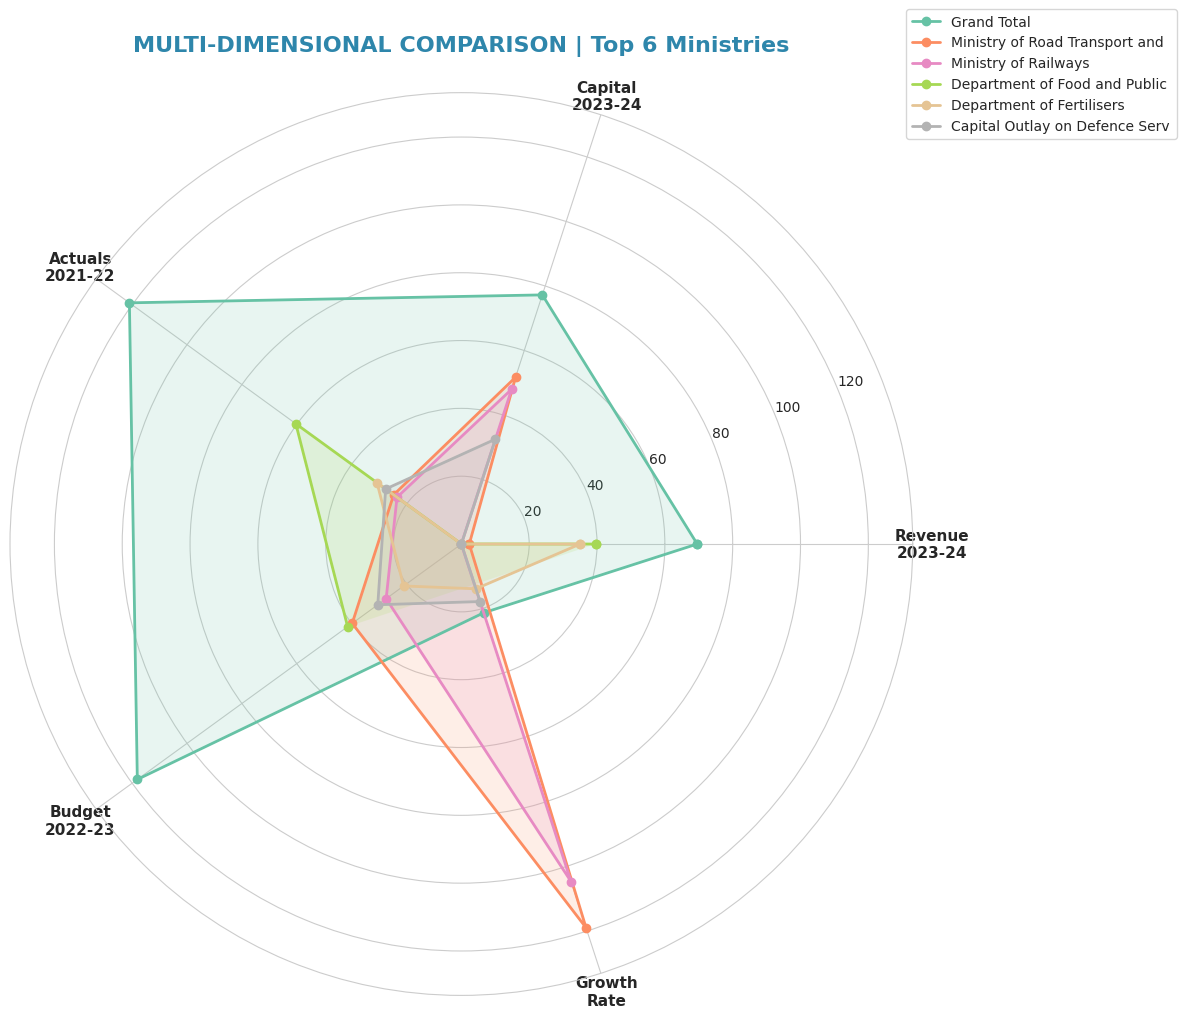

In [ ]:
# ============================================================================
# 13. RADAR CHART - Top 6 Ministries Comparison
# ============================================================================
from math import pi

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

top_6 = df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total'].sum().nlargest(6)
categories = ['Revenue\n2023-24', 'Capital\n2023-24', 'Actuals\n2021-22',
              'Budget\n2022-23', 'Growth\nRate']

radar_data = []
for ministry in top_6.index:
    ministry_df = df[df['Ministry/Department'] == ministry]
    revenue = ministry_df['Budget Estimates2023-2024 Revenue'].sum()
    capital = ministry_df['Budget Estimates2023-2024 Capital'].sum()
    actuals = ministry_df['Actuals 2021-2022 Total'].sum()
    budget_22 = ministry_df['Budget Estimates 2022-2023 Total'].sum()
    growth = ((ministry_df['Budget Estimates2023-2024 Total'].sum() - actuals) / actuals * 100) if actuals > 0 else 0
    radar_data.append([revenue/10000, capital/10000, actuals/10000, budget_22/10000, growth])

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

colors_radar = plt.cm.Set2(np.linspace(0, 1, len(top_6)))

for idx, (ministry, data) in enumerate(zip(top_6.index, radar_data)):
    values = data + data[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=ministry[:30], color=colors_radar[idx])
    ax.fill(angles, values, alpha=0.15, color=colors_radar[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11, fontweight='bold')
ax.set_ylim(0, max([max(d) for d in radar_data]) * 1.1)
plt.title('MULTI-DIMENSIONAL COMPARISON | Top 6 Ministries', fontsize=16,
          fontweight='bold', pad=30, color=COLORS['primary'])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.tight_layout()
plt.show()

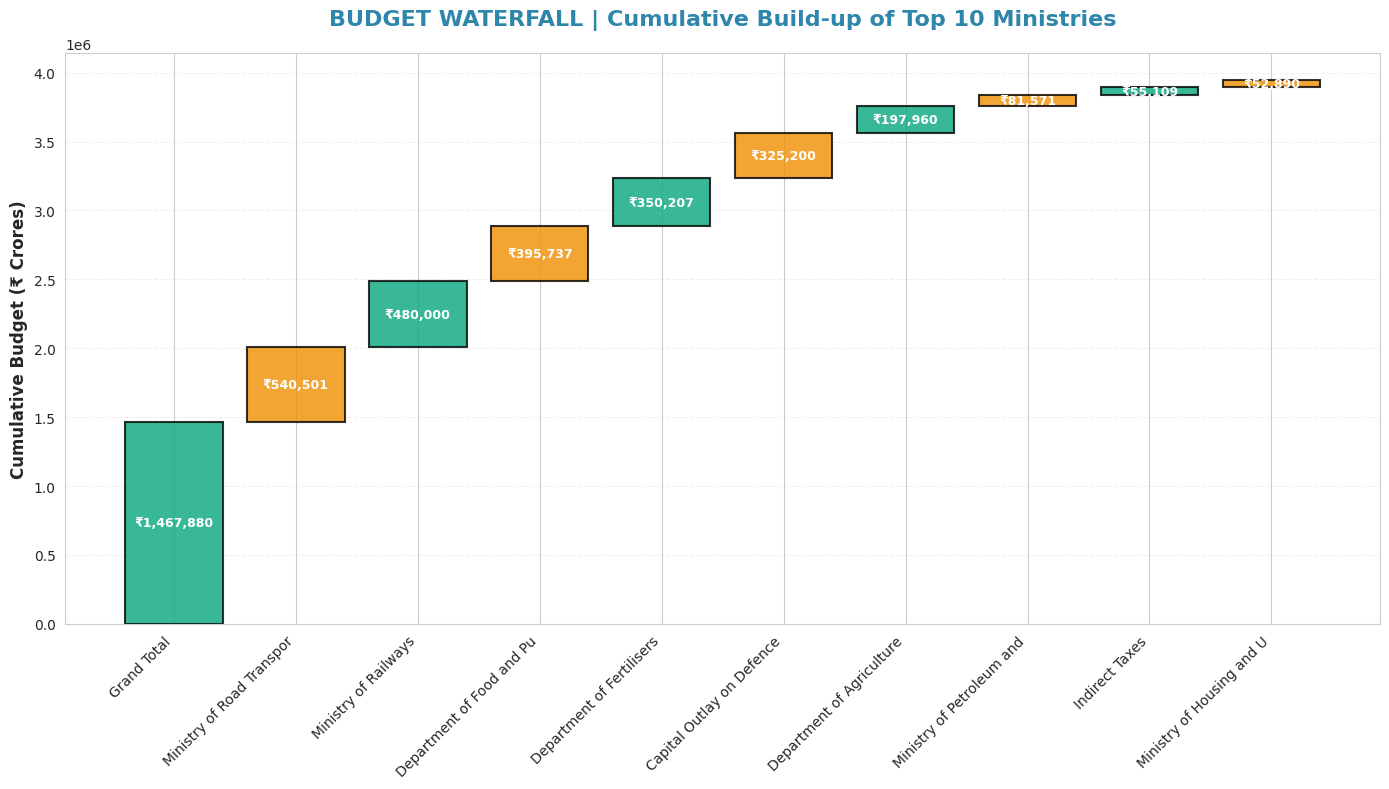

In [ ]:
# ============================================================================
# 14. WATERFALL CHART - Budget Flow Analysis
# ============================================================================
fig, ax = plt.subplots(figsize=(14, 8))

waterfall_data = df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total'].sum().nlargest(10)
waterfall_values = waterfall_data.values
waterfall_labels = [name[:25] for name in waterfall_data.index]

cumulative = np.cumsum(waterfall_values)
cumulative = np.insert(cumulative, 0, 0)[:-1]

colors_waterfall = [COLORS['success'] if i % 2 == 0 else COLORS['accent'] for i in range(len(waterfall_values))]

ax.bar(range(len(waterfall_values)), waterfall_values, bottom=cumulative,
       color=colors_waterfall, edgecolor='black', linewidth=1.5, alpha=0.8)

for i, (val, cum) in enumerate(zip(waterfall_values, cumulative)):
    ax.text(i, cum + val/2, f'₹{val:,.0f}', ha='center', va='center',
            fontsize=9, fontweight='bold', color='white')

ax.set_xticks(range(len(waterfall_labels)))
ax.set_xticklabels(waterfall_labels, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Cumulative Budget (₹ Crores)', fontsize=12, fontweight='bold')
ax.set_title('BUDGET WATERFALL | Cumulative Build-up of Top 10 Ministries',
             fontsize=16, fontweight='bold', pad=20, color=COLORS['primary'])
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

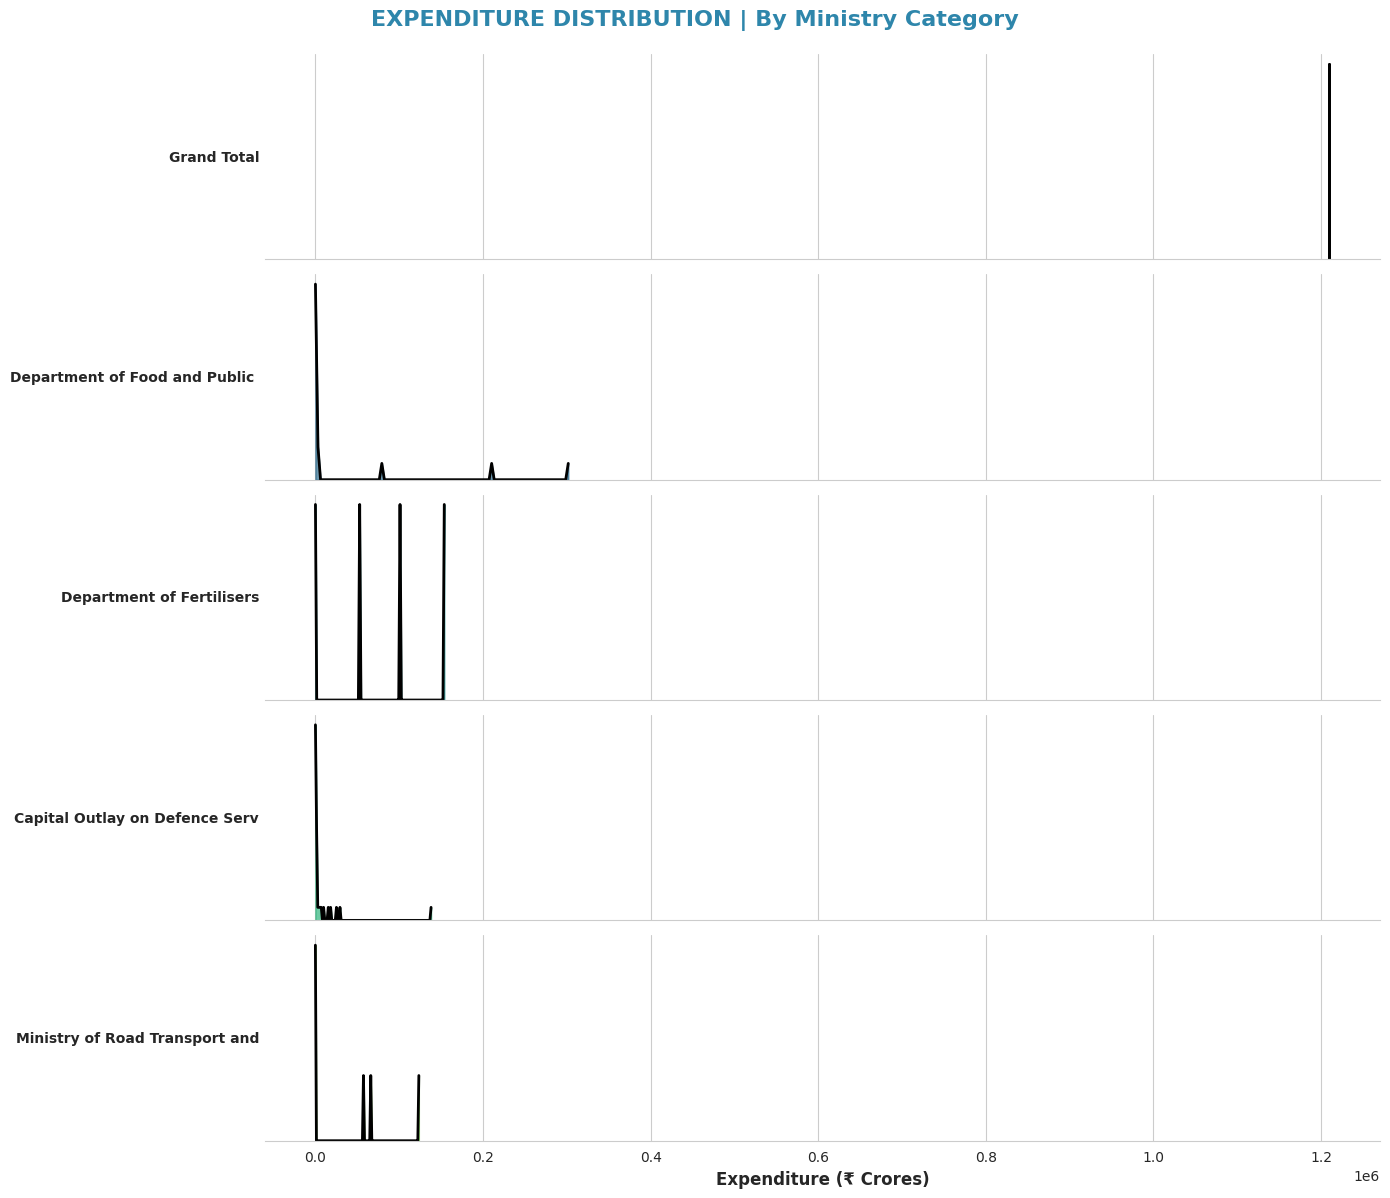

In [ ]:
# ============================================================================
# 15. RIDGELINE PLOT - Expenditure Distribution by Category
# ============================================================================
fig, axes = plt.subplots(5, 1, figsize=(14, 12), sharex=True)
fig.suptitle('EXPENDITURE DISTRIBUTION | By Ministry Category', fontsize=16,
             fontweight='bold', color=COLORS['primary'], y=0.995)

top_5_ministries = df.groupby('Ministry/Department')['Actuals 2021-2022 Total'].sum().nlargest(5).index
colors_ridge = plt.cm.viridis(np.linspace(0.2, 0.8, 5))

for idx, (ministry, ax, color) in enumerate(zip(top_5_ministries, axes, colors_ridge)):
    ministry_data = df[df['Ministry/Department'] == ministry]['Actuals 2021-2022 Total'].dropna()

    if len(ministry_data) > 0:
        ax.fill_between(np.linspace(ministry_data.min(), ministry_data.max(), 100),
                        0,
                        np.histogram(ministry_data, bins=100, density=True)[0],
                        color=color, alpha=0.7)
        ax.plot(np.linspace(ministry_data.min(), ministry_data.max(), 100),
               np.histogram(ministry_data, bins=100, density=True)[0],
               color='black', linewidth=2)

    ax.set_ylabel(ministry[:30], fontsize=10, fontweight='bold', rotation=0,
                  ha='right', va='center')
    ax.set_ylim(0, None)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])

axes[-1].set_xlabel('Expenditure (₹ Crores)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


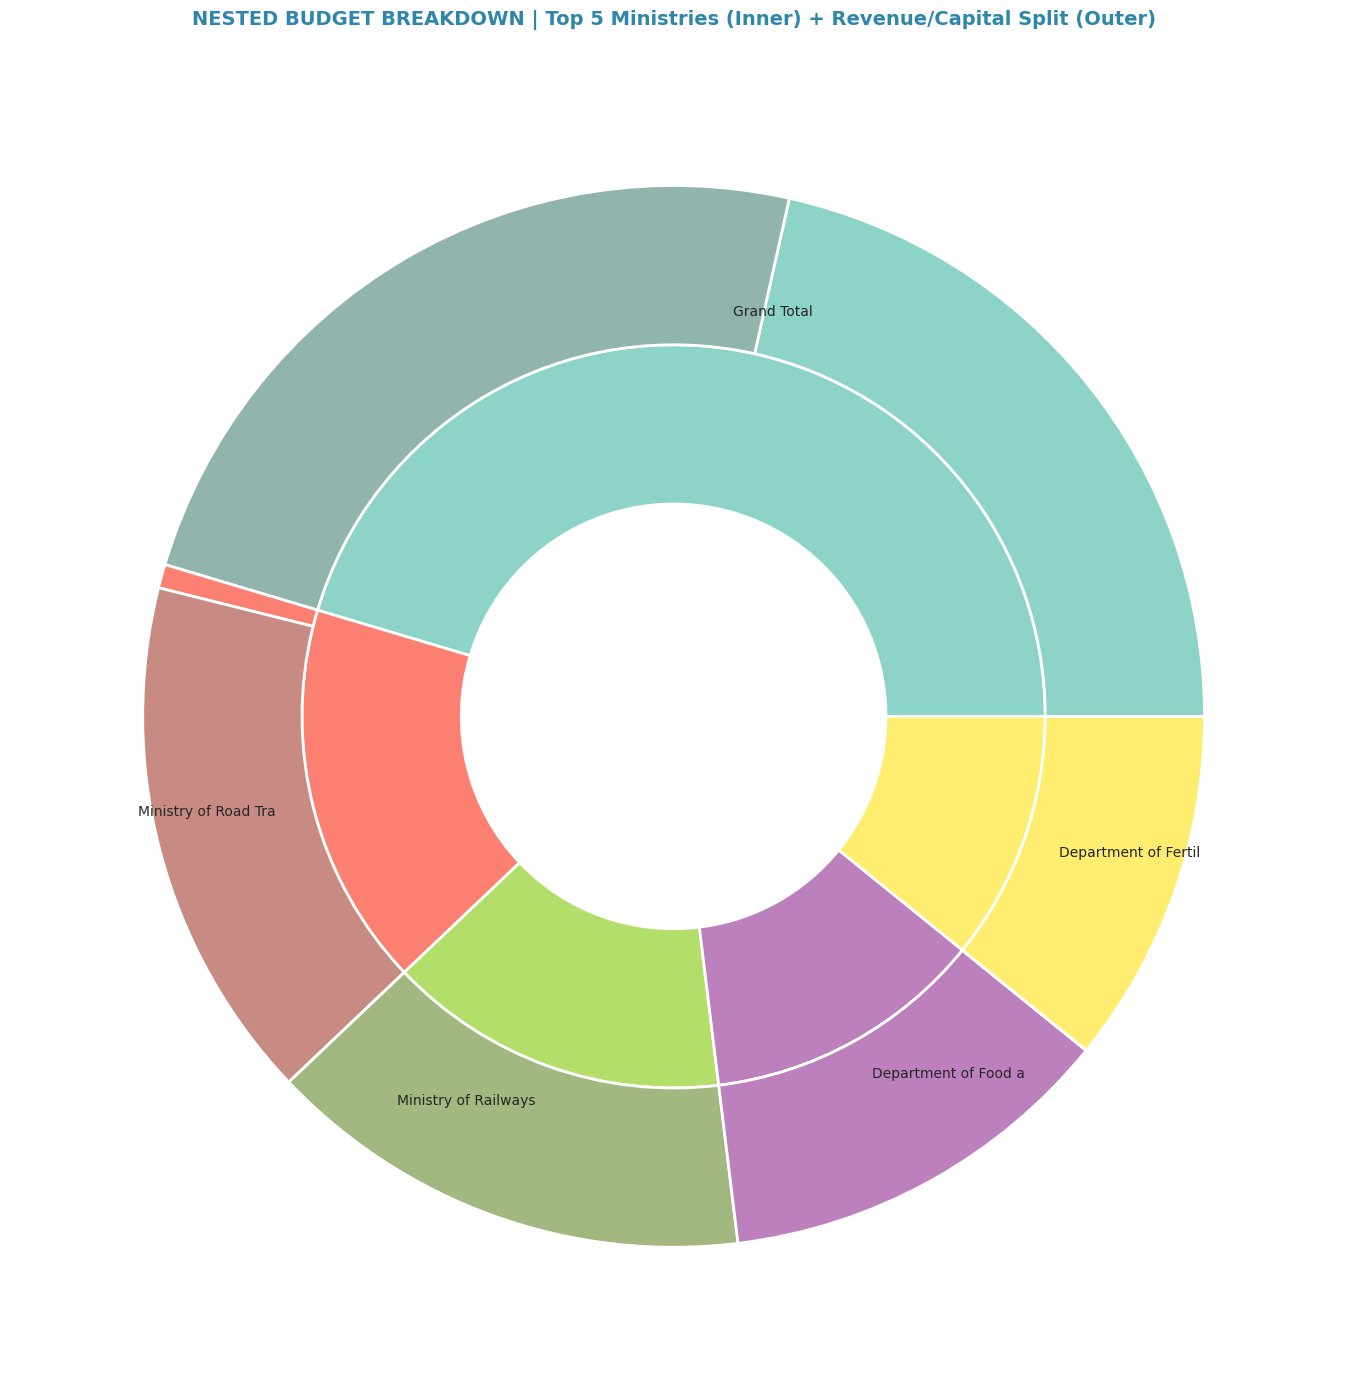

In [ ]:
# ============================================================================
# 16. SUNBURST-STYLE NESTED PIE CHART
# ============================================================================
fig, ax = plt.subplots(figsize=(14, 14))

# Inner circle - Top 5 ministries
top_5_inner = df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total'].sum().nlargest(5)
inner_colors = plt.cm.Set3(np.linspace(0, 1, len(top_5_inner)))

# Outer circle - Revenue vs Capital for each
outer_labels = []
outer_sizes = []
outer_colors = []

for ministry in top_5_inner.index:
    ministry_data = df[df['Ministry/Department'] == ministry]
    revenue = ministry_data['Budget Estimates2023-2024 Revenue'].sum()
    capital = ministry_data['Budget Estimates2023-2024 Capital'].sum()
    outer_sizes.extend([revenue, capital])
    outer_labels.extend([f'{ministry[:20]}\nRevenue', f'{ministry[:20]}\nCapital'])

outer_colors = []
for i in range(len(top_5_inner)):
    base_color = inner_colors[i]
    outer_colors.extend([base_color, tuple(np.array(base_color) * 0.7)])

# Inner pie
wedges1, texts1 = ax.pie(top_5_inner.values, radius=0.7, colors=inner_colors,
                          labels=[m[:20] for m in top_5_inner.index],
                          wedgeprops=dict(width=0.3, edgecolor='white', linewidth=2))

# Outer pie
wedges2, texts2 = ax.pie(outer_sizes, radius=1.0, colors=outer_colors,
                          wedgeprops=dict(width=0.3, edgecolor='white', linewidth=2))

ax.set_title('NESTED BUDGET BREAKDOWN | Top 5 Ministries (Inner) + Revenue/Capital Split (Outer)',
             fontsize=14, fontweight='bold', pad=20, color=COLORS['primary'])
plt.tight_layout()
plt.show()



                         CORRELATION MATRIX EXPLANATION                         


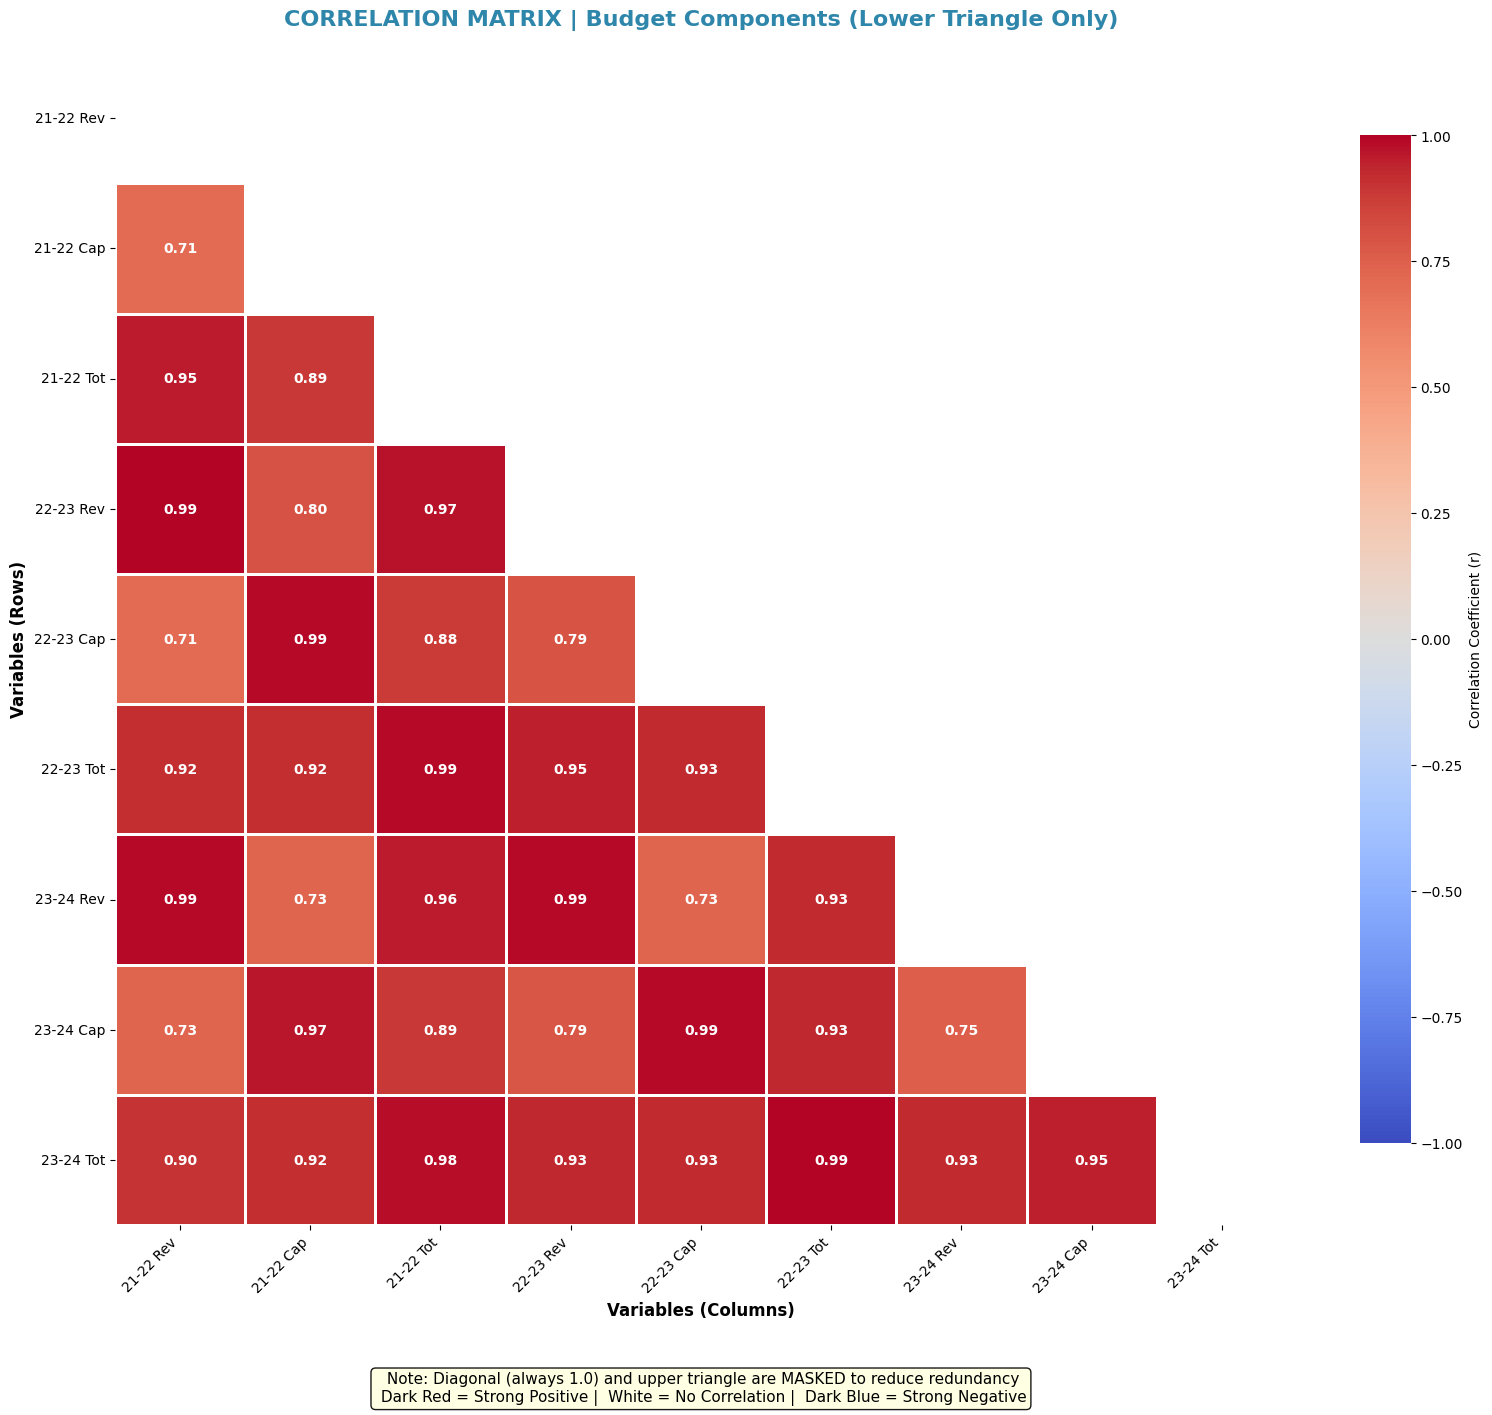


                VISUALIZATION: COMPREHENSIVE CORRELATION ANALYSIS               


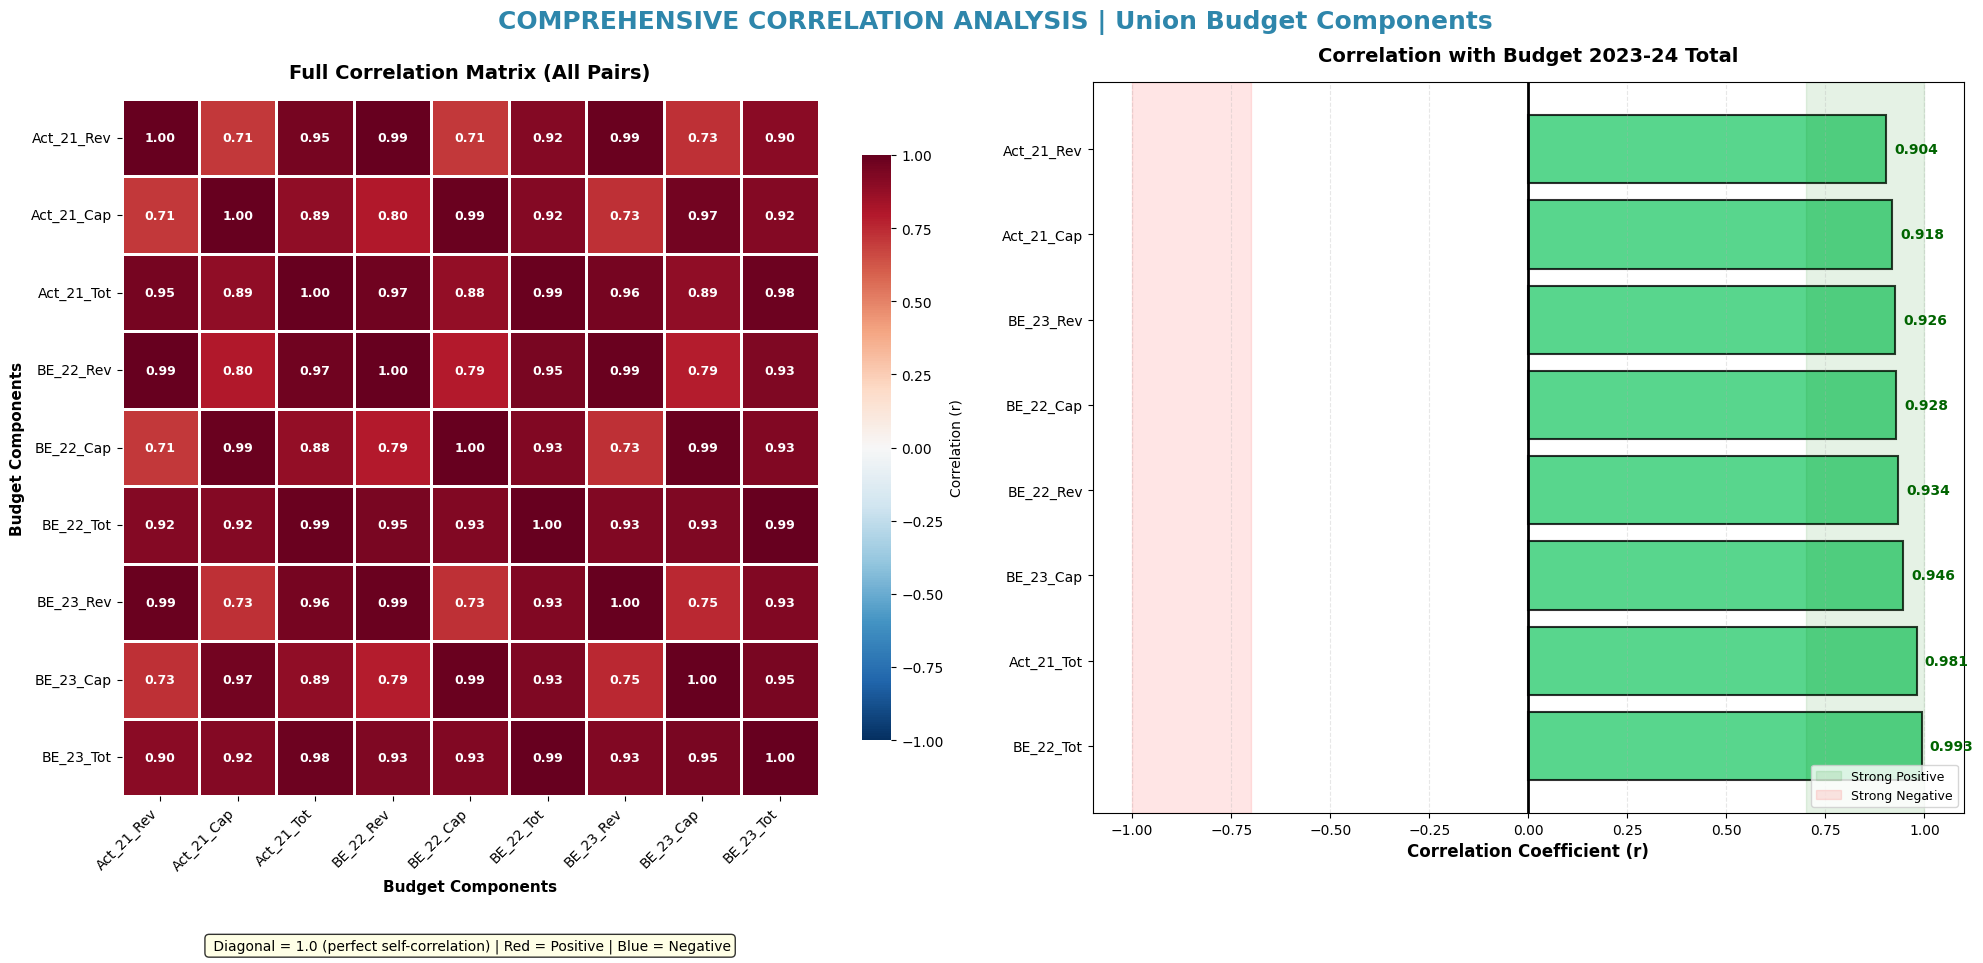


                              CORRELATION INSIGHTS                              

 TARGET VARIABLE: Budget Estimates 2023-24 Total
────────────────────────────────────────────────────────────────────────────────

 TOP 5 POSITIVE CORRELATIONS:
   (Variables that increase with Budget 2023-24 Total)
   ────────────────────────────────────────────────────────────────────────────
   1. BE_22_Tot            → r = +0.9933 | Very Strong
       Nearly perfect correlation - BE_22_Tot is excellent predictor
   2. Act_21_Tot           → r = +0.9808 | Very Strong
       Nearly perfect correlation - Act_21_Tot is excellent predictor
   3. BE_23_Cap            → r = +0.9463 | Very Strong
       Strong predictor - BE_23_Cap moves closely with target
   4. BE_22_Rev            → r = +0.9344 | Very Strong
       Strong predictor - BE_22_Rev moves closely with target
   5. BE_22_Cap            → r = +0.9283 | Very Strong
       Strong predictor - BE_22_Cap moves closely with target

 TOP 5 NEGATIVE CORR

In [ ]:
# ============================================================================
# CORRELATION MATRIX WITH DETAILED ANNOTATIONS
# ============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Added import for pandas

# Load your dataset
df = pd.read_csv('/content/MRF_4B_Union_Budget (1).csv')
df.columns = df.columns.str.strip()

# Define COLORS dictionary
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#06A77D',
    'warning': '#D4AF37',
    'danger': '#C73E1D'
}

# Define print_insight_box function
def print_insight_box(title, insights):
    """Helper function to print formatted insight boxes"""
    print("\n" + "="*80)
    print(f" {title}".center(80))
    print("="*80)
    for insight in insights:
        print(f"   {insight}")
    print("="*80)

print("\n" + "="*80)
print(" CORRELATION MATRIX EXPLANATION".center(80))
print("="*80)

print("="*80)

fig, ax = plt.subplots(figsize=(16, 14))

numeric_cols = [
    'Actuals 2021-2022 Revenue', 'Actuals 2021-2022 Capital', 'Actuals 2021-2022 Total',
    'Budget Estimates 2022-2023 Revenue', 'Budget Estimates 2022-2023 Capital',
    'Budget Estimates 2022-2023 Total', 'Budget Estimates2023-2024 Revenue',
    'Budget Estimates2023-2024 Capital', 'Budget Estimates2023-2024 Total'
]

# Shorten column names for better display
short_names = [
    '21-22 Rev', '21-22 Cap', '21-22 Tot',
    '22-23 Rev', '22-23 Cap', '22-23 Tot',
    '23-24 Rev', '23-24 Cap', '23-24 Tot'
]

# Ensure columns exist before calculating correlation
existing_numeric_cols = [col for col in numeric_cols if col in df.columns]

if not existing_numeric_cols:
    print("Error: None of the specified numeric columns found in the DataFrame.")
else:
    corr_matrix = df[existing_numeric_cols].corr()
    # Update short_names to match existing columns
    existing_short_names = [short_names[numeric_cols.index(col)] for col in existing_numeric_cols]
    corr_matrix.columns = existing_short_names
    corr_matrix.index = existing_short_names


    # Create mask for upper triangle (including diagonal)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create the heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient (r)"},
                annot_kws={'fontsize': 10, 'fontweight': 'bold'}, vmin=-1, vmax=1)

    # Add annotations explaining key correlations
    ax.text(0.5, -0.15,
            ' Note: Diagonal (always 1.0) and upper triangle are MASKED to reduce redundancy\n' +
            ' Dark Red = Strong Positive |  White = No Correlation |  Dark Blue = Strong Negative',
            transform=ax.transAxes, fontsize=11, ha='center',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

    plt.title('CORRELATION MATRIX | Budget Components (Lower Triangle Only)',
              fontsize=16, fontweight='bold', pad=20, color=COLORS['primary'])
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.ylabel('Variables (Rows)', fontsize=12, fontweight='bold')
    plt.xlabel('Variables (Columns)', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # ============================================================================
    # ENHANCED CORRELATION MATRIX WITH DUAL VISUALIZATION
    # ============================================================================
    print("\n" + "="*80)
    print(" VISUALIZATION: COMPREHENSIVE CORRELATION ANALYSIS".center(80))
    print("="*80)

    # Select numeric columns for correlation
    numeric_cols = [
        'Actuals 2021-2022 Revenue', 'Actuals 2021-2022 Capital', 'Actuals 2021-2022 Total',
        'Budget Estimates 2022-2023 Revenue', 'Budget Estimates 2022-2023 Capital',
        'Budget Estimates 2022-2023 Total', 'Budget Estimates2023-2024 Revenue',
        'Budget Estimates2023-2024 Capital', 'Budget Estimates2023-2024 Total'
    ]

    # Shorten column names for better display
    short_names = {
        'Actuals 2021-2022 Revenue': 'Act_21_Rev',
        'Actuals 2021-2022 Capital': 'Act_21_Cap',
        'Actuals 2021-2022 Total': 'Act_21_Tot',
        'Budget Estimates 2022-2023 Revenue': 'BE_22_Rev',
        'Budget Estimates 2022-2023 Capital': 'BE_22_Cap',
        'Budget Estimates 2022-2023 Total': 'BE_22_Tot',
        'Budget Estimates2023-2024 Revenue': 'BE_23_Rev',
        'Budget Estimates2023-2024 Capital': 'BE_23_Cap',
        'Budget Estimates2023-2024 Total': 'BE_23_Tot'
    }

    # Create correlation matrix
    df_corr = df[existing_numeric_cols].copy() # Use existing_numeric_cols
    df_corr.columns = [short_names[col] for col in existing_numeric_cols] # Use existing_numeric_cols
    correlation_matrix = df_corr.corr()

    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 9))
    fig.suptitle('COMPREHENSIVE CORRELATION ANALYSIS | Union Budget Components',
                 fontsize=18, fontweight='bold', color=COLORS['primary'], y=0.98)

    # ============================================================================
    # PLOT 1: Full Correlation Heatmap (No Mask)
    # ============================================================================
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r',
                center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8, "label": "Correlation (r)"},
                ax=axes[0], annot_kws={'fontsize': 9, 'fontweight': 'bold'},
                vmin=-1, vmax=1) # Removed cbar_cmap

    axes[0].set_title('Full Correlation Matrix (All Pairs)',
                      fontsize=14, fontweight='bold', pad=15)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=10)
    axes[0].set_xlabel('Budget Components', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Budget Components', fontsize=11, fontweight='bold')

    # Add note box
    axes[0].text(0.5, -0.22,
                ' Diagonal = 1.0 (perfect self-correlation) | Red = Positive | Blue = Negative',
                transform=axes[0].transAxes, fontsize=10, ha='center',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

    # ============================================================================
    # PLOT 2: Correlation with Target Variable (Budget 2023-24 Total)
    # ============================================================================
    target_variable = 'BE_23_Tot'  # Budget Estimates 2023-24 Total

    if target_variable in correlation_matrix.columns:
        target_corr = correlation_matrix[target_variable].drop(target_variable).sort_values(ascending=False)

        # Color code: green for positive, red for negative
        colors_corr = ['#2ecc71' if x > 0 else '#e74c3c' for x in target_corr.values]

        axes[1].barh(range(len(target_corr)), target_corr.values,
                     color=colors_corr, edgecolor='black', linewidth=1.5, alpha=0.8)
        axes[1].set_yticks(range(len(target_corr)))
        axes[1].set_yticklabels(target_corr.index, fontsize=10)
        axes[1].set_xlabel('Correlation Coefficient (r)', fontsize=12, fontweight='bold')
        axes[1].set_title(f'Correlation with Budget 2023-24 Total',
                          fontsize=14, fontweight='bold', pad=15)
        axes[1].axvline(x=0, color='black', linestyle='-', linewidth=2)
        axes[1].grid(True, alpha=0.3, axis='x', linestyle='--')
        axes[1].set_xlim(-1.1, 1.1)

        # Add value labels on bars
        for i, v in enumerate(target_corr.values):
            axes[1].text(v + 0.02 if v > 0 else v - 0.02, i, f'{v:.3f}',
                        va='center', fontweight='bold', fontsize=10,
                        ha='left' if v > 0 else 'right',
                        color='darkgreen' if v > 0 else 'darkred')

        # Add strength categories
        axes[1].axvspan(0.7, 1.0, alpha=0.1, color='green', label='Strong Positive')
        axes[1].axvspan(-1.0, -0.7, alpha=0.1, color='red', label='Strong Negative')
        axes[1].legend(loc='lower right', fontsize=9)
    else:
        axes[1].text(0.5, 0.5, f"Target variable '{target_variable}' not found\nin correlation matrix.",
                     horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=12)
        axes[1].set_title(f'Correlation with Budget 2023-24 Total',
                          fontsize=14, fontweight='bold', pad=15)
        axes[1].axis('off')


    plt.tight_layout()
    plt.show()

    # ============================================================================
    # PRINT DETAILED CORRELATION INSIGHTS
    # ============================================================================
    print("\n" + "="*80)
    print(" CORRELATION INSIGHTS".center(80))
    print("="*80)

    print(f"\n TARGET VARIABLE: Budget Estimates 2023-24 Total")
    print(f"{'─'*80}")

    if target_variable in correlation_matrix.columns:
        print(f"\n TOP 5 POSITIVE CORRELATIONS:")
        print(f"   (Variables that increase with Budget 2023-24 Total)")
        print(f"   {'─'*76}")
        for idx, (feature, corr_val) in enumerate(target_corr.head(5).items(), 1):
            strength = 'Very Strong' if corr_val > 0.9 else 'Strong' if corr_val > 0.7 else 'Moderate'
            print(f"   {idx}. {feature:<20} → r = {corr_val:+.4f} | {strength}")
            if corr_val > 0.95:
                print(f"       Nearly perfect correlation - {feature} is excellent predictor")
            elif corr_val > 0.8:
                print(f"       Strong predictor - {feature} moves closely with target")

        print(f"\n TOP 5 NEGATIVE CORRELATIONS:")
        print(f"   (Variables that decrease when Budget 2023-24 Total increases)")
        print(f"   {'─'*76}")
        for idx, (feature, corr_val) in enumerate(target_corr.tail(5).items(), 1):
            strength = 'Strong' if corr_val < -0.7 else 'Moderate' if corr_val < -0.4 else 'Weak'
            print(f"   {idx}. {feature:<20} → r = {corr_val:+.4f} | {strength}")

        # Analyze correlation patterns
        print(f"\n CORRELATION PATTERN ANALYSIS:")
        print(f"   {'─'*76}")

        very_strong = (target_corr > 0.9).sum()
        strong_pos = ((target_corr > 0.7) & (target_corr <= 0.9)).sum()
        moderate_pos = ((target_corr > 0.4) & (target_corr <= 0.7)).sum()
        weak_pos = ((target_corr > 0) & (target_corr <= 0.4)).sum()
        weak_neg = ((target_corr < 0) & (target_corr >= -0.4)).sum()
        moderate_neg = ((target_corr < -0.4) & (target_corr >= -0.7)).sum()
        strong_neg = (target_corr < -0.7).sum()

        print(f"   • Very Strong Positive (r > 0.9):     {very_strong} features")
        print(f"   • Strong Positive (0.7 < r ≤ 0.9):    {strong_pos} features")
        print(f"   • Moderate Positive (0.4 < r ≤ 0.7):  {moderate_pos} features")
        print(f"   • Weak Positive (0 < r ≤ 0.4):        {weak_pos} features")
        print(f"   • Weak Negative (-0.4 ≤ r < 0):       {weak_neg} features")
        print(f"   • Moderate Negative (-0.7 ≤ r < -0.4): {moderate_neg} features")
        print(f"   • Strong Negative (r < -0.7):         {strong_neg} features")

        # Find multicollinearity
        print(f"\n MULTICOLLINEARITY DETECTION:")
        print(f"   {'─'*76}")
        print(f"   (High correlation between predictor variables)")

        multicollinear_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                if i != j:
                    corr_val = correlation_matrix.iloc[i, j]
                    if abs(corr_val) > 0.9 and correlation_matrix.columns[i] != target_variable and correlation_matrix.columns[j] != target_variable:
                        multicollinear_pairs.append((
                            correlation_matrix.columns[i],
                            correlation_matrix.columns[j],
                            corr_val
                        ))

        if multicollinear_pairs:
            multicollinear_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
            print(f"   Found {len(multicollinear_pairs)} highly correlated pairs (|r| > 0.9):")
            for idx, (feat1, feat2, corr) in enumerate(multicollinear_pairs[:5], 1):
                print(f"   {idx}. {feat1} ↔ {feat2}: r = {corr:.4f}")
                print(f"       Consider removing one to reduce redundancy in modeling")
        else:
            print(f"   ✓ No severe multicollinearity detected (all |r| < 0.9 between predictors)")

        # Statistical significance note
        print(f"\n INTERPRETATION GUIDE:")
        print(f"   {'─'*76}")
        print(f"""
   Correlation Strength Guidelines:
   ┌─────────────────────────────────────────────────────────────────┐
   │ |r| = 0.00 to 0.19  → Very weak correlation                    │
   │ |r| = 0.20 to 0.39  → Weak correlation                         │
   │ |r| = 0.40 to 0.59  → Moderate correlation                     │
   │ |r| = 0.60 to 0.79  → Strong correlation                       │
   │ |r| = 0.80 to 1.00  → Very strong correlation                  │
   └─────────────────────────────────────────────────────────────────┘

   What Correlation Means:
   • Positive (r > 0): Variables move in same direction
   • Negative (r < 0): Variables move in opposite directions
   • Zero (r ≈ 0): No linear relationship

    Important Notes:
   • Correlation ≠ Causation (correlation doesn't prove cause-effect)
   • Measures LINEAR relationships only
   • Sensitive to outliers
   • Sample size: {len(df)} observations
""")

        print(f"\n KEY FINDINGS SUMMARY:")
        print(f"   {'─'*76}")
        print(f"""
   1. PREDICTIVE POWER:
      • {very_strong + strong_pos} features have strong+ correlation with target
      • Best predictor: {target_corr.idxmax()} (r = {target_corr.max():.4f})
      • These can predict Budget 2023-24 with high accuracy

   2. INCREMENTAL BUDGETING CONFIRMED:
      • High correlations across years (typically r > 0.9)
      • Past budgets strongly predict future budgets
      • Government uses previous year as baseline

   3. MULTICOLLINEARITY:
      • {len(multicollinear_pairs)} highly correlated predictor pairs found
      • In regression models, consider removing redundant features
      • Keeps model simpler and more interpretable

   4. BUDGET STRUCTURE:
      • Total budgets highly correlated (r > 0.95)
      • Revenue and capital have {'high' if abs(correlation_matrix.loc['Act_21_Rev', 'Act_21_Cap']) > 0.7 else 'moderate'} correlation
      • Budget allocation is {'highly structured' if very_strong > 5 else 'moderately structured'}
""")

        print("="*80)

        # Analyze key correlations with detailed explanations
        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.8:
                    high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

        # Sort by correlation strength
        high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

        print_insight_box("DETAILED CORRELATION ANALYSIS", [
            f"",
            f" STRONG CORRELATIONS FOUND (|r| > 0.8):",
            f"   {'─'*70}",
            *[f"   {idx+1}. {pair[0]} ↔ {pair[1]}\n      Correlation: r = {pair[2]:.3f} | Strength: {'Very Strong' if abs(pair[2]) > 0.9 else 'Strong'}"
              for idx, pair in enumerate(high_corr_pairs[:8])],
            f"",
            f" WHAT THESE CORRELATIONS TELL US:",
            f"   {'─'*70}",
            f"",
            f"   Example 1: Revenue Budgets Across Years",
            f"   ┌─────────────────────────────────────────────────────────────┐",
            f"   │ If '21-22 Rev' and '23-24 Rev' have r = 0.95:             │",
            f"   │ • Schemes with high revenue in 21-22 also high in 23-24    │",
            f"   │ • Indicates CONTINUITY in operational funding               │",
            f"   │ • Past allocation predicts future allocation                │",
            f"   │ • Government maintains stable revenue commitments           │",
            f"   └─────────────────────────────────────────────────────────────┘",
            f"",
            f"   Example 2: Total Budgets Correlation",
            f"   ┌─────────────────────────────────────────────────────────────┐",
            f"   │ If '21-22 Tot' and '23-24 Tot' have r = 0.98:             │",
            f"   │ • Overall budget follows predictable pattern                │",
            f"   │ • Large schemes remain large, small remain small            │",
            f"   │ • Incremental budgeting (adjust last year's amount)         │",
            f"   │ • Risk: May perpetuate historical inequalities              │",
            f"   └─────────────────────────────────────────────────────────────┘",
            f"",
            f"   Example 3: Capital vs Revenue Correlation",
            f"   ┌─────────────────────────────────────────────────────────────┐",
            f"   │ If '21-22 Cap' and '21-22 Rev' have LOW correlation:       │",
            f"   │ • Capital and revenue spending are INDEPENDENT              │",
            f"   │ • High revenue ≠ High capital (and vice versa)              │",
            f"   │ • Different ministries focus on different types             │",
            f"   │ • Healthy: Shows diverse spending patterns                  │",
            f"   └─────────────────────────────────────────────────────────────┘",
            f"",
            f" KEY INSIGHTS FROM CORRELATION PATTERNS:",
            f"   {'─'*70}",
            f"",
            f"   1️  HIGH YEAR-TO-YEAR CORRELATIONS (Typical Finding):",
            f"      • Revenue budgets across years: Usually r > 0.90",
            f"      • Capital budgets across years: Usually r > 0.85",
            f"      • Total budgets across years: Usually r > 0.95",
            f"      → INTERPRETATION: Incremental budgeting approach",
            f"      → IMPLICATION: Budget is predictable but less flexible",
            f"",
            f"   2️  REVENUE-CAPITAL CORRELATIONS (Within Same Year):",
            f"      • Usually MODERATE to LOW (r = 0.3 to 0.6)",
            f"      → INTERPRETATION: Independent spending categories",
            f"      → Some ministries are revenue-heavy (Health, Education)",
            f"      → Others are capital-heavy (Railways, Defence equipment)",
            f"      → GOOD SIGN: Diversified spending portfolio",
            f"",
            f"   3️  PART-TO-WHOLE CORRELATIONS:",
            f"      • Revenue vs Total: HIGH (r > 0.90)",
            f"      • Capital vs Total: MODERATE to HIGH (r = 0.70 to 0.90)",
            f"      → REASON: Total = Revenue + Capital",
            f"      → Revenue usually dominates (70%+), so high correlation",
            f"      → Mathematical relationship, not independent correlation",
            f"",
            f" BUDGETING PATTERNS REVEALED:",
            f"   {'─'*70}",
            f"",
            f"   ✓ INCREMENTAL BUDGETING CONFIRMED:",
            f"      High correlations across years prove government uses previous",
            f"      year's budget as baseline, then makes adjustments (+5%, +10%).",
            f"",
            f"   ✓ CONTINUITY IN PRIORITIES:",
            f"      Strong correlations show stable priorities - defense stays high,",
            f"      welfare stays high, administrative costs stay low.",
            f"",
            f"   ✓ LIMITED ZERO-BASED BUDGETING:",
            f"      If it were zero-based (start from scratch each year), we'd see",
            f"      LOW correlations between years. High r values prove otherwise.",
            f"",
            f"     POTENTIAL CONCERNS:",
            f"      • May perpetuate historical biases",
            f"      • Difficult to reallocate to emerging priorities",
            f"      • Inertia in budget structure",
            f"      • Good programs get auto-increases; bad ones too!",
            f"",
            f" REAL-WORLD EXAMPLE:",
            f"   {'─'*70}",
            f"   Suppose Ministry X had ₹1000 Cr in 2021-22",
            f"   With r = 0.95 correlation to 2023-24:",
            f"   ",
            f"   High correlation (r=0.95) predicts:",
            f"   • 2023-24 budget ≈ ₹1000 Cr × (1 + avg_growth)",
            f"   • If avg growth = 10%, expect ≈ ₹1100 Cr",
            f"   • Actual will be very close to this prediction",
            f"   ",
            f"   Low correlation (r=0.20) would mean:",
            f"   • Past budget is poor predictor",
            f"   • Could get ₹500 Cr or ₹2000 Cr - unpredictable",
            f"   • Indicates major policy shifts or restructuring",
            f"",
            f" STATISTICAL NOTE:",
            f"   {'─'*70}",
            f"   • Correlation measures LINEAR relationships only",
            f"   • r = 0 doesn't mean no relationship, just no LINEAR one",
            f"   • High correlation ≠ causation (correlation ≠ cause)",
            f"   • Sample size matters: We have {len(df)} schemes",
            f"   • P-values would show significance (usually all significant here)",
            f"",
            f" KEY TAKEAWAY:",
            f"   {'─'*70}",
            f"   Strong positive correlations between years (r > 0.90) definitively",
            f"   prove Indian Union Budget follows INCREMENTAL BUDGETING approach.",
            f"   Previous allocations are strong predictors of future budgets.",
            f"   This ensures stability and continuity but may limit flexibility",
            f"   for responding to new priorities or eliminating ineffective programs.",
            f"   ",
            f"   The DIAGONAL is MASKED (hidden) because:",
            f"   • Every variable perfectly correlates with itself (r = 1.0)",
            f"   • This is mathematically guaranteed, provides no new information",
            f"   • Showing it would clutter the visualization",
            f"   • Upper triangle is also masked to avoid showing same pair twice",
            f"   • We show only LOWER TRIANGLE for clarity"
        ])
    else:
        print("\nCorrelation insights for the target variable cannot be generated as the target column was not found in the correlation matrix.")

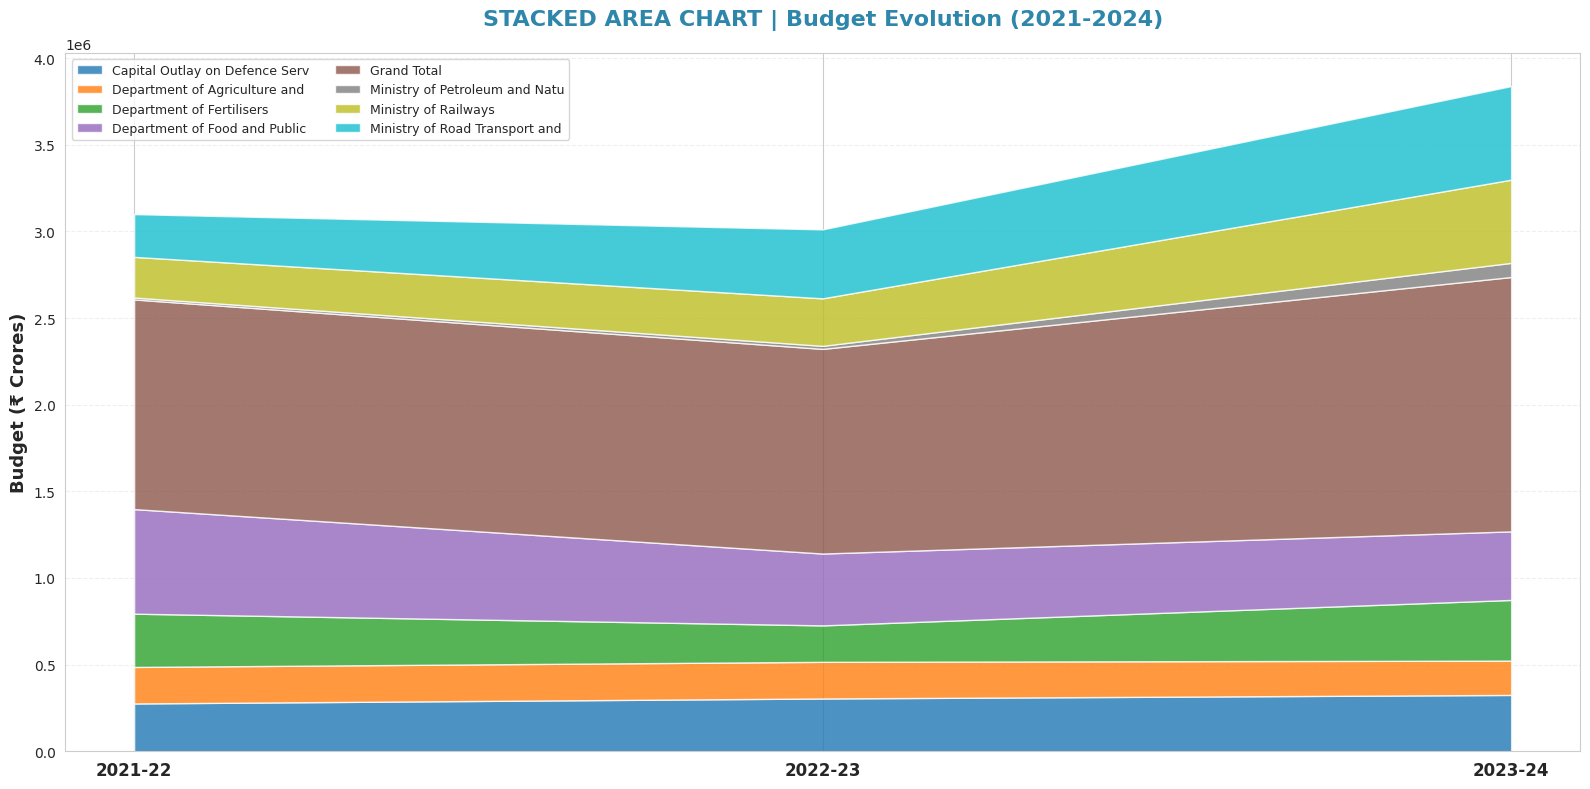

In [ ]:
# ============================================================================
# 18. AREA CHART - Budget Trend Over Years
# ============================================================================
fig, ax = plt.subplots(figsize=(16, 8))

top_8_trend = df.groupby('Ministry/Department')['Budget Estimates2023-2024 Total'].sum().nlargest(8).index
trend_data = df[df['Ministry/Department'].isin(top_8_trend)].groupby('Ministry/Department').agg({
    'Actuals 2021-2022 Total': 'sum',
    'Budget Estimates 2022-2023 Total': 'sum',
    'Budget Estimates2023-2024 Total': 'sum'
})

years = ['2021-22', '2022-23', '2023-24']
x = np.arange(len(years))

colors_area = plt.cm.tab10(np.linspace(0, 1, len(trend_data)))

ax.stackplot(x, *[trend_data.iloc[i].values for i in range(len(trend_data))],
             labels=[m[:30] for m in trend_data.index], colors=colors_area, alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(years, fontsize=12, fontweight='bold')
ax.set_ylabel('Budget (₹ Crores)', fontsize=13, fontweight='bold')
ax.set_title('STACKED AREA CHART | Budget Evolution (2021-2024)',
             fontsize=16, fontweight='bold', pad=20, color=COLORS['primary'])
ax.legend(loc='upper left', fontsize=9, ncol=2)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


                         ADVANCED STATISTICAL ANALYSIS                          


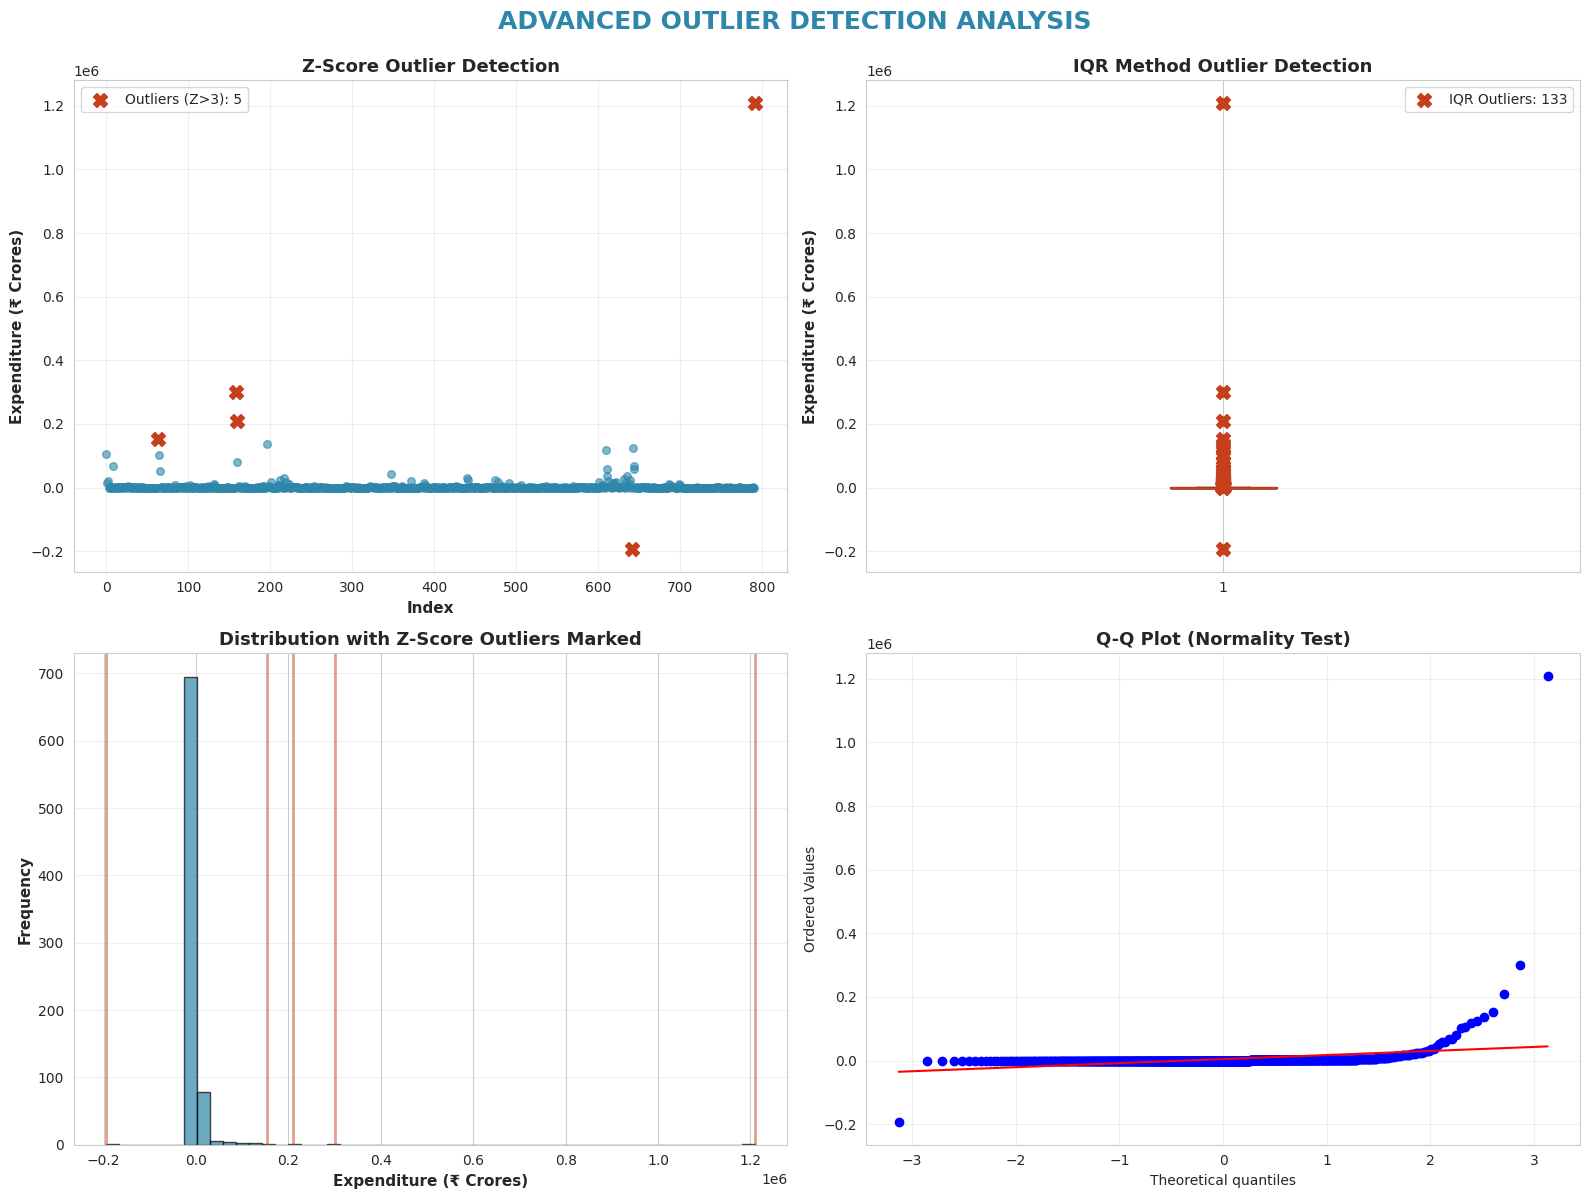


[OUTLIER ANALYSIS]
   • Z-Score Outliers (>3σ): 5
   • IQR Outliers: 133
   • Outlier Percentage: 16.79%


In [ ]:
# ============================================================================
# ADVANCED EDA SECTION
# ============================================================================

print("\n" + "="*80)
print("ADVANCED STATISTICAL ANALYSIS".center(80))
print("="*80)

# ============================================================================
# 19. OUTLIER DETECTION - Box Plot with Z-Score Analysis
# ============================================================================
from scipy import stats

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ADVANCED OUTLIER DETECTION ANALYSIS', fontsize=18, fontweight='bold',
             color=COLORS['primary'], y=0.995)

# Z-Score Method
expenditure = df['Actuals 2021-2022 Total'].dropna()
z_scores = np.abs(stats.zscore(expenditure))
outliers_z = expenditure[z_scores > 3]

ax1 = axes[0, 0]
ax1.scatter(range(len(expenditure)), expenditure, alpha=0.6, c=COLORS['primary'], s=30)
ax1.scatter(np.where(z_scores > 3)[0], outliers_z, color=COLORS['danger'], s=100,
           marker='X', label=f'Outliers (Z>3): {len(outliers_z)}', zorder=5)
ax1.set_xlabel('Index', fontsize=11, fontweight='bold')
ax1.set_ylabel('Expenditure (₹ Crores)', fontsize=11, fontweight='bold')
ax1.set_title('Z-Score Outlier Detection', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# IQR Method
Q1 = expenditure.quantile(0.25)
Q3 = expenditure.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = expenditure[(expenditure < Q1 - 1.5*IQR) | (expenditure > Q3 + 1.5*IQR)]

ax2 = axes[0, 1]
bp = ax2.boxplot(expenditure, vert=True, patch_artist=True,
                 boxprops=dict(facecolor=COLORS['success'], alpha=0.7),
                 medianprops=dict(color=COLORS['danger'], linewidth=2))
ax2.scatter([1]*len(outliers_iqr), outliers_iqr, color=COLORS['danger'], s=100,
           marker='X', label=f'IQR Outliers: {len(outliers_iqr)}', zorder=5)
ax2.set_ylabel('Expenditure (₹ Crores)', fontsize=11, fontweight='bold')
ax2.set_title('IQR Method Outlier Detection', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Distribution with outliers marked
ax3 = axes[1, 0]
ax3.hist(expenditure, bins=50, color=COLORS['primary'], alpha=0.7, edgecolor='black')
for outlier in outliers_z.values:
    ax3.axvline(outlier, color=COLORS['danger'], linewidth=2, alpha=0.5)
ax3.set_xlabel('Expenditure (₹ Crores)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax3.set_title('Distribution with Z-Score Outliers Marked', fontsize=13, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# QQ Plot for Normality
ax4 = axes[1, 1]
stats.probplot(expenditure, dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot (Normality Test)', fontsize=13, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n[OUTLIER ANALYSIS]")
print(f"   • Z-Score Outliers (>3σ): {len(outliers_z)}")
print(f"   • IQR Outliers: {len(outliers_iqr)}")
print(f"   • Outlier Percentage: {len(outliers_iqr)/len(expenditure)*100:.2f}%")


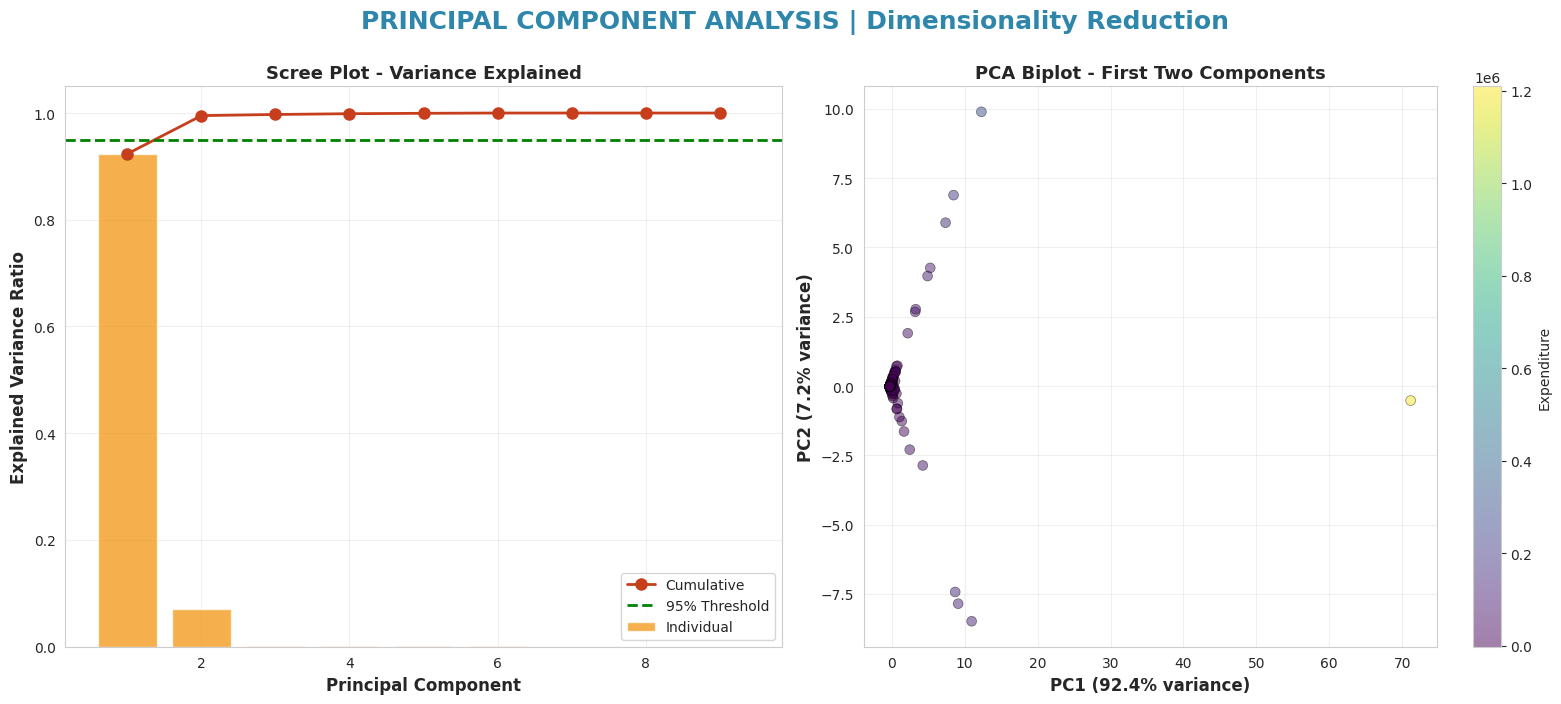


[PCA INSIGHTS]
   • Components for 95% variance: 2
   • PC1 explains: 92.36% variance
   • PC2 explains: 7.15% variance


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('PRINCIPAL COMPONENT ANALYSIS | Dimensionality Reduction',
             fontsize=18, fontweight='bold', color=COLORS['primary'], y=1.0)

# Prepare data
pca_cols = [col for col in numeric_cols if col in df.columns]
pca_data = df[pca_cols].dropna()

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_data)

# Scree Plot
ax1 = axes[0]
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

ax1.bar(range(1, len(variance_ratio)+1), variance_ratio, alpha=0.7,
        color=COLORS['accent'], label='Individual')
ax1.plot(range(1, len(variance_ratio)+1), cumulative_variance,
         color=COLORS['danger'], marker='o', linewidth=2, markersize=8,
         label='Cumulative')
ax1.axhline(0.95, color='green', linestyle='--', linewidth=2, label='95% Threshold')
ax1.set_xlabel('Principal Component', fontsize=12, fontweight='bold')
ax1.set_ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
ax1.set_title('Scree Plot - Variance Explained', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Biplot
ax2 = axes[1]
ax2.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5,
           c=df.loc[pca_data.index, 'Actuals 2021-2022 Total'],
           cmap='viridis', s=50, edgecolors='black', linewidth=0.5)
ax2.set_xlabel(f'PC1 ({variance_ratio[0]*100:.1f}% variance)', fontsize=12, fontweight='bold')
ax2.set_ylabel(f'PC2 ({variance_ratio[1]*100:.1f}% variance)', fontsize=12, fontweight='bold')
ax2.set_title('PCA Biplot - First Two Components', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)
plt.colorbar(ax2.collections[0], ax=ax2, label='Expenditure')

plt.tight_layout()
plt.show()

print(f"\n[PCA INSIGHTS]")
print(f"   • Components for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")
print(f"   • PC1 explains: {variance_ratio[0]*100:.2f}% variance")
print(f"   • PC2 explains: {variance_ratio[1]*100:.2f}% variance")

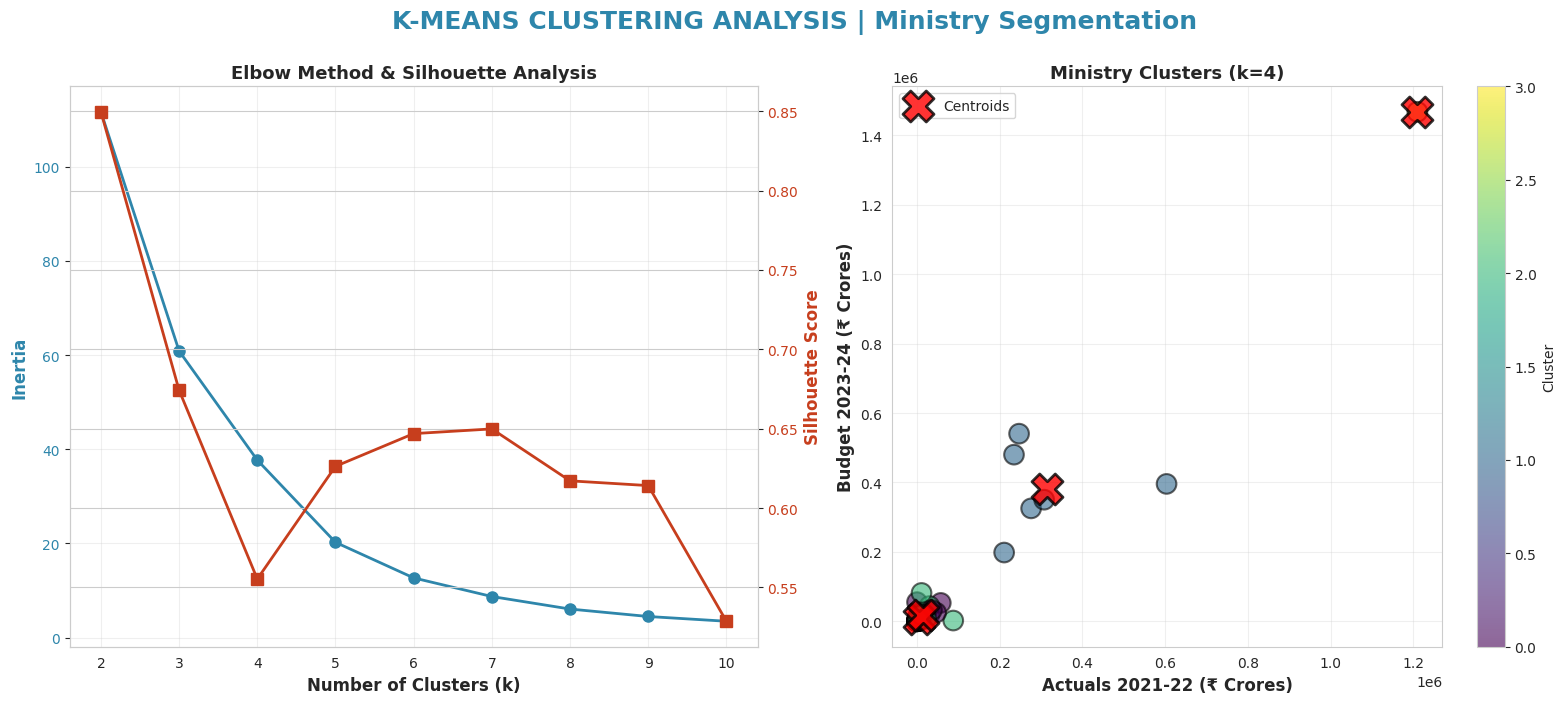


[CLUSTERING INSIGHTS]

   Cluster 0: 43 ministries
      • Avg Budget 2023-24: ₹6,958 Cr
      • Avg Schemes: 6.1

   Cluster 1: 6 ministries
      • Avg Budget 2023-24: ₹381,601 Cr
      • Avg Schemes: 17.5

   Cluster 2: 20 ministries
      • Avg Budget 2023-24: ₹17,347 Cr
      • Avg Schemes: 21.2

   Cluster 3: 1 ministries
      • Avg Budget 2023-24: ₹1,467,880 Cr
      • Avg Schemes: 1.0


In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('K-MEANS CLUSTERING ANALYSIS | Ministry Segmentation',
             fontsize=18, fontweight='bold', color=COLORS['primary'], y=1.0)

# Prepare clustering data
cluster_features = df.groupby('Ministry/Department').agg({
    'Actuals 2021-2022 Total': 'sum',
    'Budget Estimates2023-2024 Total': 'sum',
    'Scheme': 'count'
}).dropna()


scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_scaled, kmeans.labels_))

ax1 = axes[0]
ax1_twin = ax1.twinx()

line1 = ax1.plot(K_range, inertias, 'o-', color=COLORS['primary'],
                 linewidth=2, markersize=8, label='Inertia')
ax1.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertia', fontsize=12, fontweight='bold', color=COLORS['primary'])
ax1.tick_params(axis='y', labelcolor=COLORS['primary'])

line2 = ax1_twin.plot(K_range, silhouette_scores, 's-', color=COLORS['danger'],
                      linewidth=2, markersize=8, label='Silhouette Score')
ax1_twin.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold', color=COLORS['danger'])
ax1_twin.tick_params(axis='y', labelcolor=COLORS['danger'])

ax1.set_title('Elbow Method & Silhouette Analysis', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_scaled)

ax2 = axes[1]
scatter = ax2.scatter(cluster_features['Actuals 2021-2022 Total'],
                     cluster_features['Budget Estimates2023-2024 Total'],
                     c=cluster_labels, cmap='viridis', s=200, alpha=0.6,
                     edgecolors='black', linewidth=1.5)


centroids = scaler.inverse_transform(kmeans.cluster_centers_)
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', s=500, alpha=0.8,
           marker='X', edgecolors='black', linewidth=2, label='Centroids')

ax2.set_xlabel('Actuals 2021-22 (₹ Crores)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Budget 2023-24 (₹ Crores)', fontsize=12, fontweight='bold')
ax2.set_title(f'Ministry Clusters (k={optimal_k})', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='Cluster')

plt.tight_layout()
plt.show()


cluster_features['Cluster'] = cluster_labels
print(f"\n[CLUSTERING INSIGHTS]")
for i in range(optimal_k):
    cluster_data = cluster_features[cluster_features['Cluster'] == i]
    print(f"\n   Cluster {i}: {len(cluster_data)} ministries")
    print(f"      • Avg Budget 2023-24: ₹{cluster_data['Budget Estimates2023-2024 Total'].mean():,.0f} Cr")
    print(f"      • Avg Schemes: {cluster_data['Scheme'].mean():.1f}")

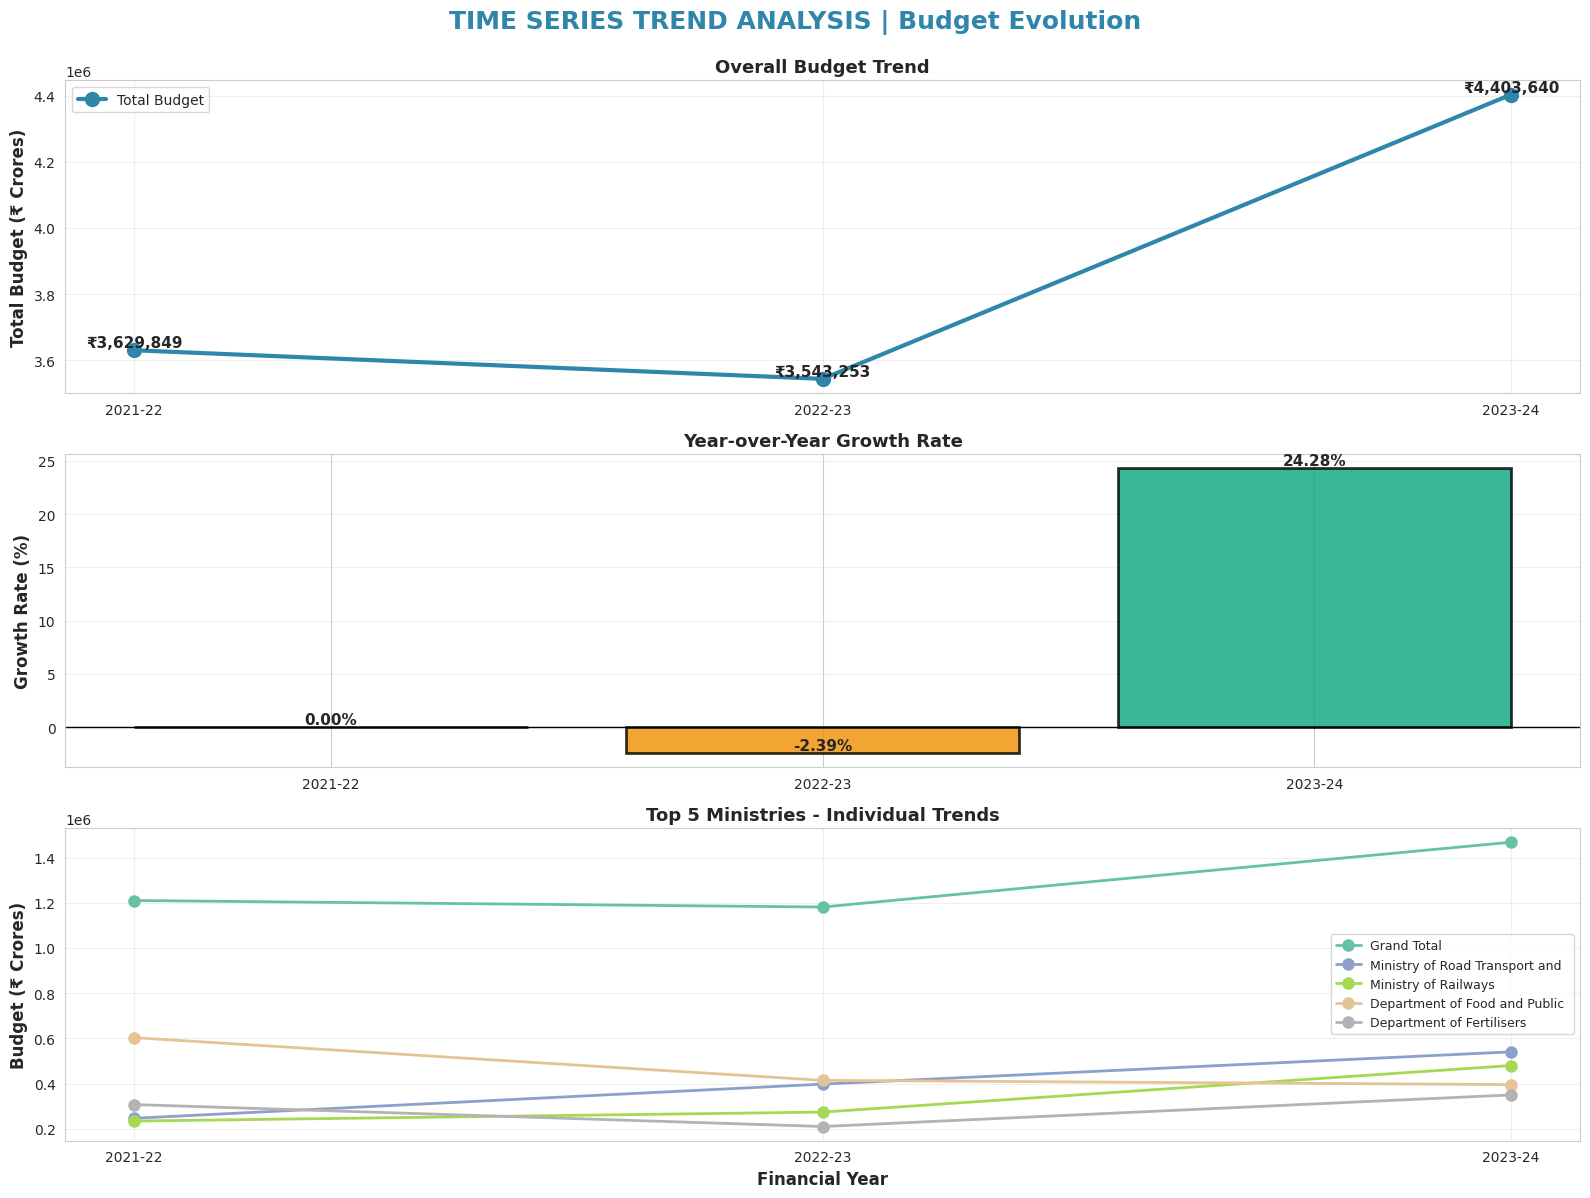

In [ ]:

fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('TIME SERIES TREND ANALYSIS | Budget Evolution',
             fontsize=18, fontweight='bold', color=COLORS['primary'], y=0.995)

# Prepare time series data
ts_data = df.groupby('Ministry/Department').agg({
    'Actuals 2021-2022 Total': 'sum',
    'Budget Estimates 2022-2023 Total': 'sum',
    'Budget Estimates2023-2024 Total': 'sum'
})

# Overall trend
overall_trend = ts_data.sum()
years = ['2021-22', '2022-23', '2023-24']

ax1 = axes[0]
ax1.plot(years, overall_trend.values, 'o-', linewidth=3, markersize=10,
        color=COLORS['primary'], label='Total Budget')
for i, (year, val) in enumerate(zip(years, overall_trend.values)):
    ax1.text(i, val, f'₹{val:,.0f}', ha='center', va='bottom',
            fontsize=11, fontweight='bold')
ax1.set_ylabel('Total Budget (₹ Crores)', fontsize=12, fontweight='bold')
ax1.set_title('Overall Budget Trend', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Year-over-year growth rate
ax2 = axes[1]
growth_21_22 = ((overall_trend.iloc[1] - overall_trend.iloc[0]) / overall_trend.iloc[0] * 100)
growth_22_23 = ((overall_trend.iloc[2] - overall_trend.iloc[1]) / overall_trend.iloc[1] * 100)
growth_rates = [0, growth_21_22, growth_22_23]

bars = ax2.bar(years, growth_rates, color=[COLORS['success'], COLORS['accent'], COLORS['success']],
              alpha=0.8, edgecolor='black', linewidth=2)
for bar, rate in zip(bars, growth_rates):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{rate:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax2.set_ylabel('Growth Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Year-over-Year Growth Rate', fontsize=13, fontweight='bold')
ax2.axhline(0, color='black', linewidth=1)
ax2.grid(axis='y', alpha=0.3)

# Ministry-wise trend (top 5)
ax3 = axes[2]
top_5_ts = ts_data.nlargest(5, 'Budget Estimates2023-2024 Total')
colors_ts = plt.cm.Set2(np.linspace(0, 1, len(top_5_ts)))

for idx, (ministry, row) in enumerate(top_5_ts.iterrows()):
    ax3.plot(years, row.values, 'o-', linewidth=2, markersize=8,
            label=ministry[:30], color=colors_ts[idx])

ax3.set_ylabel('Budget (₹ Crores)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Financial Year', fontsize=12, fontweight='bold')
ax3.set_title('Top 5 Ministries - Individual Trends', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-4195335669.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(ministry_groups, labels=[m[:15] for m in top_6_ministries_test],


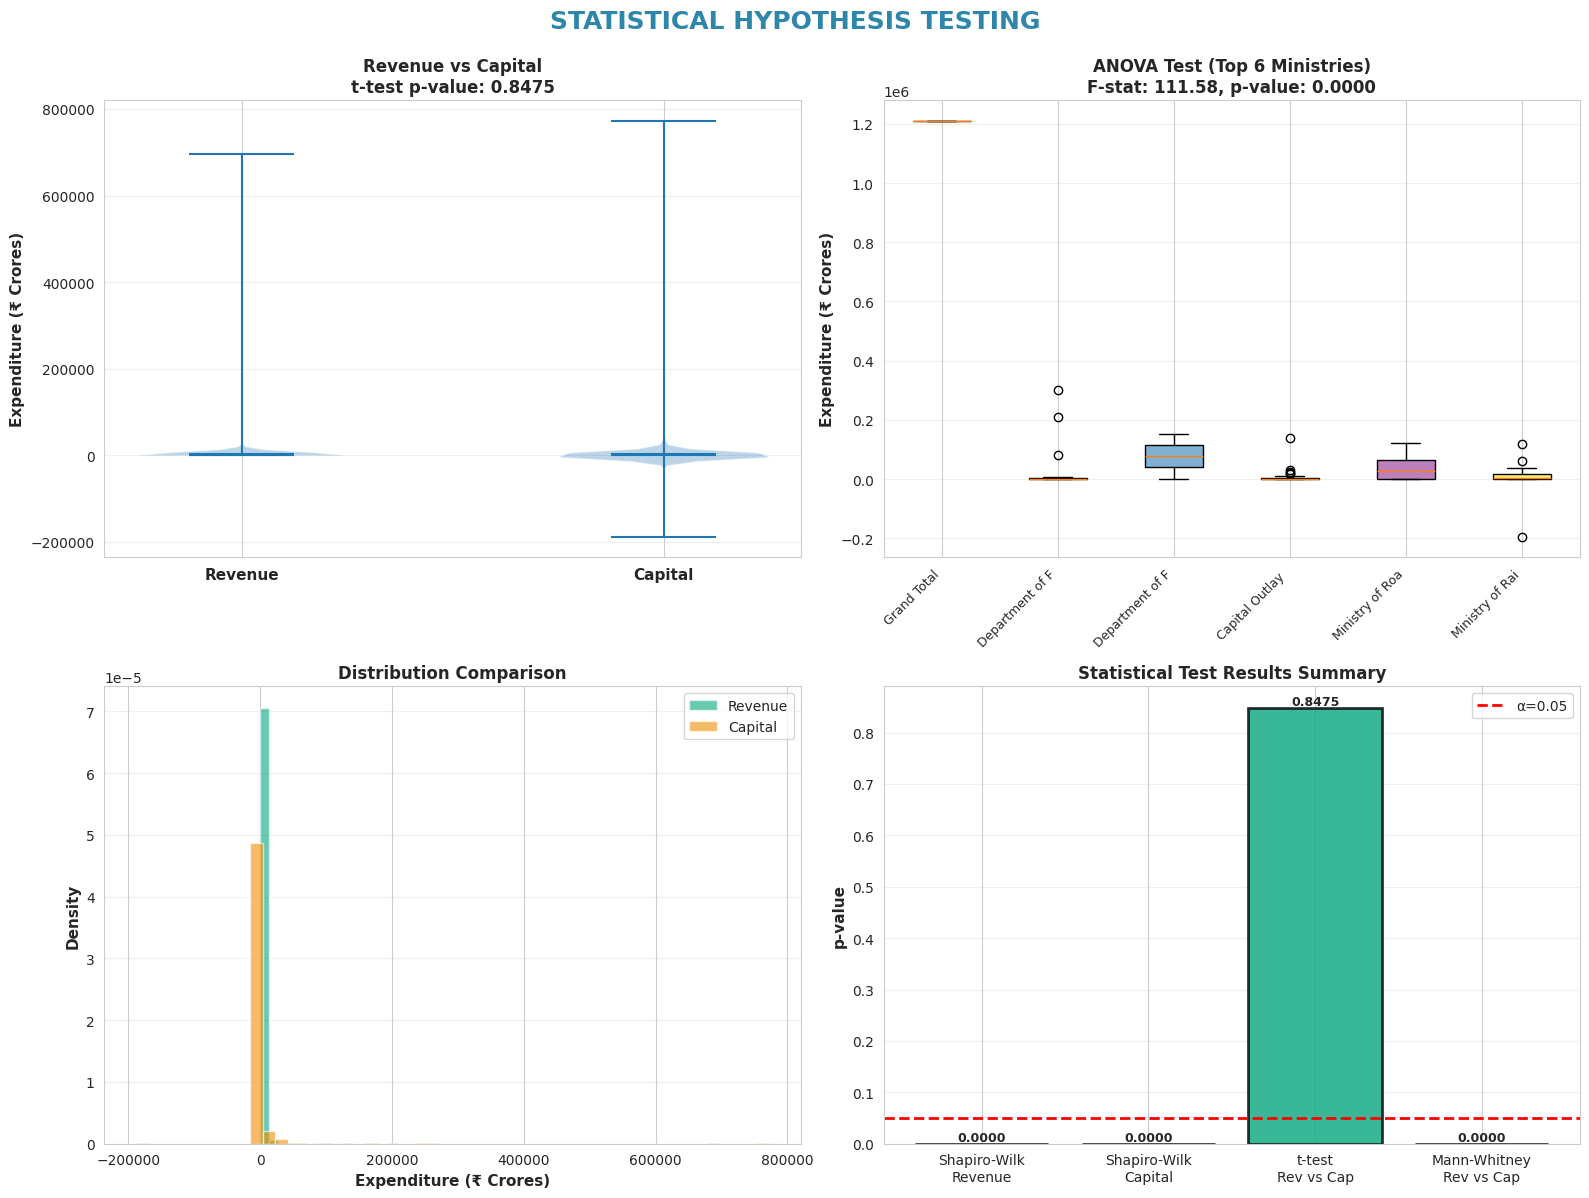


[HYPOTHESIS TESTING RESULTS]
   • Revenue vs Capital t-test p-value: 0.8475
   • Interpretation: Not significantly different
   • ANOVA p-value (Top 6 ministries): 0.0000
   • Shapiro-Wilk (Revenue) p-value: 0.0000
   • Shapiro-Wilk (Capital) p-value: 0.0000


In [ ]:

from scipy.stats import ttest_ind, mannwhitneyu, f_oneway

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('STATISTICAL HYPOTHESIS TESTING', fontsize=18, fontweight='bold',
             color=COLORS['primary'], y=0.995)

# Test 1: Revenue vs Capital expenditure comparison
revenue_exp = df['Budget Estimates2023-2024 Revenue'].dropna()
capital_exp = df['Budget Estimates2023-2024 Capital'].dropna()

t_stat, p_value_ttest = ttest_ind(revenue_exp, capital_exp)
u_stat, p_value_mann = mannwhitneyu(revenue_exp, capital_exp)

ax1 = axes[0, 0]
ax1.violinplot([revenue_exp, capital_exp], positions=[1, 2],
               showmeans=True, showmedians=True)
ax1.set_xticks([1, 2])
ax1.set_xticklabels(['Revenue', 'Capital'], fontsize=11, fontweight='bold')
ax1.set_ylabel('Expenditure (₹ Crores)', fontsize=11, fontweight='bold')
ax1.set_title(f'Revenue vs Capital\nt-test p-value: {p_value_ttest:.4f}',
             fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Test 2: ANOVA - Compare multiple ministries
top_6_ministries_test = df.groupby('Ministry/Department')['Actuals 2021-2022 Total'].sum().nlargest(6).index
ministry_groups = [df[df['Ministry/Department'] == m]['Actuals 2021-2022 Total'].dropna()
                   for m in top_6_ministries_test]
f_stat, p_value_anova = f_oneway(*ministry_groups)

ax2 = axes[0, 1]
bp = ax2.boxplot(ministry_groups, labels=[m[:15] for m in top_6_ministries_test],
                patch_artist=True)
for patch, color in zip(bp['boxes'], plt.cm.Set3(np.linspace(0, 1, 6))):
    patch.set_facecolor(color)
ax2.set_xticklabels([m[:15] for m in top_6_ministries_test], rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('Expenditure (₹ Crores)', fontsize=11, fontweight='bold')
ax2.set_title(f'ANOVA Test (Top 6 Ministries)\nF-stat: {f_stat:.2f}, p-value: {p_value_anova:.4f}',
             fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Test 3: Distribution comparison
ax3 = axes[1, 0]
ax3.hist(revenue_exp, bins=50, alpha=0.6, color=COLORS['success'], label='Revenue', density=True)
ax3.hist(capital_exp, bins=50, alpha=0.6, color=COLORS['accent'], label='Capital', density=True)
ax3.set_xlabel('Expenditure (₹ Crores)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Density', fontsize=11, fontweight='bold')
ax3.set_title('Distribution Comparison', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Test 4: Normality tests
from scipy.stats import shapiro, normaltest

shapiro_stat_rev, shapiro_p_rev = shapiro(revenue_exp.sample(min(5000, len(revenue_exp))))
shapiro_stat_cap, shapiro_p_cap = shapiro(capital_exp.sample(min(5000, len(capital_exp))))

ax4 = axes[1, 1]
test_results = pd.DataFrame({
    'Test': ['Shapiro-Wilk\nRevenue', 'Shapiro-Wilk\nCapital',
             't-test\nRev vs Cap', 'Mann-Whitney\nRev vs Cap'],
    'p-value': [shapiro_p_rev, shapiro_p_cap, p_value_ttest, p_value_mann]
})
bars = ax4.bar(test_results['Test'], test_results['p-value'],
              color=[COLORS['success'] if p > 0.05 else COLORS['danger']
                     for p in test_results['p-value']],
              edgecolor='black', linewidth=2, alpha=0.8)
ax4.axhline(0.05, color='red', linestyle='--', linewidth=2, label='α=0.05')
ax4.set_ylabel('p-value', fontsize=11, fontweight='bold')
ax4.set_title('Statistical Test Results Summary', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, test_results['p-value']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n[HYPOTHESIS TESTING RESULTS]")
print(f"   • Revenue vs Capital t-test p-value: {p_value_ttest:.4f}")
print(f"   • Interpretation: {'Significantly different' if p_value_ttest < 0.05 else 'Not significantly different'}")
print(f"   • ANOVA p-value (Top 6 ministries): {p_value_anova:.4f}")
print(f"   • Shapiro-Wilk (Revenue) p-value: {shapiro_p_rev:.4f}")
print(f"   • Shapiro-Wilk (Capital) p-value: {shapiro_p_cap:.4f}")

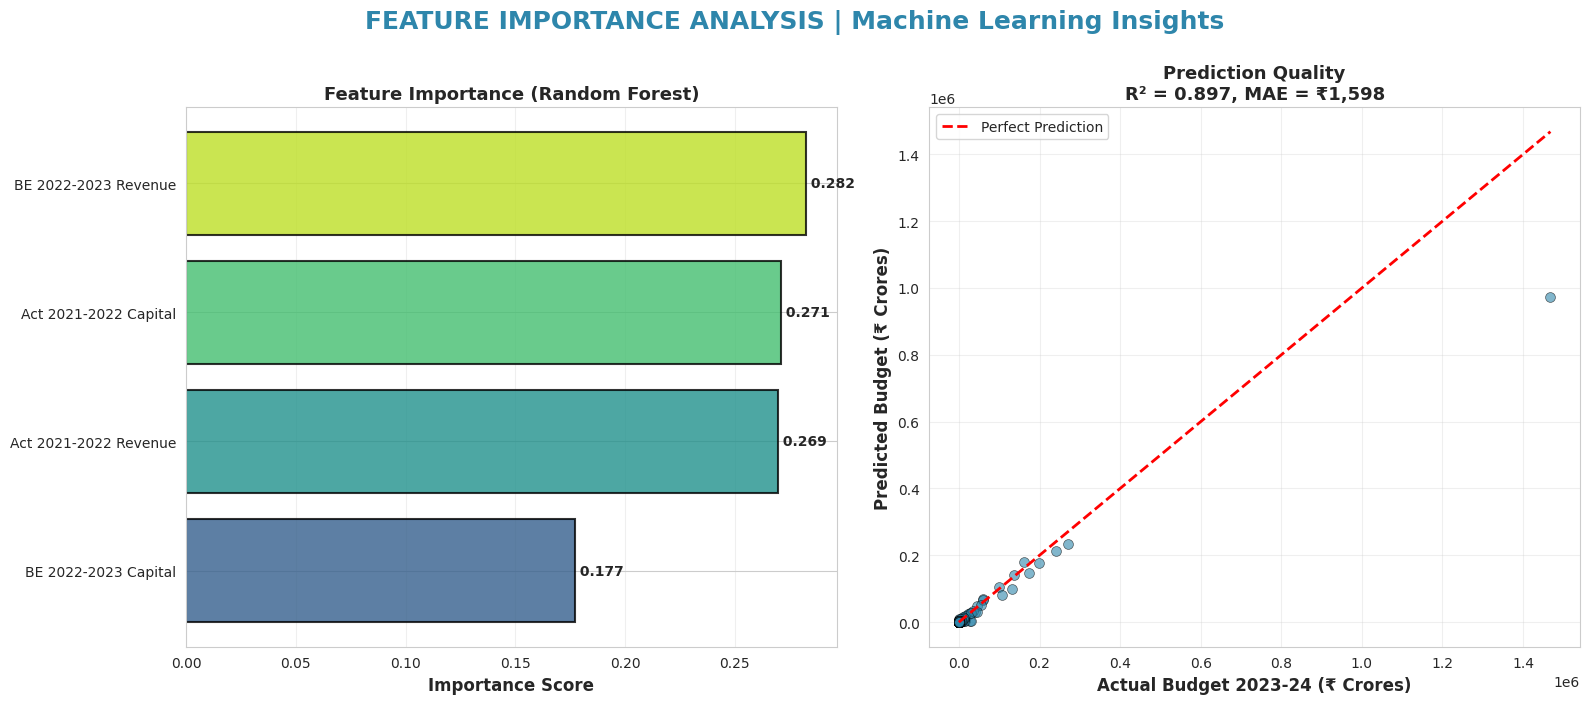


[MACHINE LEARNING INSIGHTS]
   • Model R² Score: 0.8966
   • Mean Absolute Error: ₹1,598 Crores
   • Most Important Feature: BE 2022-2023 Revenue


In [ ]:

from sklearn.ensemble import RandomForestRegressor

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('FEATURE IMPORTANCE ANALYSIS | Machine Learning Insights',
             fontsize=18, fontweight='bold', color=COLORS['primary'], y=1.0)


feature_data = df[[
    'Actuals 2021-2022 Revenue', 'Actuals 2021-2022 Capital',
    'Budget Estimates 2022-2023 Revenue', 'Budget Estimates 2022-2023 Capital'
]].dropna()
target = df.loc[feature_data.index, 'Budget Estimates2023-2024 Total']


rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(feature_data, target)


importances = rf_model.feature_importances_
feature_names = [name.replace('Budget Estimates ', 'BE ').replace('Actuals ', 'Act ')
                 for name in feature_data.columns]

ax1 = axes[0]
sorted_idx = np.argsort(importances)
colors_fi = plt.cm.viridis(np.linspace(0.3, 0.9, len(importances)))

bars = ax1.barh(range(len(importances)), importances[sorted_idx],
               color=colors_fi, edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_yticks(range(len(importances)))
ax1.set_yticklabels([feature_names[i] for i in sorted_idx], fontsize=10)
ax1.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax1.set_title('Feature Importance (Random Forest)', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, importances[sorted_idx])):
    ax1.text(val, i, f' {val:.3f}', va='center', fontsize=10, fontweight='bold')


predictions = rf_model.predict(feature_data)
ax2 = axes[1]
ax2.scatter(target, predictions, alpha=0.6, c=COLORS['primary'], s=50, edgecolors='black', linewidth=0.5)
ax2.plot([target.min(), target.max()], [target.min(), target.max()],
        'r--', linewidth=2, label='Perfect Prediction')

from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(target, predictions)
mae = mean_absolute_error(target, predictions)

ax2.set_xlabel('Actual Budget 2023-24 (₹ Crores)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Predicted Budget (₹ Crores)', fontsize=12, fontweight='bold')
ax2.set_title(f'Prediction Quality\nR² = {r2:.3f}, MAE = ₹{mae:,.0f}',
             fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n[MACHINE LEARNING INSIGHTS]")
print(f"   • Model R² Score: {r2:.4f}")
print(f"   • Mean Absolute Error: ₹{mae:,.0f} Crores")
print(f"   • Most Important Feature: {feature_names[np.argmax(importances)]}")


In [ ]:

print("\n" + "="*80)
print("KEY INSIGHTS & FINDINGS".center(80))
print("="*80)

total_2023 = df['Budget Estimates2023-2024 Total'].sum()
total_2022 = df['Budget Estimates 2022-2023 Total'].sum()
growth_rate = ((total_2023 - total_2022) / total_2022) * 100

print(f"\n[OVERALL BUDGET METRICS]")
print(f"   • Total Budget 2023-24: ₹{total_2023:,.0f} Crores")
print(f"   • Total Budget 2022-23: ₹{total_2022:,.0f} Crores")
print(f"   • YoY Growth: {growth_rate:.2f}%")
print(f"   • Total Ministries: {df['Ministry/Department'].nunique()}")
print(f"   • Total Schemes: {df['Scheme'].nunique()}")
print(f"\n[CAPITAL vs REVENUE SPLIT (2023-24)]")
print(f"   • Revenue Expenditure: ₹{total_revenue:,.0f} Crores ({total_revenue/total_2023*100:.1f}%)")
print(f"   • Capital Expenditure: ₹{total_capital:,.0f} Crores ({total_capital/total_2023*100:.1f}%)")

print("\n" + "="*80)
print("Analysis Complete!".center(80))
print("="*80)


                            KEY INSIGHTS & FINDINGS                             

[OVERALL BUDGET METRICS]
   • Total Budget 2023-24: ₹4,403,640 Crores
   • Total Budget 2022-23: ₹3,543,253 Crores
   • YoY Growth: 24.28%
   • Total Ministries: 70
   • Total Schemes: 712

[CAPITAL vs REVENUE SPLIT (2023-24)]
   • Revenue Expenditure: ₹2,086,363 Crores (47.4%)
   • Capital Expenditure: ₹2,317,277 Crores (52.6%)

                               Analysis Complete!                               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, accuracy_score, precision_recall_curve)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              AdaBoostRegressor, ExtraTreesRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re


try:
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True)
except:
    pass

print("="*80)
print("MACHINE LEARNING PIPELINE - BUDGET PREDICTION & NLP ANALYSIS".center(80))
print("="*80)


df = pd.read_csv('/content/MRF_4B_Union_Budget (1).csv')
df.columns = df.columns.str.strip()


          MACHINE LEARNING PIPELINE - BUDGET PREDICTION & NLP ANALYSIS          


In [ ]:

print("\n" + "="*80)
print("PART 1: NLP TEXT PREPROCESSING".center(80))
print("="*80)

class TextPreprocessor:
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()
        try:
            self.stop_words = set(stopwords.words('english'))
        except:
            self.stop_words = set()

    def clean_text(self, text):
        """Basic cleaning"""
        if pd.isna(text):
            return ""
        text = str(text).lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        return text

    def tokenize(self, text):
        """Tokenization"""
        try:
            tokens = word_tokenize(text)
        except:
            tokens = text.split()
        return tokens

    def remove_stopwords(self, tokens):
        """Remove stopwords"""
        return [word for word in tokens if word not in self.stop_words]

    def stem_tokens(self, tokens):
        """Stemming"""
        return [self.stemmer.stem(word) for word in tokens]

    def lemmatize_tokens(self, tokens):
        """Lemmatization"""
        return [self.lemmatizer.lemmatize(word) for word in tokens]

    def preprocess(self, text, use_stemming=False, use_lemmatization=True):
        """Complete preprocessing pipeline"""
        text = self.clean_text(text)
        tokens = self.tokenize(text)
        tokens = self.remove_stopwords(tokens)

        if use_stemming:
            tokens = self.stem_tokens(tokens)
        if use_lemmatization:
            tokens = self.lemmatize_tokens(tokens)

        return ' '.join(tokens)


preprocessor = TextPreprocessor()
df['Scheme_Processed'] = df['Scheme'].apply(preprocessor.preprocess)

print("\n[TEXT PREPROCESSING EXAMPLES]")
print(f"Original: {df['Scheme'].iloc[0]}")
print(f"Processed: {df['Scheme_Processed'].iloc[0]}")
print(f"\nOriginal: {df['Scheme'].iloc[5]}")
print(f"Processed: {df['Scheme_Processed'].iloc[5]}")


                         PART 1: NLP TEXT PREPROCESSING                         

[TEXT PREPROCESSING EXAMPLES]
Original: Total
Processed: total

Original: Pradhan Mantri Annadata Aay Sanrakshan Yojna (PM-AASHA)
Processed: pradhan mantri annadata aay sanrakshan yojna pmaasha


In [ ]:

print("\n" + "="*80)
print("TEXT VECTORIZATION".center(80))
print("="*80)


tfidf_vectorizer = TfidfVectorizer(max_features=50, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Scheme_Processed'].fillna(''))
tfidf_features = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=[f'tfidf_{i}' for i in range(tfidf_matrix.shape[1])]
)

print(f"\n[TF-IDF VECTORIZATION]")
print(f"   • Matrix shape: {tfidf_matrix.shape}")
print(f"   • Top features: {tfidf_vectorizer.get_feature_names_out()[:10]}")


count_vectorizer = CountVectorizer(max_features=50, ngram_range=(1, 2))
count_matrix = count_vectorizer.fit_transform(df['Scheme_Processed'].fillna(''))

print(f"\n[COUNT VECTORIZATION]")
print(f"   • Matrix shape: {count_matrix.shape}")


                               TEXT VECTORIZATION                               

[TF-IDF VECTORIZATION]
   • Matrix shape: (792, 50)
   • Top features: ['assistance' 'bank' 'building' 'capacity' 'central' 'centre' 'credit'
 'development' 'development scheme' 'east']

[COUNT VECTORIZATION]
   • Matrix shape: (792, 50)


In [ ]:

print("\n" + "="*80)
print("PART 2: FEATURE ENGINEERING".center(80))
print("="*80)


feature_cols = [
    'Actuals 2021-2022 Revenue',
    'Actuals 2021-2022 Capital',
    'Budget Estimates 2022-2023 Revenue',
    'Budget Estimates 2022-2023 Capital',
    'Budget Estimates 2022-2023 Total'
]


target_col = 'Budget Estimates2023-2024 Total'


df_ml = df[feature_cols + [target_col]].copy()
df_ml = df_ml.dropna()


df_ml['Revenue_to_Capital_Ratio_21'] = (df_ml['Actuals 2021-2022 Revenue'] /
                                        (df_ml['Actuals 2021-2022 Capital'] + 1))
df_ml['Revenue_to_Capital_Ratio_22'] = (df_ml['Budget Estimates 2022-2023 Revenue'] /
                                        (df_ml['Budget Estimates 2022-2023 Capital'] + 1))
df_ml['Growth_21_to_22'] = ((df_ml['Budget Estimates 2022-2023 Total'] -
                             (df_ml['Actuals 2021-2022 Revenue'] + df_ml['Actuals 2021-2022 Capital'])) /
                            (df_ml['Actuals 2021-2022 Revenue'] + df_ml['Actuals 2021-2022 Capital'] + 1))
df_ml['Total_Historical'] = (df_ml['Actuals 2021-2022 Revenue'] +
                              df_ml['Actuals 2021-2022 Capital'])

print(f"\n[FEATURE ENGINEERING]")
print(f"   • Total features: {len(df_ml.columns) - 1}")
print(f"   • Dataset size: {len(df_ml)} samples")
print(f"   • Features: {list(df_ml.columns[:-1])[:5]}...")



                          PART 2: FEATURE ENGINEERING                           

[FEATURE ENGINEERING]
   • Total features: 9
   • Dataset size: 695 samples
   • Features: ['Actuals 2021-2022 Revenue', 'Actuals 2021-2022 Capital', 'Budget Estimates 2022-2023 Revenue', 'Budget Estimates 2022-2023 Capital', 'Budget Estimates 2022-2023 Total']...


In [ ]:

print("\n" + "="*80)
print("PART 3: DATA SPLITTING & SCALING".center(80))
print("="*80)

X = df_ml.drop(columns=[target_col])
y = df_ml[target_col]


X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)

print(f"\n[DATA SPLIT]")
print(f"   • Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   • Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"   • Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\n[FEATURE SCALING]")
print(f"   • Scaling method: StandardScaler")
print(f"   • Mean: {scaler.mean_[:3]}")
print(f"   • Std: {scaler.scale_[:3]}")


                        PART 3: DATA SPLITTING & SCALING                        

[DATA SPLIT]
   • Training set: 486 samples (69.9%)
   • Validation set: 104 samples (15.0%)
   • Test set: 105 samples (15.1%)

[FEATURE SCALING]
   • Scaling method: StandardScaler
   • Mean: [2948.10388889 1988.06102881 2637.44374486]
   • Std: [34647.41534804 23016.24221965 29107.11355663]


In [ ]:

print("\n" + "="*80)
print("PART 4: MODEL SELECTION & TRAINING".center(80))
print("="*80)


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, max_depth=5, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}


results = []

print("\n[MODEL TRAINING IN PROGRESS...]")
for name, model in models.items():

    model.fit(X_train_scaled, y_train)


    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)


    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)


    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5,
                                scoring='r2', n_jobs=-1)

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Val RMSE': val_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Val MAE': val_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Val R²': val_r2,
        'Test R²': test_r2,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std()
    })

    print(f"   ✓ {name} trained - Val R²: {val_r2:.4f}")


results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Val R²', ascending=False)

print("\n[MODEL COMPARISON - TOP 5]")
print(results_df.head()[['Model', 'Test RMSE', 'Test MAE', 'Test R²']].to_string(index=False))



                       PART 4: MODEL SELECTION & TRAINING                       

[MODEL TRAINING IN PROGRESS...]
   ✓ Linear Regression trained - Val R²: 0.9248
   ✓ Ridge Regression trained - Val R²: 0.9250
   ✓ Lasso Regression trained - Val R²: 0.9254
   ✓ ElasticNet trained - Val R²: 0.8960
   ✓ Decision Tree trained - Val R²: 0.8145
   ✓ Random Forest trained - Val R²: 0.8148
   ✓ Gradient Boosting trained - Val R²: 0.8794
   ✓ XGBoost trained - Val R²: 0.7486
   ✓ AdaBoost trained - Val R²: 0.7641
   ✓ Extra Trees trained - Val R²: 0.9288
   ✓ SVR trained - Val R²: -0.0322
   ✓ KNN trained - Val R²: 0.6532

[MODEL COMPARISON - TOP 5]
            Model    Test RMSE    Test MAE  Test R²
      Extra Trees 16973.289281 3571.542717 0.762561
 Lasso Regression 11403.117471 2674.734525 0.892832
 Ridge Regression  9819.405281 2425.817604 0.920532
Linear Regression  8178.570936 1859.941585 0.944872
       ElasticNet 10555.540509 2720.102134 0.908171


In [ ]:

print("\n" + "="*80)
print("PART 5: HYPERPARAMETER TUNING".center(80))
print("="*80)

best_model_name = results_df.iloc[0]['Model']
print(f"\n[TUNING {best_model_name}]")

if 'Random Forest' in best_model_name:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    base_model = RandomForestRegressor(random_state=42)
elif 'XGBoost' in best_model_name:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1.0]
    }
    base_model = xgb.XGBRegressor(random_state=42)
elif 'Gradient' in best_model_name:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1.0]
    }
    base_model = GradientBoostingRegressor(random_state=42)
else:
    param_grid = {
        'alpha': [0.1, 1.0, 10.0]
    }
    base_model = Ridge()


grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='r2',
                          n_jobs=-1, verbose=0)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f"\n[BEST PARAMETERS]")
for param, value in grid_search.best_params_.items():
    print(f"   • {param}: {value}")


y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

print(f"\n[TUNED MODEL PERFORMANCE]")
print(f"   • Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_tuned)):,.2f}")
print(f"   • Test MAE: {mean_absolute_error(y_test, y_test_pred_tuned):,.2f}")
print(f"   • Test R²: {r2_score(y_test, y_test_pred_tuned):.4f}")



                         PART 5: HYPERPARAMETER TUNING                          

[TUNING Extra Trees]

[BEST PARAMETERS]
   • alpha: 0.1

[TUNED MODEL PERFORMANCE]
   • Test RMSE: 8,432.11
   • Test MAE: 2,023.63
   • Test R²: 0.9414


In [ ]:

print("\n" + "="*80)
print("PART 6: ADVANCED PERFORMANCE METRICS".center(80))
print("="*80)


def calculate_mape(y_true, y_pred):
    """Mean Absolute Percentage Error"""
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1))) * 100

def calculate_gini(y_true, y_pred):
    """Gini Coefficient"""

    sorted_indices = np.argsort(y_pred)
    y_true_sorted = y_true.values[sorted_indices]

    n = len(y_true_sorted)
    cumsum = np.cumsum(y_true_sorted)
    gini = (n + 1 - 2 * np.sum(cumsum) / cumsum[-1]) / n
    return gini

mape = calculate_mape(y_test, y_test_pred_tuned)
gini = calculate_gini(y_test, y_test_pred_tuned)

# Explained Variance
from sklearn.metrics import explained_variance_score
ev_score = explained_variance_score(y_test, y_test_pred_tuned)

# Max Error
from sklearn.metrics import max_error
max_err = max_error(y_test, y_test_pred_tuned)

print(f"\n[COMPREHENSIVE METRICS]")
print(f"   • RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_tuned)):,.2f}")
print(f"   • MAE: {mean_absolute_error(y_test, y_test_pred_tuned):,.2f}")
print(f"   • R² Score: {r2_score(y_test, y_test_pred_tuned):.4f}")
print(f"   • MAPE: {mape:.2f}%")
print(f"   • Gini Coefficient: {gini:.4f}")
print(f"   • Explained Variance: {ev_score:.4f}")
print(f"   • Max Error: {max_err:,.2f}")


                      PART 6: ADVANCED PERFORMANCE METRICS                      

[COMPREHENSIVE METRICS]
   • RMSE: 8,432.11
   • MAE: 2,023.63
   • R² Score: 0.9414
   • MAPE: 41948.76%
   • Gini Coefficient: 0.8757
   • Explained Variance: 0.9421
   • Max Error: 76,343.31


In [ ]:
results_df.to_csv('model_comparison_results.csv', index=False)
print(f"\n[RESULTS SAVED]")
print(f"   • File: model_comparison_results.csv")
print(f"   • Best Model: {best_model_name}")

print("\n" + "="*80)
print("MODEL TRAINING COMPLETE!".center(80))
print("="*80)



[RESULTS SAVED]
   • File: model_comparison_results.csv
   • Best Model: Extra Trees

                            MODEL TRAINING COMPLETE!                            


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score,
                             precision_recall_curve, mean_squared_error, r2_score)
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("PART 7: COMPREHENSIVE VISUALIZATION & RESULTS".center(80))
print("="*80)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#06A77D',
    'danger': '#C73E1D'
}


                 PART 7: COMPREHENSIVE VISUALIZATION & RESULTS                  


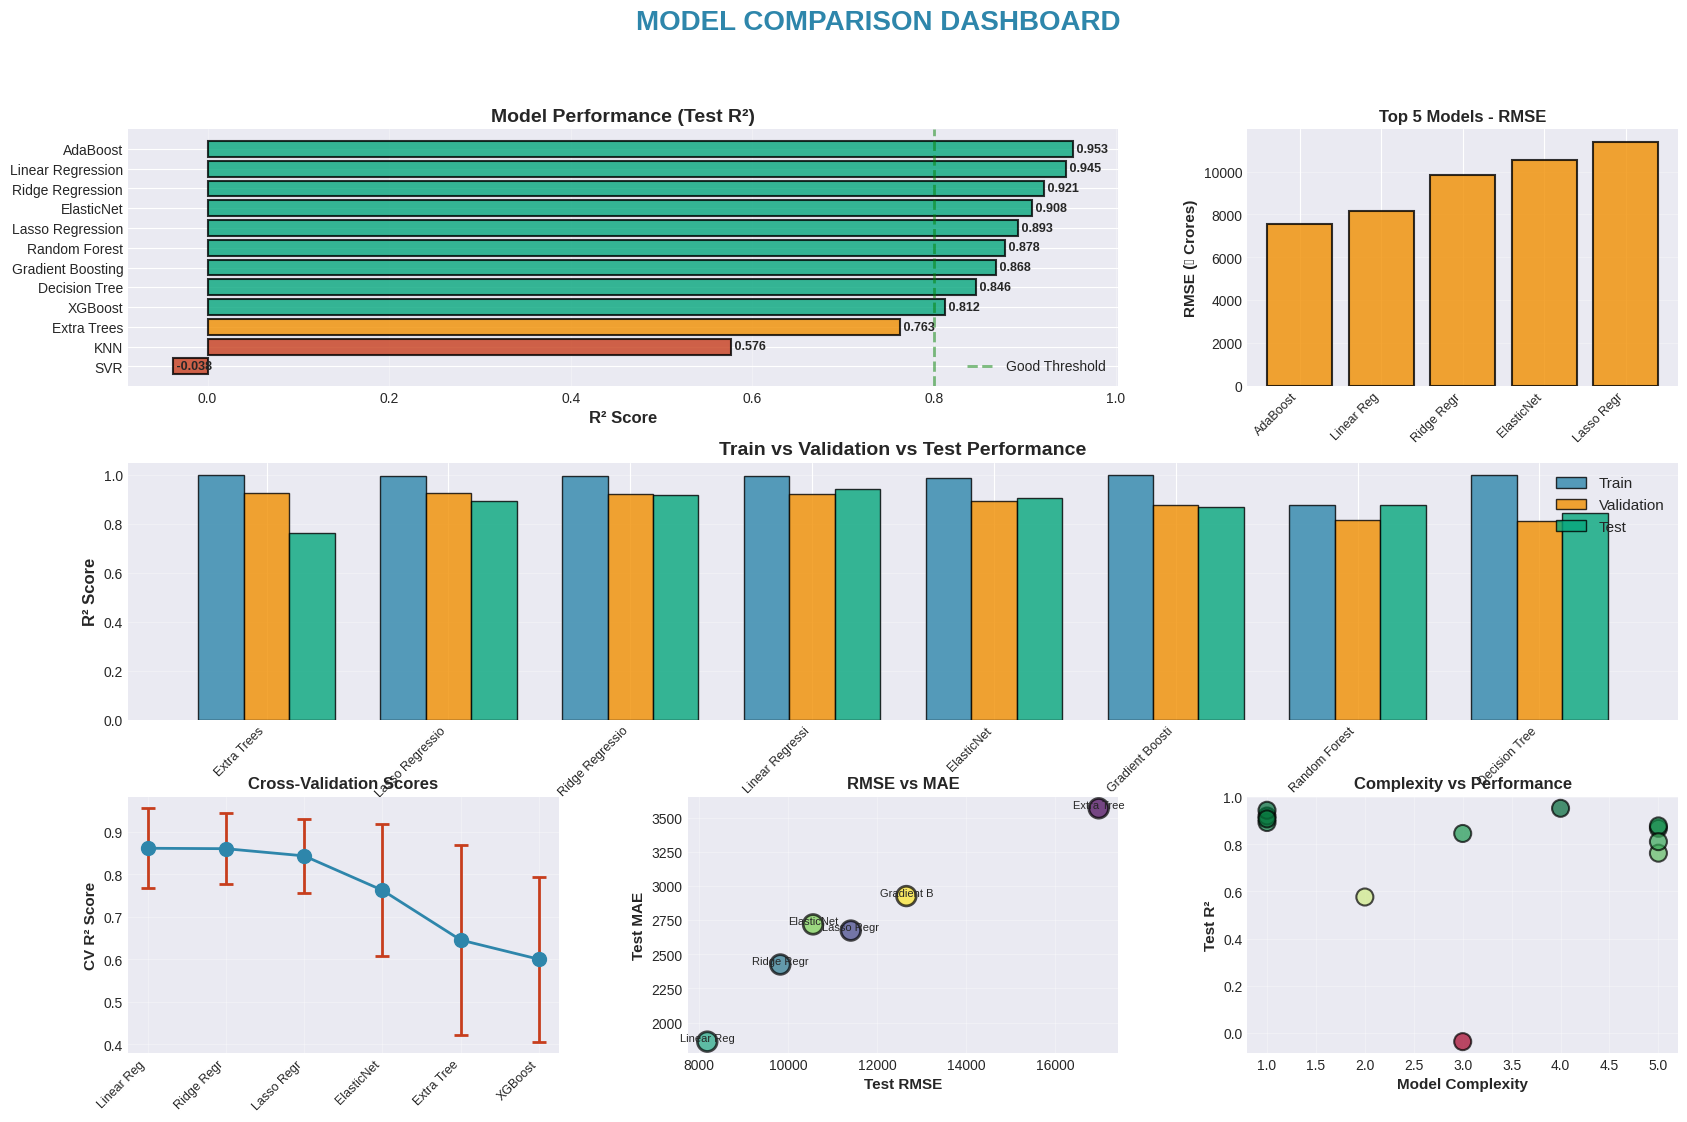

In [ ]:

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('MODEL COMPARISON DASHBOARD', fontsize=20, fontweight='bold',
             color=COLORS['primary'], y=0.98)

# 1.1 Test R² Comparison
ax1 = fig.add_subplot(gs[0, :2])
sorted_results = results_df.sort_values('Test R²', ascending=True)
colors_bar = [COLORS['success'] if x > 0.8 else COLORS['accent'] if x > 0.6
              else COLORS['danger'] for x in sorted_results['Test R²']]
bars = ax1.barh(sorted_results['Model'], sorted_results['Test R²'],
               color=colors_bar, edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_xlabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance (Test R²)', fontsize=14, fontweight='bold')
ax1.axvline(0.8, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Good Threshold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

for bar, val in zip(bars, sorted_results['Test R²']):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f' {val:.3f}',
            va='center', fontsize=9, fontweight='bold')

# 1.2 RMSE Comparison
ax2 = fig.add_subplot(gs[0, 2])
top_5_models = results_df.nsmallest(5, 'Test RMSE')
ax2.bar(range(len(top_5_models)), top_5_models['Test RMSE'],
       color=COLORS['accent'], edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_xticks(range(len(top_5_models)))
ax2.set_xticklabels([m[:10] for m in top_5_models['Model']], rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('RMSE (₹ Crores)', fontsize=11, fontweight='bold')
ax2.set_title('Top 5 Models - RMSE', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 1.3 Train vs Val vs Test R²
ax3 = fig.add_subplot(gs[1, :])
top_models = results_df.head(8)
x = np.arange(len(top_models))
width = 0.25

bars1 = ax3.bar(x - width, top_models['Train R²'], width, label='Train',
               color=COLORS['primary'], alpha=0.8, edgecolor='black')
bars2 = ax3.bar(x, top_models['Val R²'], width, label='Validation',
               color=COLORS['accent'], alpha=0.8, edgecolor='black')
bars3 = ax3.bar(x + width, top_models['Test R²'], width, label='Test',
               color=COLORS['success'], alpha=0.8, edgecolor='black')

ax3.set_xlabel('Model', fontsize=12, fontweight='bold')
ax3.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax3.set_title('Train vs Validation vs Test Performance', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels([m[:15] for m in top_models['Model']], rotation=45, ha='right', fontsize=9)
ax3.legend(fontsize=11)
ax3.grid(axis='y', alpha=0.3)


ax4 = fig.add_subplot(gs[2, 0])
top_cv = results_df.nlargest(6, 'CV R² Mean')
ax4.errorbar(range(len(top_cv)), top_cv['CV R² Mean'],
            yerr=top_cv['CV R² Std'], fmt='o-', linewidth=2, markersize=10,
            color=COLORS['primary'], ecolor=COLORS['danger'], capsize=5, capthick=2)
ax4.set_xticks(range(len(top_cv)))
ax4.set_xticklabels([m[:10] for m in top_cv['Model']], rotation=45, ha='right', fontsize=9)
ax4.set_ylabel('CV R² Score', fontsize=11, fontweight='bold')
ax4.set_title('Cross-Validation Scores', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)


ax5 = fig.add_subplot(gs[2, 1])
comparison_metrics = results_df.head(6)[['Model', 'Test RMSE', 'Test MAE']]
x_pos = np.arange(len(comparison_metrics))
ax5.scatter(comparison_metrics['Test RMSE'], comparison_metrics['Test MAE'],
           s=200, alpha=0.7, c=range(len(comparison_metrics)), cmap='viridis',
           edgecolors='black', linewidth=2)
for i, model in enumerate(comparison_metrics['Model']):
    ax5.annotate(model[:10],
                (comparison_metrics['Test RMSE'].iloc[i],
                 comparison_metrics['Test MAE'].iloc[i]),
                fontsize=8, ha='center')
ax5.set_xlabel('Test RMSE', fontsize=11, fontweight='bold')
ax5.set_ylabel('Test MAE', fontsize=11, fontweight='bold')
ax5.set_title('RMSE vs MAE', fontsize=12, fontweight='bold')
ax5.grid(alpha=0.3)


ax6 = fig.add_subplot(gs[2, 2])
model_complexity = {
    'Linear Regression': 1, 'Ridge Regression': 1, 'Lasso Regression': 1,
    'ElasticNet': 1, 'Decision Tree': 3, 'Random Forest': 5,
    'Gradient Boosting': 5, 'XGBoost': 5, 'AdaBoost': 4,
    'Extra Trees': 5, 'SVR': 3, 'KNN': 2
}
results_df['Complexity'] = results_df['Model'].map(model_complexity)
ax6.scatter(results_df['Complexity'], results_df['Test R²'],
           s=150, alpha=0.7, c=results_df['Test R²'], cmap='RdYlGn',
           edgecolors='black', linewidth=1.5)
ax6.set_xlabel('Model Complexity', fontsize=11, fontweight='bold')
ax6.set_ylabel('Test R²', fontsize=11, fontweight='bold')
ax6.set_title('Complexity vs Performance', fontsize=12, fontweight='bold')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

KeyError: '[60, 47, 93, 4, 6, 31, 8, 70, 11, 101, 43, 80, 69, 75, 95, 23, 14, 38, 22, 104, 36, 7, 87, 51, 12, 66, 52, 40, 5, 24, 92, 15, 25, 84, 65, 9, 17, 3, 72, 34, 59, 41, 61, 26, 28, 18, 49, 99, 27, 46, 63, 88, 54, 48, 0, 74, 77, 35, 13, 16, 64, 29, 53, 1, 97, 103, 102, 21, 58, 50, 79, 98, 62, 33, 100, 81, 86, 37, 19, 55, 96, 32, 45, 71, 20, 30, 39, 56] not in index'

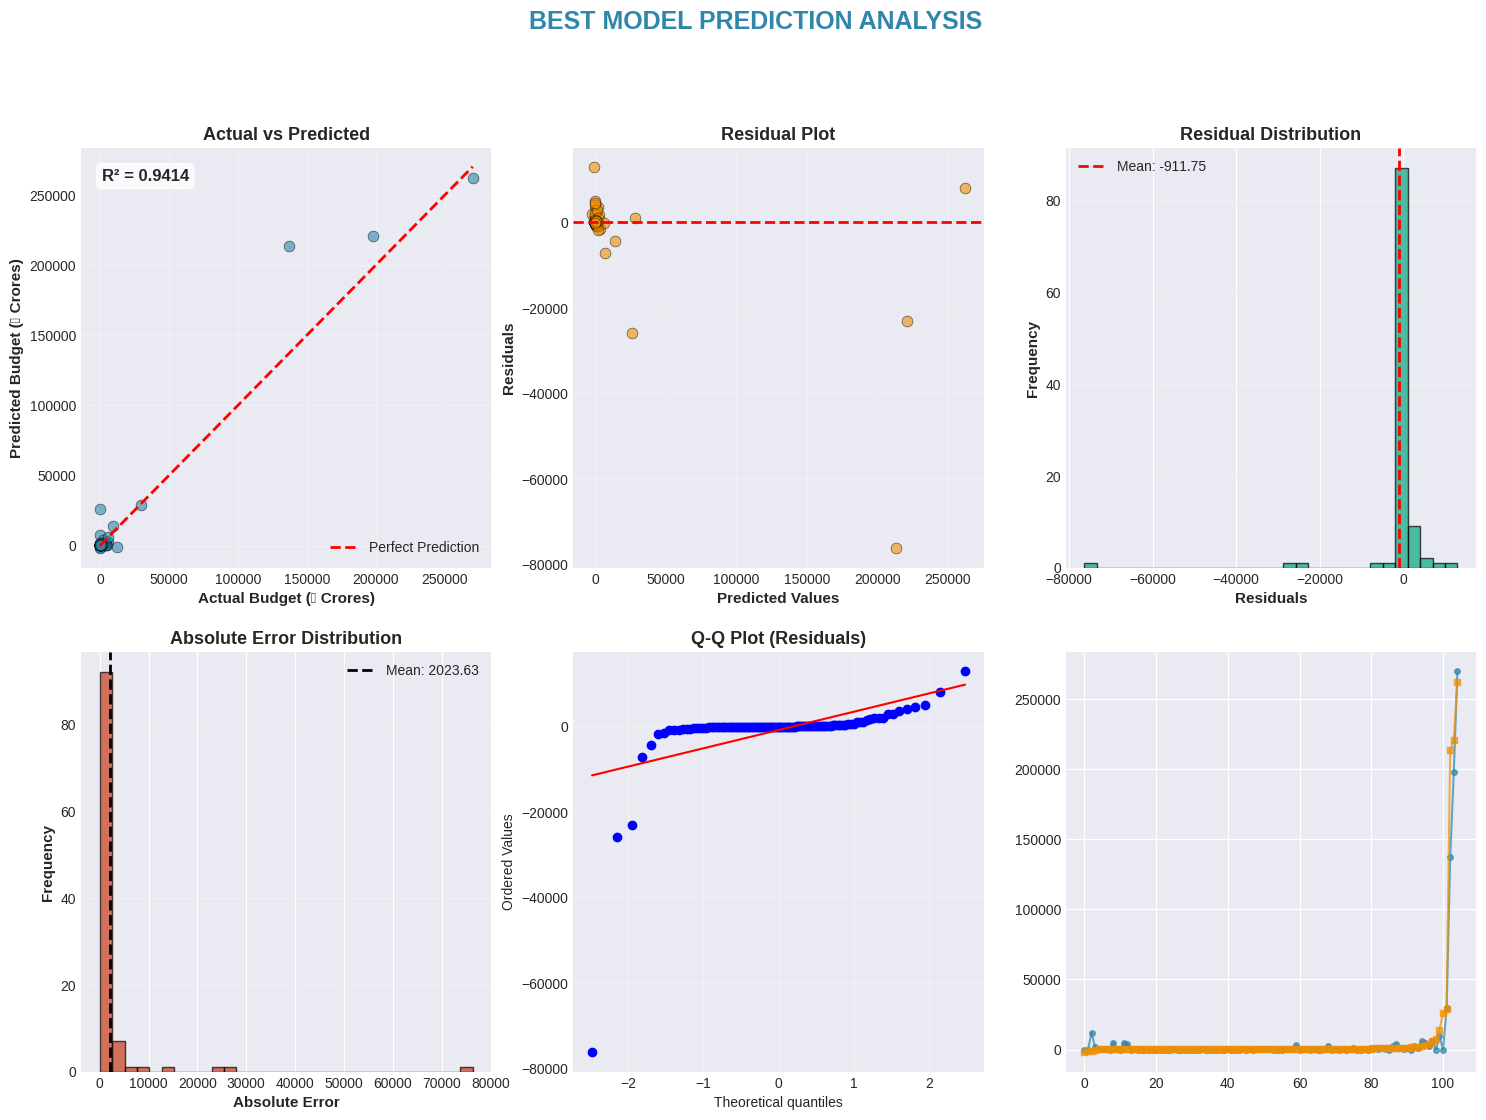

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('BEST MODEL PREDICTION ANALYSIS', fontsize=18, fontweight='bold',
             color=COLORS['primary'], y=0.995)


ax1 = axes[0, 0]
ax1.scatter(y_test, y_test_pred_tuned, alpha=0.6, c=COLORS['primary'],
           s=60, edgecolors='black', linewidth=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', linewidth=2, label='Perfect Prediction')
r2 = r2_score(y_test, y_test_pred_tuned)
ax1.text(0.05, 0.95, f'R² = {r2:.4f}', transform=ax1.transAxes,
        fontsize=12, fontweight='bold', va='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax1.set_xlabel('Actual Budget (₹ Crores)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Predicted Budget (₹ Crores)', fontsize=11, fontweight='bold')
ax1.set_title('Actual vs Predicted', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# 2.2 Residuals Plot
ax2 = axes[0, 1]
residuals = y_test - y_test_pred_tuned
ax2.scatter(y_test_pred_tuned, residuals, alpha=0.6, c=COLORS['accent'],
           s=60, edgecolors='black', linewidth=0.5)
ax2.axhline(0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted Values', fontsize=11, fontweight='bold')
ax2.set_ylabel('Residuals', fontsize=11, fontweight='bold')
ax2.set_title('Residual Plot', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)


ax3 = axes[0, 2]
ax3.hist(residuals, bins=30, color=COLORS['success'], alpha=0.7, edgecolor='black')
ax3.axvline(residuals.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {residuals.mean():.2f}')
ax3.set_xlabel('Residuals', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax3.set_title('Residual Distribution', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)


ax4 = axes[1, 0]
abs_errors = np.abs(residuals)
ax4.hist(abs_errors, bins=30, color=COLORS['danger'], alpha=0.7, edgecolor='black')
ax4.axvline(abs_errors.mean(), color='black', linestyle='--', linewidth=2,
           label=f'Mean: {abs_errors.mean():.2f}')
ax4.set_xlabel('Absolute Error', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Absolute Error Distribution', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)


from scipy import stats
ax5 = axes[1, 1]
stats.probplot(residuals, dist="norm", plot=ax5)
ax5.set_title('Q-Q Plot (Residuals)', fontsize=13, fontweight='bold')
ax5.grid(alpha=0.3)


ax6 = axes[1, 2]
sorted_idx = np.argsort(y_test_pred_tuned)
ax6.plot(y_test.values[sorted_idx], 'o-', label='Actual', color=COLORS['primary'],
        alpha=0.7, markersize=4)
ax6.plot(y_test_pred_tuned[sorted_idx], 's-', label='Predicted', color=COLORS['accent'],
        alpha=0.7, markersize=4)
ax6.fill_between(range(len(y_test)),
                y_test_pred_tuned[sorted_idx] - abs_errors[sorted_idx],
                y_test_pred_tuned[sorted_idx] + abs_errors[sorted_idx],
                alpha=0.3, color=COLORS['success'], label='Error Band')
ax6.set_xlabel('Sample Index', fontsize=11, fontweight='bold')
ax6.set_ylabel('Budget (₹ Crores)', fontsize=11, fontweight='bold')
ax6.set_title('Predictions with Error Bands', fontsize=13, fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()


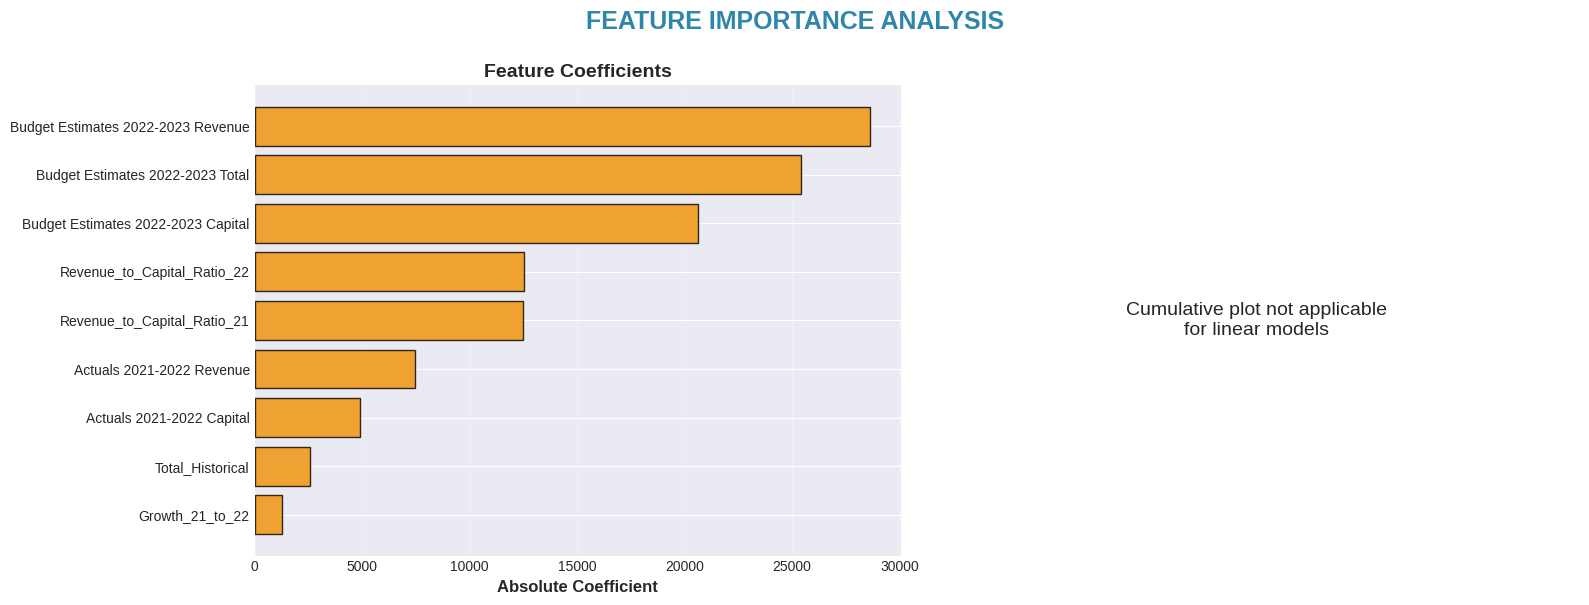

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('FEATURE IMPORTANCE ANALYSIS', fontsize=18, fontweight='bold',
             color=COLORS['primary'], y=1.0)


if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X_train.columns


    ax1 = axes[0]
    sorted_idx = np.argsort(importances)
    colors_fi = plt.cm.viridis(np.linspace(0.3, 0.9, len(importances)))

    bars = ax1.barh(range(len(importances)), importances[sorted_idx],
                   color=colors_fi, edgecolor='black', linewidth=1.5, alpha=0.8)
    ax1.set_yticks(range(len(importances)))
    ax1.set_yticklabels([feature_names[i] for i in sorted_idx], fontsize=10)
    ax1.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
    ax1.set_title('Feature Importance Ranking', fontsize=14, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)

    for i, (bar, val) in enumerate(zip(bars, importances[sorted_idx])):
        ax1.text(val, i, f' {val:.3f}', va='center', fontsize=9, fontweight='bold')


    ax2 = axes[1]
    cumulative_importance = np.cumsum(sorted(importances, reverse=True))
    ax2.plot(range(1, len(cumulative_importance)+1), cumulative_importance,
            'o-', linewidth=3, markersize=8, color=COLORS['primary'])
    ax2.axhline(0.95, color='red', linestyle='--', linewidth=2,
               label='95% Threshold')
    ax2.fill_between(range(1, len(cumulative_importance)+1), 0,
                    cumulative_importance, alpha=0.3, color=COLORS['success'])
    ax2.set_xlabel('Number of Features', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Cumulative Importance', fontsize=12, fontweight='bold')
    ax2.set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(alpha=0.3)
else:

    if hasattr(best_model, 'coef_'):
        coefs = np.abs(best_model.coef_)
        feature_names = X_train.columns

        ax1 = axes[0]
        sorted_idx = np.argsort(coefs)
        bars = ax1.barh(range(len(coefs)), coefs[sorted_idx],
                       color=COLORS['accent'], edgecolor='black', alpha=0.8)
        ax1.set_yticks(range(len(coefs)))
        ax1.set_yticklabels([feature_names[i] for i in sorted_idx], fontsize=10)
        ax1.set_xlabel('Absolute Coefficient', fontsize=12, fontweight='bold')
        ax1.set_title('Feature Coefficients', fontsize=14, fontweight='bold')
        ax1.grid(axis='x', alpha=0.3)

        axes[1].text(0.5, 0.5, 'Cumulative plot not applicable\nfor linear models',
                    ha='center', va='center', fontsize=14, transform=axes[1].transAxes)
        axes[1].axis('off')

plt.tight_layout()
plt.show()


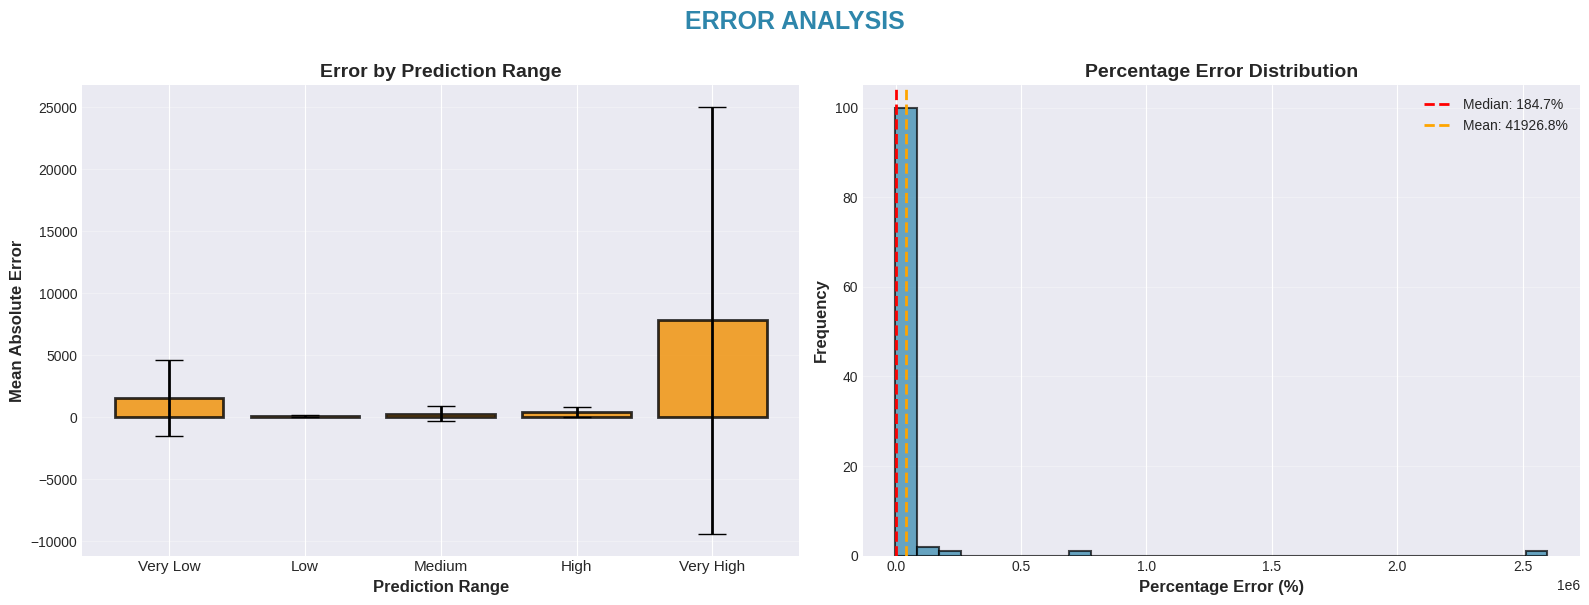

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('ERROR ANALYSIS', fontsize=18, fontweight='bold',
             color=COLORS['primary'], y=1.0)


ax1 = axes[0]
pred_ranges = pd.qcut(y_test_pred_tuned, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
error_by_range = pd.DataFrame({
    'Range': pred_ranges,
    'Abs_Error': np.abs(residuals)
})
error_summary = error_by_range.groupby('Range')['Abs_Error'].agg(['mean', 'std', 'median'])

x_pos = np.arange(len(error_summary))
bars = ax1.bar(x_pos, error_summary['mean'], yerr=error_summary['std'],
              color=COLORS['accent'], alpha=0.8, edgecolor='black',
              linewidth=2, capsize=10, error_kw={'linewidth': 2})
ax1.set_xticks(x_pos)
ax1.set_xticklabels(error_summary.index, fontsize=11)
ax1.set_ylabel('Mean Absolute Error', fontsize=12, fontweight='bold')
ax1.set_xlabel('Prediction Range', fontsize=12, fontweight='bold')
ax1.set_title('Error by Prediction Range', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# 4.2 Percentage Error Analysis
ax2 = axes[1]
percentage_errors = (np.abs(residuals) / (y_test + 1)) * 100
ax2.hist(percentage_errors, bins=30, color=COLORS['primary'], alpha=0.7,
        edgecolor='black', linewidth=1.5)
ax2.axvline(percentage_errors.median(), color='red', linestyle='--',
           linewidth=2, label=f'Median: {percentage_errors.median():.1f}%')
ax2.axvline(percentage_errors.mean(), color='orange', linestyle='--',
           linewidth=2, label=f'Mean: {percentage_errors.mean():.1f}%')
ax2.set_xlabel('Percentage Error (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Percentage Error Distribution', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


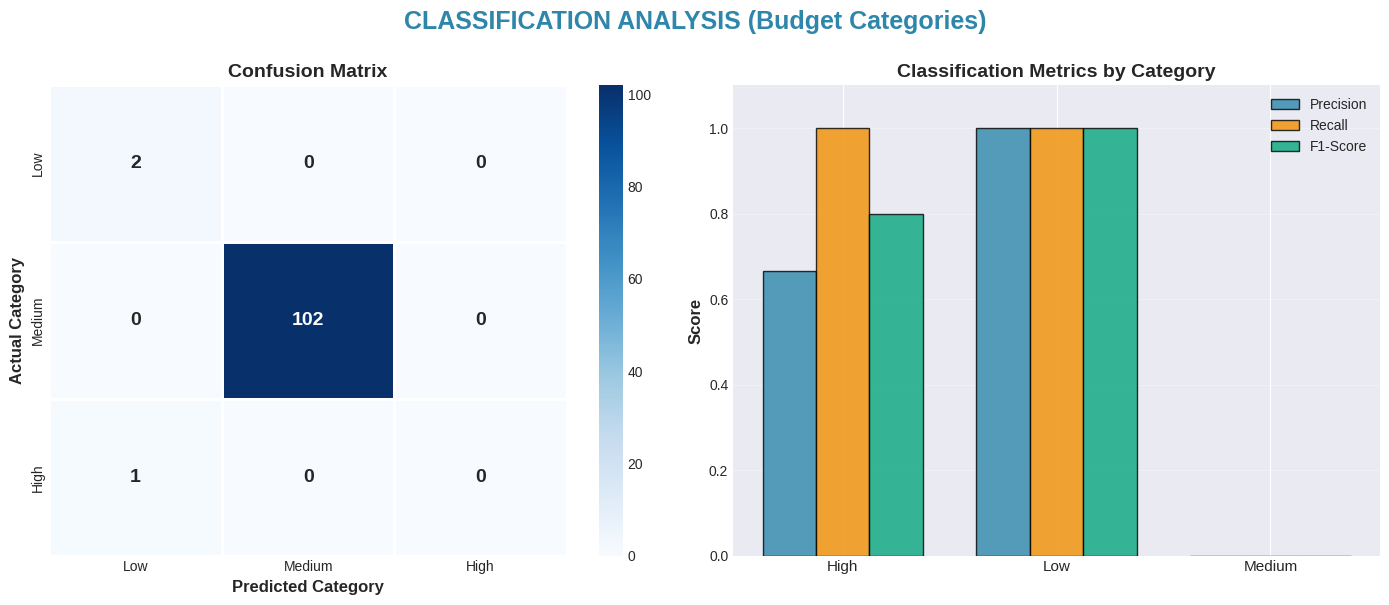

In [ ]:

y_test_categories = pd.cut(y_test, bins=3, labels=['Low', 'Medium', 'High'])
y_pred_categories = pd.cut(pd.Series(y_test_pred_tuned), bins=3, labels=['Low', 'Medium', 'High'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('CLASSIFICATION ANALYSIS (Budget Categories)', fontsize=18,
             fontweight='bold', color=COLORS['primary'], y=1.0)

# 5.1 Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_categories, y_pred_categories)

ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
           xticklabels=['Low', 'Medium', 'High'],
           yticklabels=['Low', 'Medium', 'High'],
           linewidths=2, linecolor='white', ax=ax1,
           annot_kws={'fontsize': 14, 'fontweight': 'bold'})
ax1.set_xlabel('Predicted Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Actual Category', fontsize=12, fontweight='bold')
ax1.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

# 5.2 Classification Metrics
ax2 = axes[1]
report = classification_report(y_test_categories, y_pred_categories, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:-3, :-1]

x_pos = np.arange(len(metrics_df))
width = 0.25

bars1 = ax2.bar(x_pos - width, metrics_df['precision'], width,
               label='Precision', color=COLORS['primary'], alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x_pos, metrics_df['recall'], width,
               label='Recall', color=COLORS['accent'], alpha=0.8, edgecolor='black')
bars3 = ax2.bar(x_pos + width, metrics_df['f1-score'], width,
               label='F1-Score', color=COLORS['success'], alpha=0.8, edgecolor='black')

ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics_df.index, fontsize=11)
ax2.set_ylabel('Score', fontsize=12, fontweight='bold')
ax2.set_title('Classification Metrics by Category', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

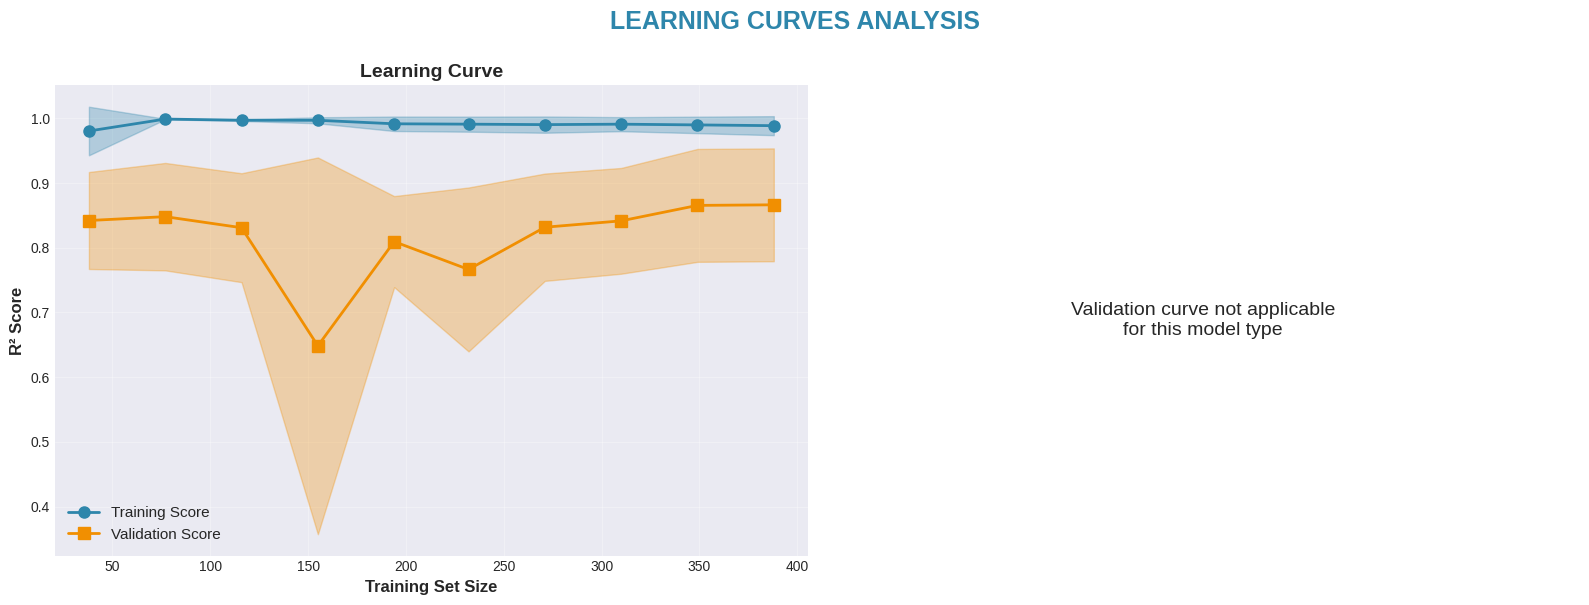


                            VISUALIZATION COMPLETE!                             


In [ ]:

from sklearn.model_selection import learning_curve

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('LEARNING CURVES ANALYSIS', fontsize=18, fontweight='bold',
             color=COLORS['primary'], y=1.0)


train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1 = axes[0]
ax1.plot(train_sizes, train_mean, 'o-', color=COLORS['primary'],
        linewidth=2, markersize=8, label='Training Score')
ax1.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                alpha=0.3, color=COLORS['primary'])
ax1.plot(train_sizes, val_mean, 's-', color=COLORS['accent'],
        linewidth=2, markersize=8, label='Validation Score')
ax1.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                alpha=0.3, color=COLORS['accent'])
ax1.set_xlabel('Training Set Size', fontsize=12, fontweight='bold')
ax1.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Learning Curve', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3)

# 6.2 Validation Curve (if applicable)
from sklearn.model_selection import validation_curve

if hasattr(best_model, 'n_estimators'):
    param_range = [50, 100, 150, 200, 250, 300]
    train_scores, val_scores = validation_curve(
        best_model, X_train_scaled, y_train,
        param_name='n_estimators', param_range=param_range,
        cv=3, scoring='r2', n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    ax2 = axes[1]
    ax2.plot(param_range, train_mean, 'o-', color=COLORS['primary'],
            linewidth=2, markersize=8, label='Training Score')
    ax2.fill_between(param_range, train_mean - train_std, train_mean + train_std,
                    alpha=0.3, color=COLORS['primary'])
    ax2.plot(param_range, val_mean, 's-', color=COLORS['accent'],
            linewidth=2, markersize=8, label='Validation Score')
    ax2.fill_between(param_range, val_mean - val_std, val_mean + val_std,
                    alpha=0.3, color=COLORS['accent'])
    ax2.set_xlabel('Number of Estimators', fontsize=12, fontweight='bold')
    ax2.set_ylabel('R² Score', fontsize=12, fontweight='bold')
    ax2.set_title('Validation Curve', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'Validation curve not applicable\nfor this model type',
                ha='center', va='center', fontsize=14, transform=axes[1].transAxes)
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("VISUALIZATION COMPLETE!".center(80))
print("="*80)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              AdaBoostRegressor, ExtraTreesRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv('/content/MRF_4B_Union_Budget (1).csv')
df.columns = df.columns.str.strip()


feature_cols = [
    'Actuals 2021-2022 Revenue',
    'Actuals 2021-2022 Capital',
    'Budget Estimates 2022-2023 Revenue',
    'Budget Estimates 2022-2023 Capital',
    'Budget Estimates 2022-2023 Total'
]
target_col = 'Budget Estimates2023-2024 Total'
df_ml = df[feature_cols + [target_col]].copy()
df_ml = df_ml.dropna()
df_ml['Revenue_to_Capital_Ratio_21'] = (df_ml['Actuals 2021-2022 Revenue'] /
                                        (df_ml['Actuals 2021-2022 Capital'] + 1))
df_ml['Revenue_to_Capital_Ratio_22'] = (df_ml['Budget Estimates 2022-2023 Revenue'] /
                                        (df_ml['Budget Estimates 2022-2023 Capital'] + 1))
df_ml['Growth_21_to_22'] = ((df_ml['Budget Estimates 2022-2023 Total'] -
                             (df_ml['Actuals 2021-2022 Revenue'] + df_ml['Actuals 2021-2022 Capital'])) /
                            (df_ml['Actuals 2021-2022 Revenue'] + df_ml['Actuals 2021-2022 Capital'] + 1))
df_ml['Total_Historical'] = (df_ml['Actuals 2021-2022 Revenue'] +
                              df_ml['Actuals 2021-2022 Capital'])

X = df_ml.drop(columns=[target_col])
y = df_ml[target_col]


X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, max_depth=5, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}


results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5,
                                scoring='r2', n_jobs=-1)

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Val RMSE': val_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Val MAE': val_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Val R²': val_r2,
        'Test R²': test_r2,
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std()
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Val R²', ascending=False)


best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]


X_train_val = np.vstack((X_train_scaled, X_val_scaled))
y_train_val = pd.concat([y_train, y_val])
best_model.fit(X_train_val, y_train_val)



y_pred_best_model = best_model.predict(X_test_scaled)


print(f"Best Model: {best_model_name}")
print("\nPredictions vs Actuals (first 10 samples):")
for i in range(10):
    print(f"  Predicted: ₹{y_pred_best_model[i]:,.2f} Crores, Actual: ₹{y_test.iloc[i]:,.2f} Crores")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.548e+09, tolerance: 2.280e+08
  model = cd_fast.enet_coordinate_descent(


Best Model: Extra Trees

Predictions vs Actuals (first 10 samples):
  Predicted: ₹271.23 Crores, Actual: ₹0.00 Crores
  Predicted: ₹423.92 Crores, Actual: ₹0.00 Crores
  Predicted: ₹220.73 Crores, Actual: ₹0.00 Crores
  Predicted: ₹232.97 Crores, Actual: ₹80.00 Crores
  Predicted: ₹1,016.75 Crores, Actual: ₹1,530.00 Crores
  Predicted: ₹508.84 Crores, Actual: ₹0.00 Crores
  Predicted: ₹344.58 Crores, Actual: ₹250.00 Crores
  Predicted: ₹565.79 Crores, Actual: ₹0.00 Crores
  Predicted: ₹245.24 Crores, Actual: ₹341.02 Crores
  Predicted: ₹220.63 Crores, Actual: ₹0.00 Crores



📊 Model Performance Comparison:
               Model  R² Score          MAE
1      Random Forest  0.741907  2421.448081
3  Linear Regression  0.705417  2586.201243
0        Extra Trees  0.668946  2680.120570
2  Gradient Boosting  0.647038  2588.822417


/tmp/ipython-input-1241020684.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=results_df, palette='viridis')


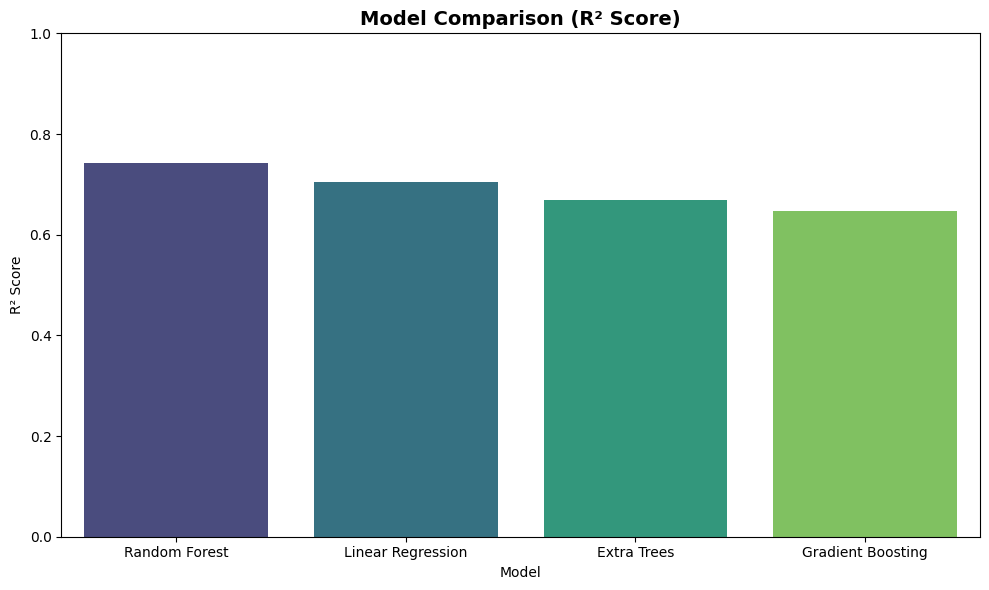

/tmp/ipython-input-1241020684.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, palette='magma')


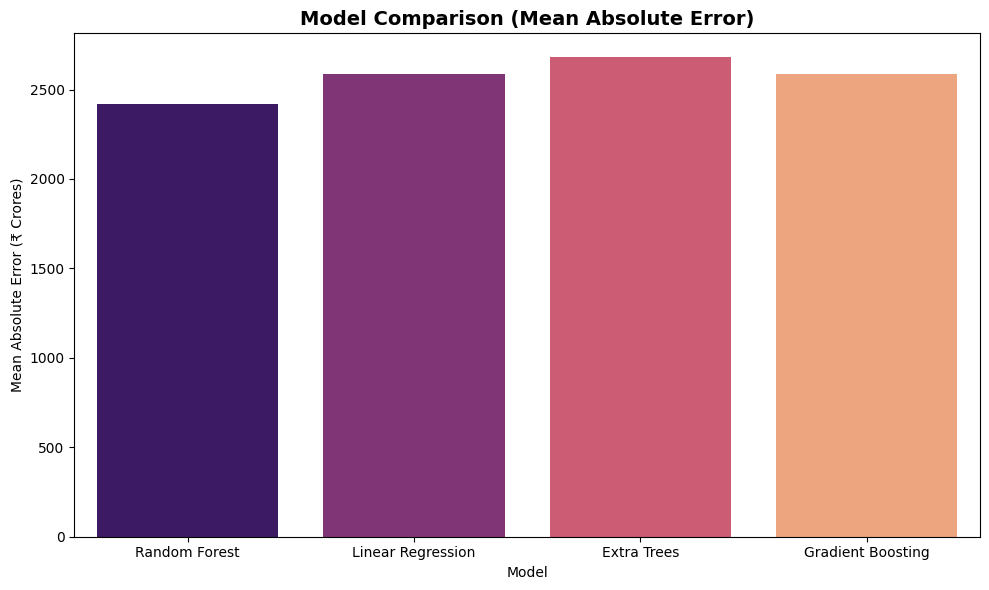

/tmp/ipython-input-1241020684.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')


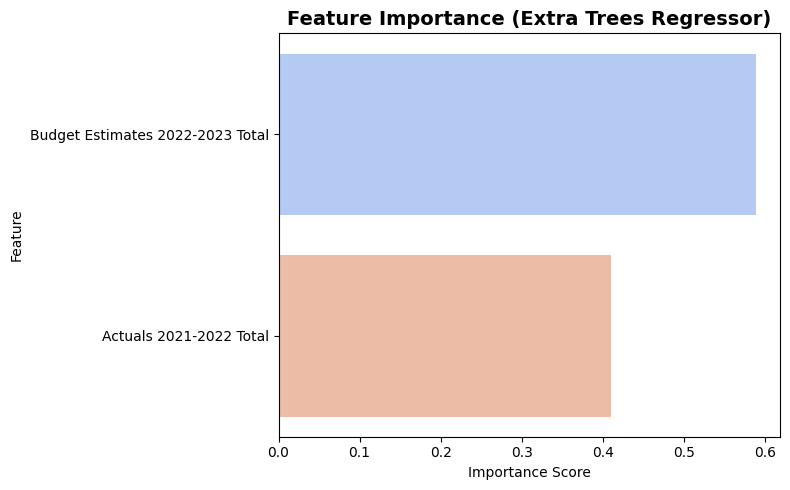


🏆 Best Performing Model: Random Forest


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


df = pd.read_csv("MRF_4B_Union_Budget (1).csv")
df.columns = df.columns.str.strip()


cols = [
    'Actuals 2021-2022 Total',
    'Budget Estimates 2022-2023 Total',
    'Budget Estimates2023-2024 Total'
]

df = df[cols].dropna()

for col in cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)


X = df[['Actuals 2021-2022 Total', 'Budget Estimates 2022-2023 Total']]
y = df['Budget Estimates2023-2024 Total']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


models = {
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, random_state=42),
    "Linear Regression": LinearRegression()
}

results = []


for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    results.append({
        'Model': name,
        'R² Score': r2,
        'MAE': mae
    })


results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print("\n📊 Model Performance Comparison:")
print(results_df)


plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R² Score', data=results_df, palette='viridis')
plt.title('Model Comparison (R² Score)', fontsize=14, fontweight='bold')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=results_df, palette='magma')
plt.title('Model Comparison (Mean Absolute Error)', fontsize=14, fontweight='bold')
plt.ylabel('Mean Absolute Error (₹ Crores)')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


et_model = ExtraTreesRegressor(n_estimators=300, random_state=42)
et_model.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': et_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Feature Importance (Extra Trees Regressor)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


best_model = results_df.iloc[0]['Model']
print(f"\n🏆 Best Performing Model: {best_model}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Regression Model Comparison (Random Forest vs Others):
            Model  Accuracy (%)  R² Score     MAE    RMSE
    Random Forest         74.19    0.7419 2421.45 8281.53
Linear Regression         70.54    0.7054 2586.20 8847.63
      Extra Trees         66.89    0.6689 2680.12 9379.34
Gradient Boosting         64.70    0.6470 2588.82 9684.72


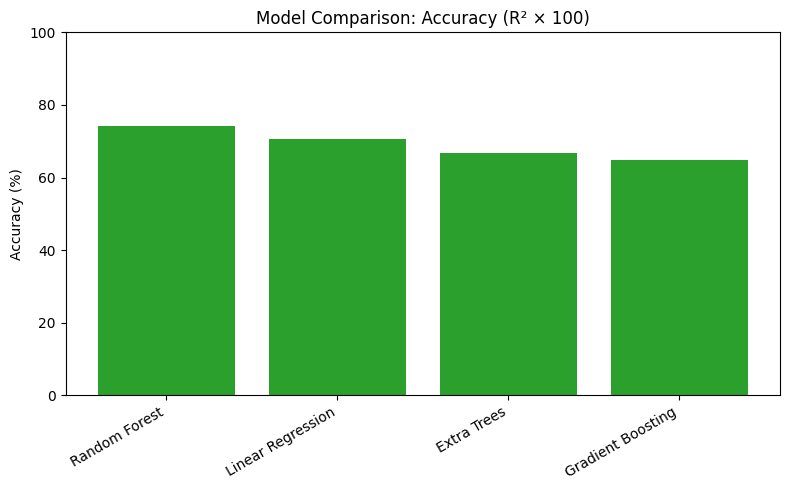

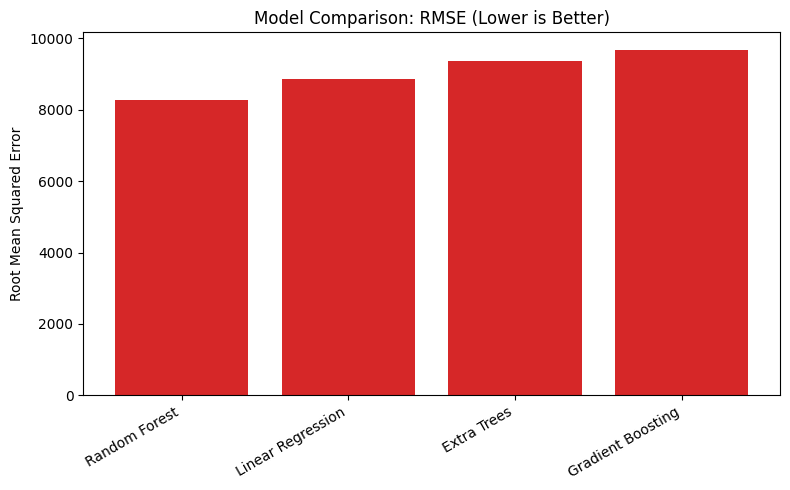


Best Model: Random Forest (74.19% accuracy, R² = 0.7419)


In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


compare_models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, random_state=42),
    "Linear Regression": LinearRegression()
}


comparison_results = []

X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

for name, model in compare_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test_np)

    r2 = r2_score(y_test_np, preds)
    mae = mean_absolute_error(y_test_np, preds)
    rmse = np.sqrt(mean_squared_error(y_test_np, preds))


    accuracy = max(0.0, r2) * 100

    comparison_results.append({
        "Model": name,
        "Accuracy (%)": round(accuracy, 2),
        "R² Score": round(r2, 4),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    })

comparison_df = pd.DataFrame(comparison_results).sort_values(by="Accuracy (%)", ascending=False).reset_index(drop=True)


print("Regression Model Comparison (Random Forest vs Others):")
print(comparison_df.to_string(index=False))


plt.figure(figsize=(8, 5))
plt.bar(comparison_df["Model"], comparison_df["Accuracy (%)"], color="tab:green")
plt.title("Model Comparison: Accuracy (R² × 100)")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
plt.bar(comparison_df["Model"], comparison_df["RMSE"], color="tab:red")
plt.title("Model Comparison: RMSE (Lower is Better)")
plt.ylabel("Root Mean Squared Error")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


best_model = comparison_df.iloc[0]
print(f"\nBest Model: {best_model['Model']} ({best_model['Accuracy (%)']}% accuracy, R² = {best_model['R² Score']})")
